In [24]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lab 3 : Working with Neural Networks

---


Total Points: **100 points**


Submission Deadline :  **12th-Apr-2024 (10:00 AM)**


---



General Instructions:
---

1. **Code Readability** is very important.
* Modularize your code by making use
of classes and functions that can be flexibly reused wherever necessary.
* Use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
2. Students are expected to follow the **honor code** of the class.

Note: **For any enquiry please write to surbhi.19csz0011@iitrpr.ac.in or akanksha.22csz0001@iitrpr.ac.in**


In this lab, we will perform **clustering** and **classification** tasks.
We will consider “Ecommerce.csv” for the clustering problem, “Facial_Emotion_Recognition.zip” for CNN based multi-class classification, and “winequality.csv” for MLP formulation. All these datasets are available at following link:
https://drive.google.com/drive/folders/1dnTzyeKZrErhJVuGkUVwEaTCoR-Yf2iW?usp=drive_link




---



Section 1: MLP  **(Total points = 45)**

---


*   **Task Overview:**
Given a dataset containing 1600 entries offering information about physical and chemical properties of red wine variants.The target variable is the wine quality rating. Use this dataset to predict wine quality based on measurable factors, potentially aiding in the wine making process.

*   **Dataset Split:**
X_train, X_test, Y_train, Y_test = train_test_split(Data, Labels, test_size=0.20, random_state=42)

Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the Wine Quality (Dataset is provided as a CSV file).

**Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section.**

1. Perform an exploratory analysis on the given dataset. Print the avg, max & min values of each column. Perform data pre-processing operations like standardization and splitting (80:20) of data. **(4 points)**

2. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh activations at each layer of MLP for the user. **(13 points)**

3. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(13 points)**

4. Train your model using the “cross-entropy” loss. Mention your choices of the hyperparameters for training. Perform training with batch gradient descent and stochastic gradient descent. Plot the graph of training error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the training methods. **(2+3 = 5)**

5. Using the best training method from the above training, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001]. **(5 points)**
6. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus learning rate. Comment on your observations. **(3+2 = 5 points)**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [ ]:
file_path = '/content/drive/My Drive/ML_Lab3_Dataset/winequality.csv'
df = pd.read_csv(file_path)


Task 1.1: Exploratory Analysis

In [ ]:
# Printing minimum, maximum and average of each column.
exploratory_stats = df.agg(['min', 'max', 'mean'])
exploratory_stats = exploratory_stats.T
print(exploratory_stats)

                          min        max       mean
fixed acidity         4.60000   15.90000   8.319637
volatile acidity      0.12000    1.58000   0.527821
citric acid           0.00000    1.00000   0.270976
residual sugar        0.90000   15.50000   2.538806
chlorides             0.01200    0.61100   0.087467
free sulfur dioxide   1.00000   72.00000  15.874922
total sulfur dioxide  6.00000  289.00000  46.467792
density               0.99007    1.00369   0.996747
pH                    2.74000    4.01000   3.311113
sulphates             0.33000    2.00000   0.658149
alcohol               8.40000   14.90000  10.422983
quality               3.00000    8.00000   5.636023


In [ ]:
# Function to standardize dataframe.
def standardized_dataframe(df):
   return (df - df.mean()) / (df.std())

In [ ]:
# Function to split training and testing data.
def split_data(X, Y, test_size=0.2, random_state=42):
    num_samples = X.shape[0]
    shuffled_indices = np.random.permutation(num_samples)
    num_test_samples = int(test_size * num_samples)
    test_indices = shuffled_indices[:num_test_samples]
    train_indices = shuffled_indices[num_test_samples:]
    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]
    return X_train, X_test, Y_train, Y_test

Task 1.2: Feed Forward Pass

In [ ]:
# Sigmoid
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

# Tanh
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [ ]:
# Activation of perceptron.
def activation(z, activation_type):
    return tanh(z) if activation_type == 'tanh' else sigmoid(z)

In [ ]:
# Softmax function.
def softmax(x):
    max_x = np.max(x, axis=1, keepdims=True)
    exp_x = np.exp(x - max_x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [ ]:
# Forward Pass.
def forward(X, W1, W2, b1, b2, activation_at_hidden):
    z1 = np.dot(X, W1) + b1
    a1 = activation(z1, activation_at_hidden)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return z1, z2, a1, a2

Task 1.3: Back Propogation

In [ ]:
# Loss function.
def cross_entropy(y_true, y_pred):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

In [ ]:
# Derivative of activation function.
def d_activation(z, activation_type):
    return (1 - np.power(activation(z, activation_type), 2)) if activation_type == 'tanh' else activation(z, activation_type) * (1 - activation(z, activation_type))


In [ ]:
# Backward Propogation.
def backward(X, y, W1, W2, b1, b2, y_pred, a1, z1, activation_at_hidden):
  loss = cross_entropy(y, y_pred)
  d_loss_dz2 = y_pred - y
  d_loss_dW2 = np.dot(a1.T, d_loss_dz2)
  d_loss_db2 = np.sum(d_loss_dz2, axis=0)
  d_loss_da1 = np.dot(d_loss_dz2, W2.T)
  d_loss_dz1 = d_loss_da1 * d_activation(z1, activation_at_hidden)
  d_loss_dW1 = np.dot(X.T, d_loss_dz1)
  d_loss_db1 = np.sum(d_loss_dz1, axis=0)
  return d_loss_dW1, d_loss_dW2, d_loss_db1, d_loss_db2

Task 1.4: Training MLP

In [ ]:
# Updating parameters.
def update_parameters(W1, W2, b1, b2, d_loss_dW1, d_loss_dW2, d_loss_db1, d_loss_db2, learning_rate):
    W1 -= learning_rate * d_loss_dW1
    b1 -= learning_rate * d_loss_db1
    W2 -= learning_rate * d_loss_dW2
    b2 -= learning_rate * d_loss_db2
    return W1, W2, b1, b2

In [ ]:
# Predicting probability of each class.
def predict(X_test, y_test, W1, W2, b1, b2, activation_at_hidden):
  z1, z2, a1, a2 = forward(X, W1, W2, b1, b2)
  return cross_entropy(y_test, a2)

In [ ]:
# Accuracy calculation.
def find_accuracy(y, y_pred):
    accuracy = len(y)
    for i in range(len(y)):
        if  np.argmax(y[i]) != np.argmax(y_pred[i]):
            accuracy -= 1
    return accuracy/len(y)

In [ ]:
# Training MLP.
def train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size=32):
    np.random.seed(1065)
    input_size = X_train.shape[1]
    W1 = np.random.randn(input_size, hidden_units)
    b1 = np.random.randn(1, hidden_units)
    W2 = np.random.randn(hidden_units, num_classes)
    b2 = np.random.randn(1, num_classes)

    training_losses = []
    testing_losses = []
    epochs = []

    if batch_size > len(X_train):
        batch_size = len(X_train)

    num_batches = len(X_train) // batch_size

    for epoch in range(num_epochs):
        for batch_idx in range(num_batches):
            start_idx = batch_idx * batch_size
            end_idx = (batch_idx + 1) * batch_size
            X_batch = X_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]

            z1, z2, a1, a2 = forward(X_batch, W1, W2, b1, b2, activation_at_hidden)
            training_loss = cross_entropy(y_batch, a2)

            d_loss_dW1, d_loss_dW2, d_loss_db1, d_loss_db2 = backward(X_batch, y_batch, W1, W2, b1, b2, a2, a1, z1, activation_at_hidden)
            W1, W2, b1, b2 = update_parameters(W1, W2, b1, b2, d_loss_dW1, d_loss_dW2, d_loss_db1, d_loss_db2, learning_rate)

        if epoch % 100 == 0:
            z1, z2, a1, a2 = forward(X_train, W1, W2, b1, b2, activation_at_hidden)
            training_loss = cross_entropy(y_train, a2)
            z1, z2, a1, a2 = forward(X_test, W1, W2, b1, b2, activation_at_hidden)
            testing_loss = cross_entropy(y_test, a2)
            testing_losses.append(testing_loss)
            training_losses.append(training_loss)
            epochs.append(epoch)

    return W1, W2, b1, b2, training_losses, testing_losses, epochs

In [ ]:
# Performing one hot encoding on target.
def one_hot_encode(y):
    encoded_data = np.zeros((len(y), 6))
    for idx in range(len(y)):
        encoded_data[idx][y[idx]-3] = 1
    return encoded_data

In [ ]:
# Standardizing and splitting dataset.
X = df.drop(columns=['quality']).values
y = one_hot_encode(df['quality'].values)
X = standardized_dataframe(X)
X_train, X_test, y_train, y_test = split_data(X, y)

In [ ]:
# Plotting training and testing loss with epochs.
def plot_training_and_testing_loss_with_epochs(epochs, training_losses, testing_losses, batch_size):
   plt.plot(epochs, training_losses, color='red', label = 'Training Loss')
   plt.plot(epochs, testing_losses, color='yellow', label ='Testing Loss')
   plt.xlabel('Epochs')
   plt.ylabel('Loss')
   plt.title(f'Loss vs Epochs (Batch size = {batch_size})')
   plt.grid(True)
   plt.ylim(0.6, 1.6)
   plt.legend()
   plt.show()

Hyperparameters:

In [ ]:
'''
    Hyperparameters:

    hidden_units = 15
    num_classes = 6
    num_epochs = 10000
    learning_rate = 0.001
    batch_sizes = [1, 2048]
'''

hidden_units = 15
num_classes = 6
num_epochs = 10000
learning_rate = 0.001
batch_sizes = [1, 8, 64, 512, 1280]

In [ ]:
# ---------------------------------- Tanh: Loss vs Epochs: Stochastic and batch gradient descent. ---------------------------

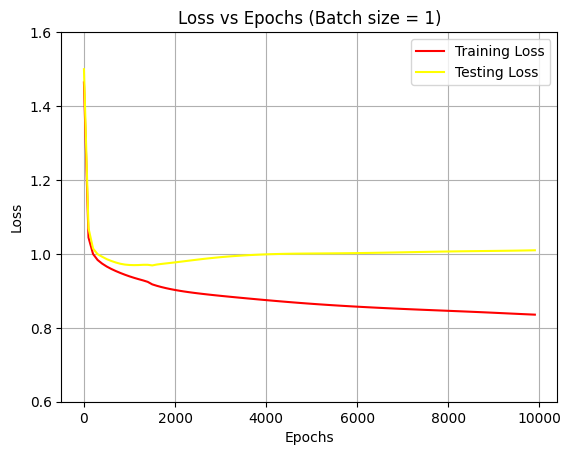

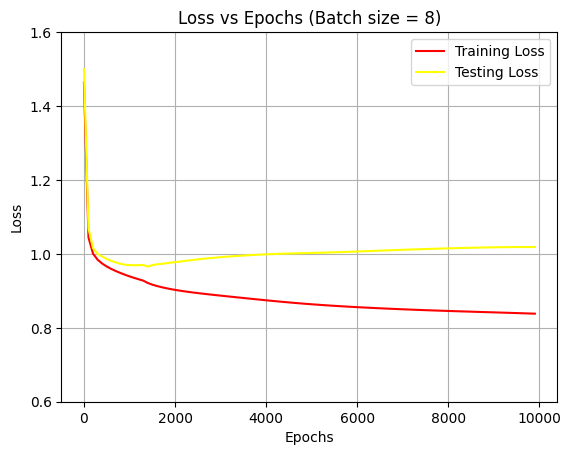

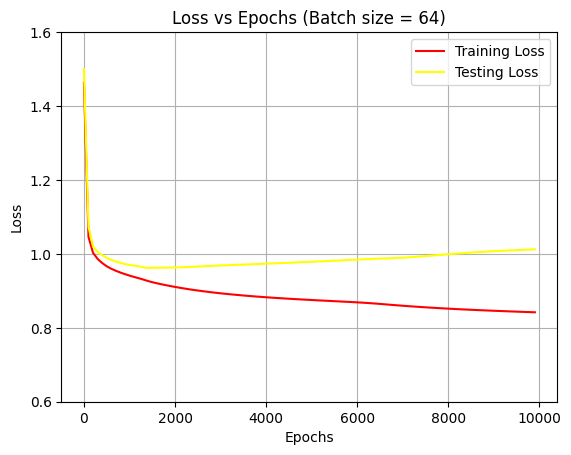

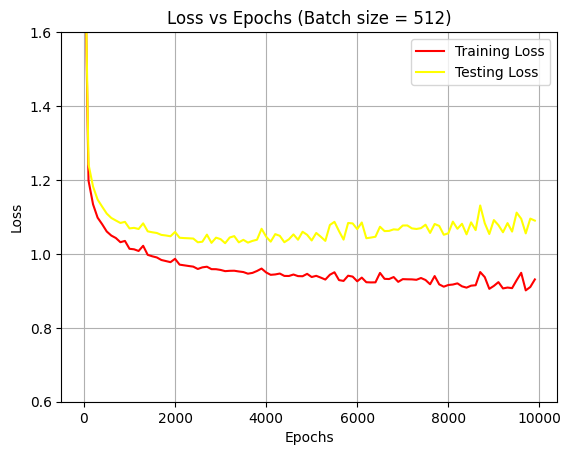

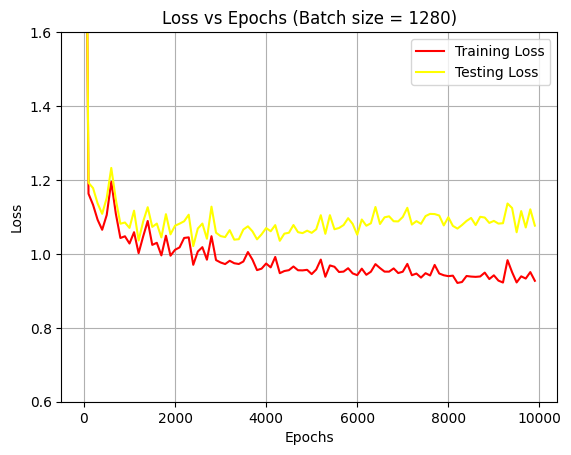

In [ ]:
# Training MLP, tanh as activation function
activation_at_hidden = 'tanh'
for batch_size in batch_sizes:
    W1, W2, b1, b2, training_losses, testing_losses, epochs = train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    plot_training_and_testing_loss_with_epochs(epochs, training_losses, testing_losses, batch_size)

In [ ]:
# ---------------------------------- Sigmoid: Loss vs Epochs: Stochastic and batch gradient descent. ---------------------------

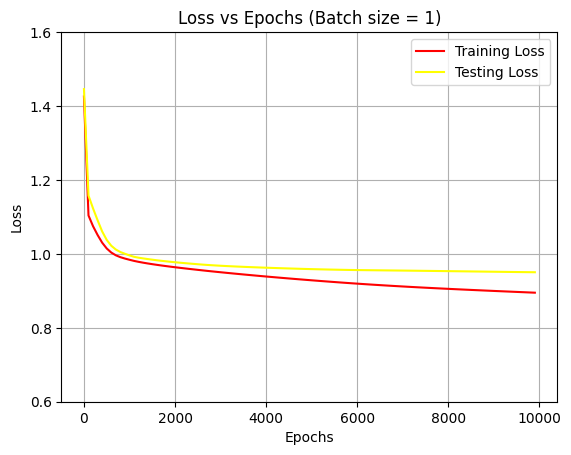

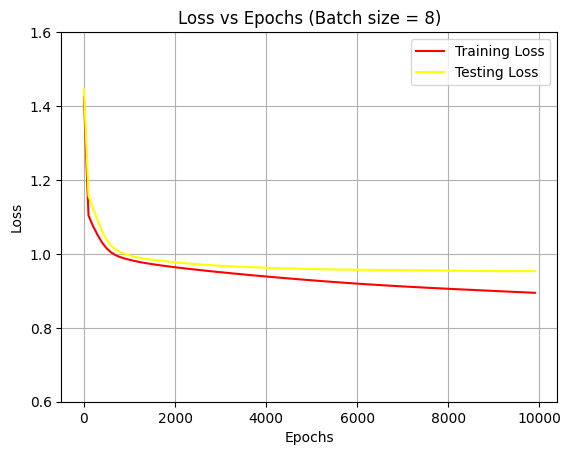

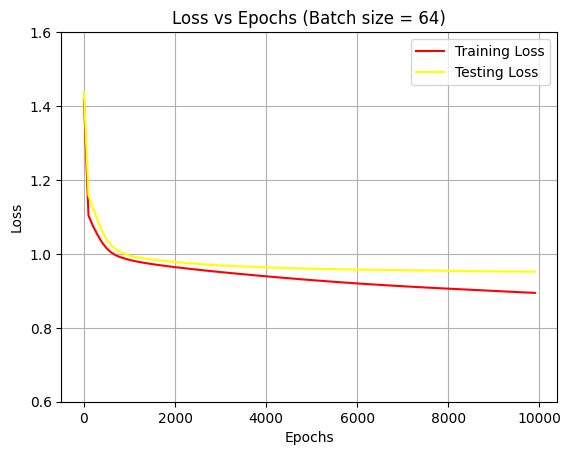

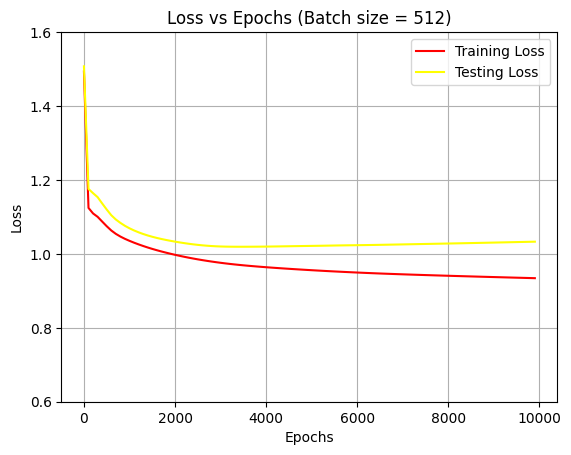

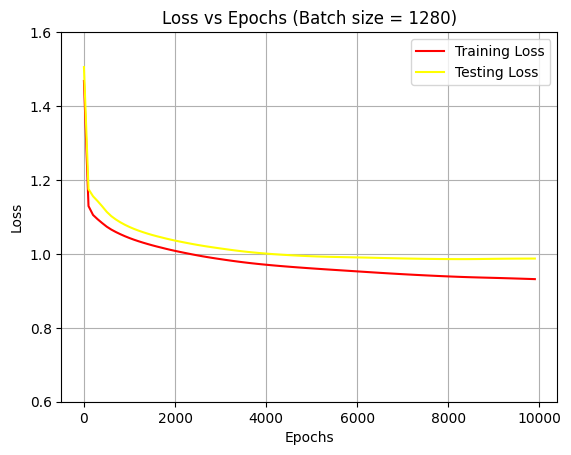

In [ ]:
# Training MLP, sigmoid as activation function
activation_at_hidden = 'sigmoid'
for batch_size in batch_sizes:
    W1, W2, b1, b2, training_losses, testing_losses, epochs = train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    plot_training_and_testing_loss_with_epochs(epochs, training_losses, testing_losses, batch_size)

In [ ]:
# ---------------------------------- Tanh: Training Error vs Epochs: Stochastic and batch gradient descent. ---------------------------

In [ ]:
# Plot training and testing error with epochs.
def plot_training_and_testing_error_with_epochs(epochs, training_losses, testing_losses, batch_size):
   plt.plot(epochs, training_losses, color='red', label = 'Training Error')
   plt.plot(epochs, testing_losses, color='yellow', label ='Testing Error')
   plt.xlabel('Epochs')
   plt.ylabel('Error')
   plt.title(f'Error vs Epochs (Batch size = {batch_size})')
   plt.grid(True)
   plt.ylim(0, 1.0)
   plt.legend()
   plt.show()

In [ ]:
# function to get MLP training and testing error.
def MLP_training_and_testing_error(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size=32):
    np.random.seed(1065)
    input_size = X_train.shape[1]
    W1 = np.random.randn(input_size, hidden_units)
    b1 = np.random.randn(1, hidden_units)
    W2 = np.random.randn(hidden_units, num_classes)
    b2 = np.random.randn(1, num_classes)

    training_errors = []
    testing_errors = []
    epochs = []

    if batch_size > len(X_train):
        batch_size = len(X_train)

    num_batches = len(X_train) // batch_size

    for epoch in range(num_epochs):
        for batch_idx in range(num_batches):
            start_idx = batch_idx * batch_size
            end_idx = (batch_idx + 1) * batch_size
            X_batch = X_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]

            z1, z2, a1, a2 = forward(X_batch, W1, W2, b1, b2, activation_at_hidden)
            training_loss = cross_entropy(y_batch, a2)

            d_loss_dW1, d_loss_dW2, d_loss_db1, d_loss_db2 = backward(X_batch, y_batch, W1, W2, b1, b2, a2, a1, z1, activation_at_hidden)
            W1, W2, b1, b2 = update_parameters(W1, W2, b1, b2, d_loss_dW1, d_loss_dW2, d_loss_db1, d_loss_db2, learning_rate)

        if epoch % 100 == 0:
            z1, z2, a1, a2 = forward(X_train, W1, W2, b1, b2, activation_at_hidden)
            training_error = 1 - find_accuracy(y_train, a2)
            z1, z2, a1, a2 = forward(X_test, W1, W2, b1, b2, activation_at_hidden)
            testing_error = 1 - find_accuracy(y_test, a2)
            training_errors.append(testing_error)
            testing_errors.append(training_error)
            epochs.append(epoch)

    return W1, W2, b1, b2, training_errors, testing_errors, epochs

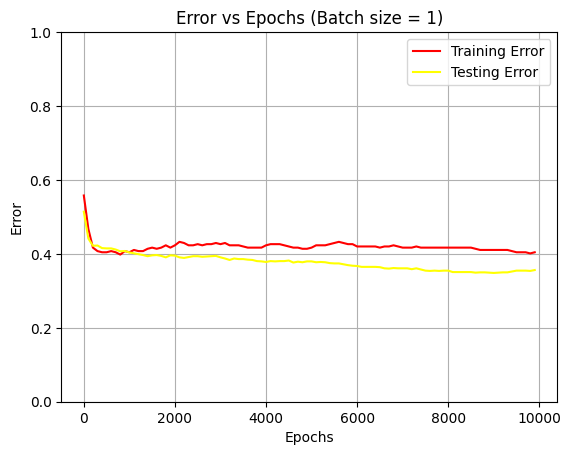

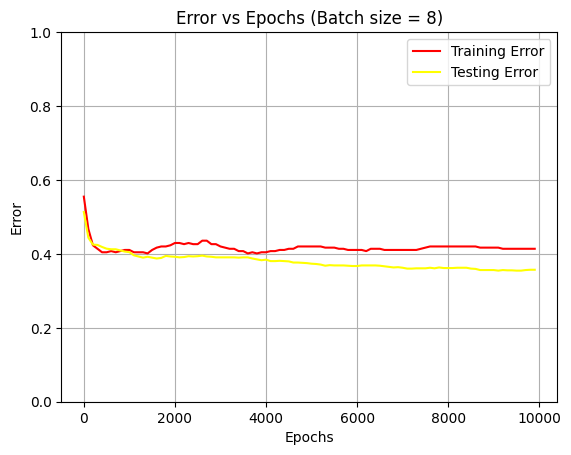

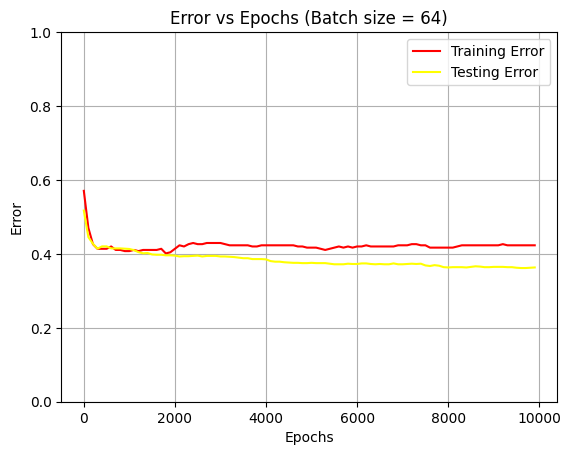

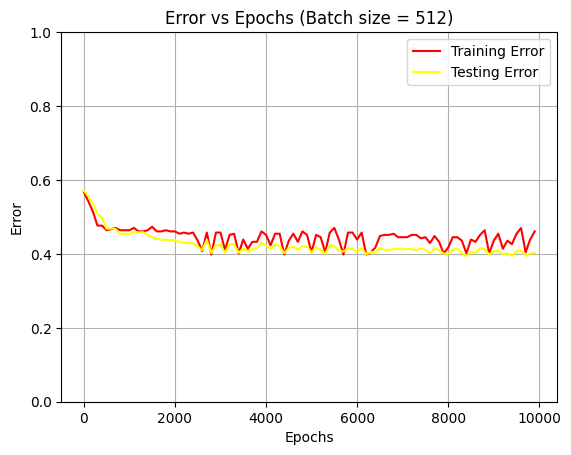

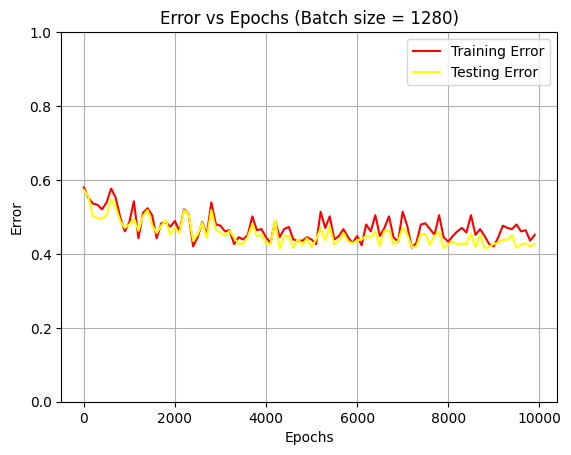

In [ ]:
# Training MLP, tanh as activation function
activation_at_hidden = 'tanh'
for batch_size in batch_sizes:
    W1, W2, b1, b2, training_errors, testing_errors, epochs = MLP_training_and_testing_error(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    plot_training_and_testing_error_with_epochs(epochs, training_errors, testing_errors, batch_size)

In [ ]:
# -------------------------------- Sigmid: Traning Error vs Epochs: Stochastic and batch gradient descent. ---------------------------

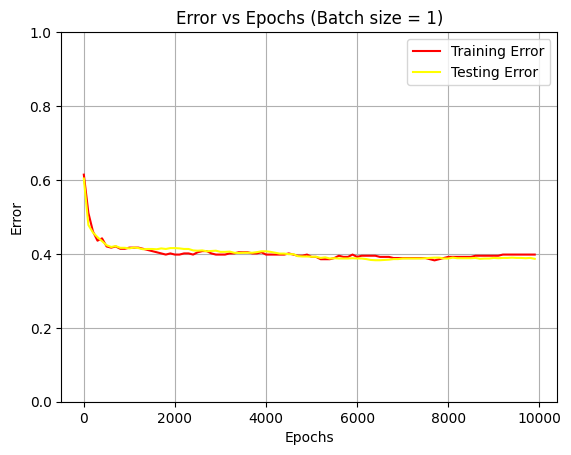

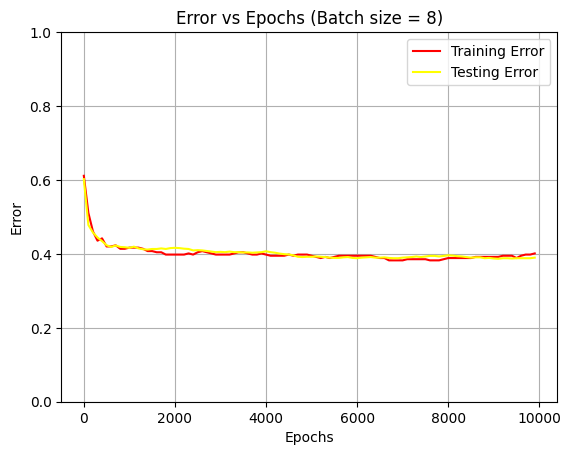

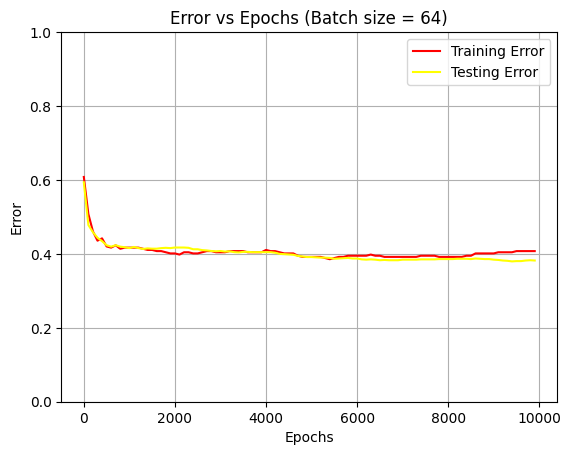

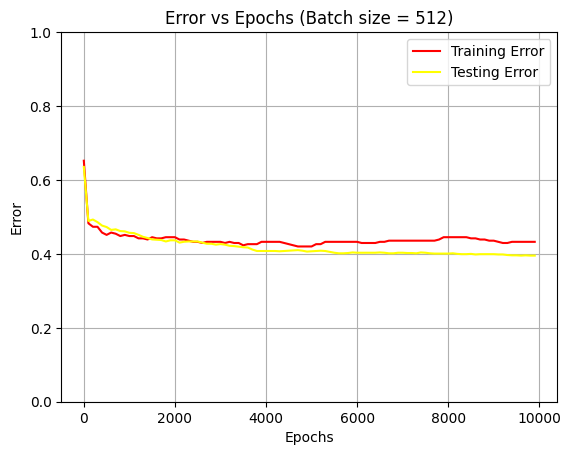

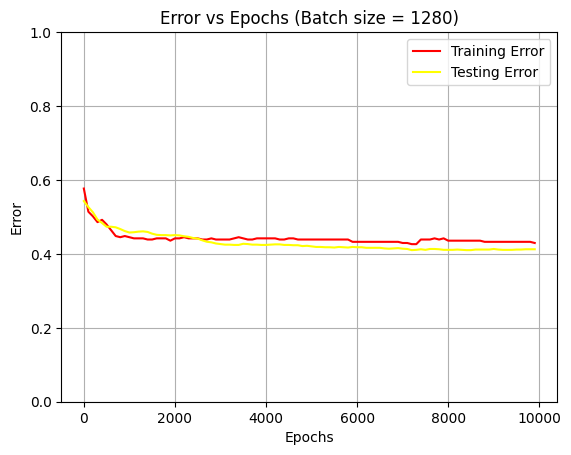

In [ ]:
# Training MLP, sigmoid as activation function
activation_at_hidden = 'sigmoid'
for batch_size in batch_sizes:
    W1, W2, b1, b2, training_errors, testing_errors, epochs = MLP_training_and_testing_error(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    plot_training_and_testing_error_with_epochs(epochs, training_errors, testing_errors, batch_size)

In [ ]:
# --------------------------------------------- Tanh : Accuracy Calculation -----------------------------------------

In [ ]:
# Plot accuracy with different batch size
def plot_accuracy_with_different_batch_sizes(batch_sizes, accuracy, accuracy_type, learning_rate, epochs):
    plt.bar(batch_sizes, accuracy, color='blue', width = 0.4)
    plt.xlabel('Batch Size')
    plt.ylabel('Accuracy')
    plt.ylim(0, 0.8)
    plt.title(f'{accuracy_type} accuracy with batch sizes (β = {learning_rate}, epochs = {epochs})')
    plt.show()

In [ ]:
hidden_units = 15
num_classes = 6
learning_rate = 0.001
batch_sizes = [1, 8, 64, 512, 1280]

In [ ]:
num_epochs = 10000
training_accuracies = []
testing_accuracies = []
activation_at_hidden = 'tanh'

for batch_size in batch_sizes:
    W1, W2, b1, b2, training_losses, testing_losses, epochs = train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    z1, z2, a1, a2 = forward(X_train, W1, W2, b1, b2, activation_at_hidden)
    training_accuracies.append(find_accuracy(y_train, a2))
    z1, z2, a1, a2 = forward(X_test, W1, W2, b1, b2, activation_at_hidden)
    testing_accuracies.append(find_accuracy(y_test, a2))

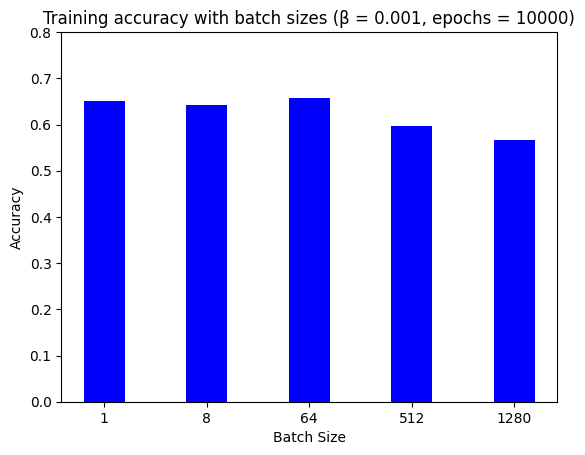

In [ ]:
batch_sizes = ['1', '8', '64', '512', '1280']
plot_accuracy_with_different_batch_sizes(batch_sizes, training_accuracies, 'Training', learning_rate, num_epochs)

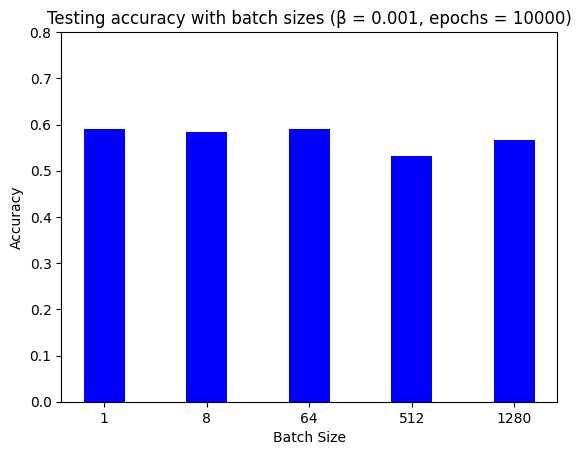

In [ ]:
batch_sizes = ['1', '8', '64', '512', '1280']
plot_accuracy_with_different_batch_sizes(batch_sizes, testing_accuracies, 'Testing', learning_rate, num_epochs)

In [ ]:
# --------------------------------------------- Sigmoid : Accuracy Calculation -----------------------------------------

In [ ]:
num_epochs = 5000
training_accuracies = []
testing_accuracies = []
batch_sizes = [1, 8, 64, 512, 1280]

activation_at_hidden = 'Sigmoid'

for batch_size in batch_sizes:
    W1, W2, b1, b2, training_losses, testing_losses, epochs = train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    z1, z2, a1, a2 = forward(X_train, W1, W2, b1, b2, activation_at_hidden)
    training_accuracies.append(find_accuracy(y_train, a2))
    z1, z2, a1, a2 = forward(X_test, W1, W2, b1, b2, activation_at_hidden)
    testing_accuracies.append(find_accuracy(y_test, a2))

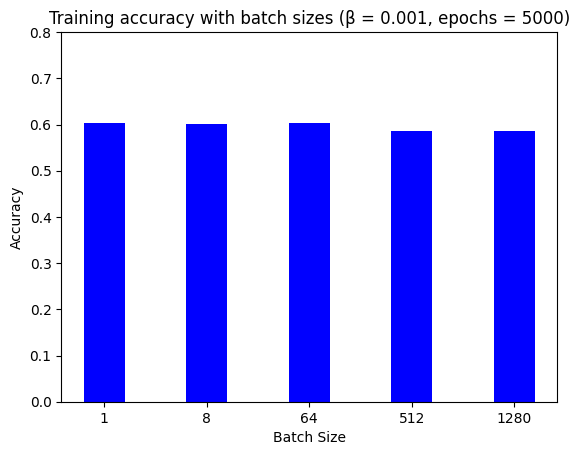

In [ ]:
batch_sizes = ['1', '8', '64', '512', '1280']
plot_accuracy_with_different_batch_sizes(batch_sizes, training_accuracies, 'Training', learning_rate, num_epochs)

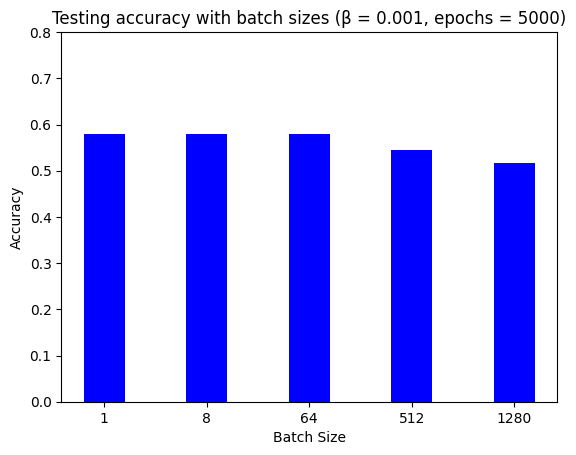

In [ ]:
batch_sizes = ['1', '8', '64', '512', '1280']
plot_accuracy_with_different_batch_sizes(batch_sizes, testing_accuracies, 'Testing', learning_rate, num_epochs)

Task 1.5 and 1.6: Training MLP with different learning rate

In [ ]:
# Plot loss with learning rate
def plot_loss_with_learning_rate(losses, epochs, batch_size, learning_rates, accuracy_type):
   colors = ['purple', 'black', 'yellow', 'green', 'red']
   for idx in range(len(losses)):
      plt.plot(epochs, losses[idx], color = colors[idx], label = f'β = {learning_rates[idx]}')
   plt.xlabel('Epochs')
   plt.ylabel('Loss')
   plt.title(f'{accuracy_type} Loss vs Epochs (Activation = tanh, Batch size = {batch_size})')
   plt.grid(True)
   plt.legend()
   plt.show()

In [ ]:
hidden_units = 15
num_classes = 6
num_epochs = 10000
batch_size = 1
activation_at_hidden = 'tanh'

In [ ]:
# Training and testing loss vs epochs.
epochs = []
training_losses = []
testing_losses = []
learning_rates = [0.5, 0.1, 0.01, 0.001, 0.00001]


for learning_rate in learning_rates:
    W1, W2, b1, b2, training_loss, testing_loss, epochs_ = train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    epochs = epochs_
    training_losses.append(training_loss)
    testing_losses.append(testing_loss)

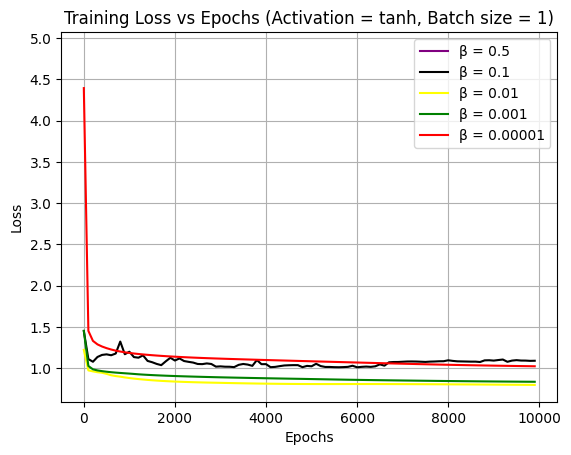

In [ ]:
learning_rates = ['0.5', '0.1', '0.01', '0.001', '0.00001']
plot_loss_with_learning_rate(training_losses, epochs, batch_size, learning_rates, 'Training')

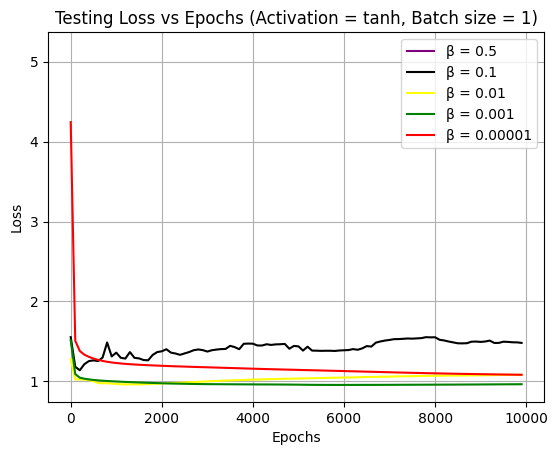

In [ ]:
learning_rates = ['0.5', '0.1', '0.01', '0.001', '0.00001']
plot_loss_with_learning_rate(testing_losses, epochs, batch_size, learning_rates, 'Testing')

In [ ]:
# Plot error with different learning rate
def plot_error_with_different_learning_rates(learning_rates, errors, accuracy_type, n_epochs):
    colors = ['purple', 'black', 'yellow', 'green', 'red']
    for idx in range(len(errors)):
        plt.plot(epochs, errors[idx], color = colors[idx], label = f'β = {learning_rates[idx]}')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'{accuracy_type} Error vs Epochs (Activation = tanh, Batch size = {batch_size})')
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
# Function to get training and testing error.
def MLP_training_and_testing_error(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size=32):
    np.random.seed(1065)
    input_size = X_train.shape[1]
    W1 = np.random.randn(input_size, hidden_units)
    b1 = np.random.randn(1, hidden_units)
    W2 = np.random.randn(hidden_units, num_classes)
    b2 = np.random.randn(1, num_classes)

    training_errors = []
    testing_errors = []
    epochs = []

    if batch_size > len(X_train):
        batch_size = len(X_train)

    num_batches = len(X_train) // batch_size

    for epoch in range(num_epochs):
        for batch_idx in range(num_batches):
            start_idx = batch_idx * batch_size
            end_idx = (batch_idx + 1) * batch_size
            X_batch = X_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]

            z1, z2, a1, a2 = forward(X_batch, W1, W2, b1, b2, activation_at_hidden)
            training_loss = cross_entropy(y_batch, a2)

            d_loss_dW1, d_loss_dW2, d_loss_db1, d_loss_db2 = backward(X_batch, y_batch, W1, W2, b1, b2, a2, a1, z1, activation_at_hidden)
            W1, W2, b1, b2 = update_parameters(W1, W2, b1, b2, d_loss_dW1, d_loss_dW2, d_loss_db1, d_loss_db2, learning_rate)

        if epoch % 100 == 0:
            z1, z2, a1, a2 = forward(X_train, W1, W2, b1, b2, activation_at_hidden)
            training_error = 1 - find_accuracy(y_train, a2)
            z1, z2, a1, a2 = forward(X_test, W1, W2, b1, b2, activation_at_hidden)
            testing_error = 1 - find_accuracy(y_test, a2)
            training_errors.append(testing_error)
            testing_errors.append(training_error)
            epochs.append(epoch)

    return W1, W2, b1, b2, training_errors, testing_errors, epochs

In [ ]:
# Plotting training and testing accuracy with learning rate
num_epochs = 10000
testing_errors = []
training_errors = []
learning_rates = [0.5, 0.1, 0.01, 0.001, 0.00001]

for learning_rate in learning_rates:
    W1, W2, b1, b2, training_error, testing_error, epochs = MLP_training_and_testing_error(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    training_errors.append(training_error)
    testing_errors.append(testing_error)

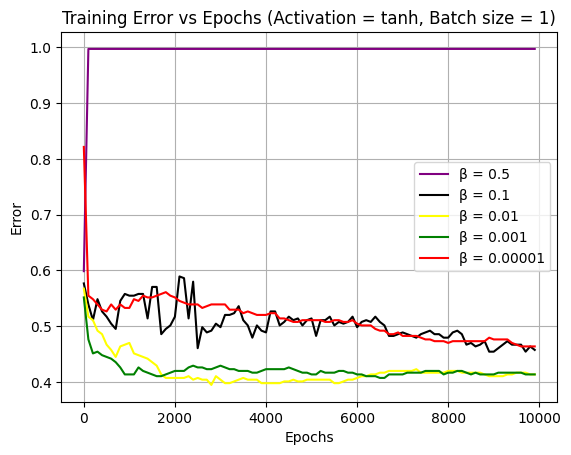

In [ ]:
learning_rates = ['0.5', '0.1', '0.01', '0.001', '0.00001']
plot_error_with_different_learning_rates(learning_rates, training_errors, 'Training', num_epochs)

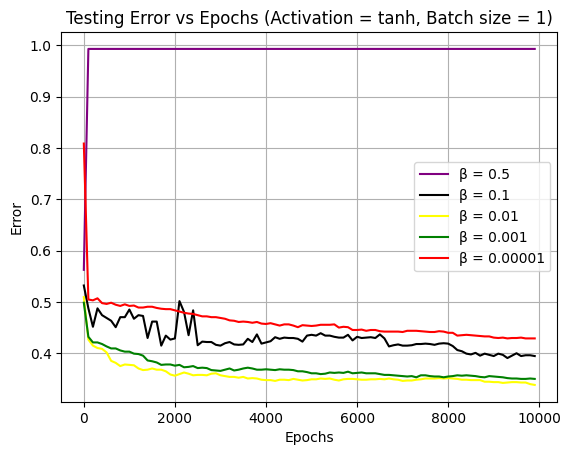

In [ ]:
learning_rates = ['0.5', '0.1', '0.01', '0.001', '0.00001']
plot_error_with_different_learning_rates(learning_rates, testing_errors, 'Testing', num_epochs)

In [ ]:
def plot_accuracy_with_different_learning_rate(learning_rate, accuracies, accuracy_type, epochs, batch_size):
    plt.bar(learning_rate, accuracies, color='blue', width = 0.4)
    plt.xlabel('Batch Size')
    plt.ylabel('Accuracy')
    plt.ylim(0, 0.8)
    plt.title(f'{accuracy_type} accuracy with batch sizes (batch size ={batch_size}, epochs = {epochs}, activation = {accuracy_type})')
    plt.show()

In [ ]:
activation_at_hidden = 'tanh'
num_epochs = 4000
training_accuracies = []
testing_accuracies = []
batch_size = 1
learning_rates = [0.5, 0.1, 0.01, 0.001, 0.00001]

for learning_rate in learning_rates:
    W1, W2, b1, b2, training_losses, testing_losses, epochs = train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    z1, z2, a1, a2 = forward(X_train, W1, W2, b1, b2, activation_at_hidden)
    training_accuracies.append(find_accuracy(y_train, a2))
    z1, z2, a1, a2 = forward(X_test, W1, W2, b1, b2, activation_at_hidden)
    testing_accuracies.append(find_accuracy(y_test, a2))

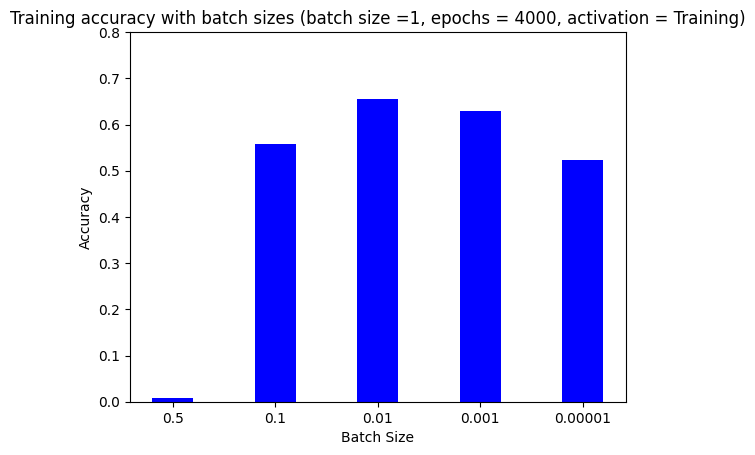

In [ ]:
'''
   There's a typo in the graph below; the x-axis displays the learning rates instead of the batch sizes.
   Activation is tanh.
'''
learning_rates = ['0.5', '0.1', '0.01', '0.001', '0.00001']
plot_accuracy_with_different_learning_rate(learning_rates, training_accuracies, 'Training', num_epochs, batch_size)

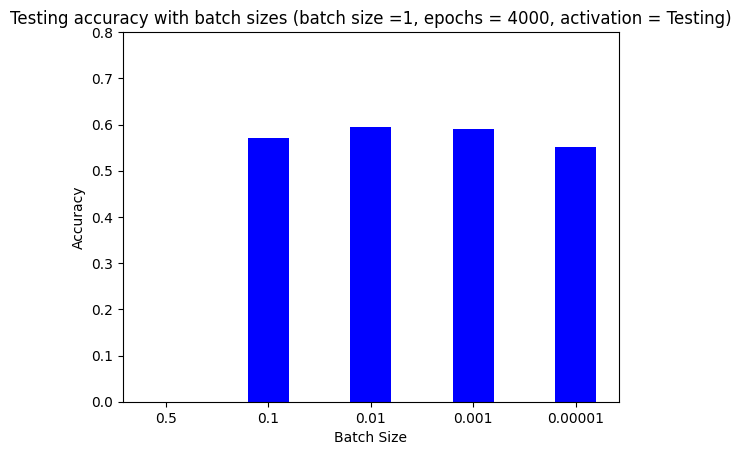

In [ ]:
'''
   There's a typo in the graph below; the x-axis displays the learning rates instead of the batch sizes.
    Activation is tanh.
'''
learning_rates = ['0.5', '0.1', '0.01', '0.001', '0.00001']
plot_accuracy_with_different_learning_rate(learning_rates, testing_accuracies, 'Testing', num_epochs, batch_size)


Observations: (number of epochs = 4000)

* The highest accuracy is attained with a learning rate of 0.01.
* A very high learning rate results in negligible learning, with an approximate accuracy of 0%.
* The highest training accuracy, reaching 67%, is achieved with a learning rate of 0.01.
* The highest testing accuracy, reaching 62.5%, is also achieved with a learning rate of 0.01.
* The activation function used at the hidden layers is tanh.
* The training loss decreases with the number of epochs and eventually stabilizes.
* Stochastic gradient descent exhibits higher accuracy compared to other optimization techniques (batch size = 1).


---



Section 2:    Multi-class classification
 **(Total points = 40)**

---
**Description of Dataset:**

*   The dataset consists of grayscale images portraying faces with dimensions of 48x48 pixels. The images have undergone automatic alignment to ensure that each face is approximately centered, maintaining a consistent amount of space in every image.
*  The primary objective is to categorize each face based on the expressed emotion, assigning it to one of three categories: Happy (0), Sad (1), or Neutral (2). The training set encompasses 17,109 examples, while the public test set comprises 4,254 examples.


**Tasks:**

1. **Explore the Dataset:** Display three randomly selected images from each class to visually understand the dataset. Generate a distribution plot illustrating the number of images in each emotion class? Is the distribution uniform? Comment. **(5 points)**
2. **Convolution:** Implement the 2D convolution function using a kernel size of 3x3. Use the sobel kernel and display the feature map for one example from each emotion class. For using sobel kernel, you need to calculate two convolutions, one for x-direction (x) and one for y-direction (y), the feature map then can be calculated as


 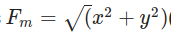

**(10 points)**

3. **Implement Sequential CNN Model** : Utilize the Keras library to implement a sequential Convolutional Neural Network (CNN) model for facial emotion classification. Adopt the following network architecture for the CNN model:


* Input layer
* Con2D with 128 neurons 3x3 kernels and ReLU activation.
* Con2D with 64 neurons 3x3 kernels and ReLU activation with batch normalization.
* Max Pooling layer with pool-size 2x2 and padding as 'valid'.
* Con2D with 16 neurons 3x3 kernels and ReLU activation and stride 2.
* Con2D with 10 neurons 3x3 kernels and ReLU activation.
* Max Pooling layer with pool-size 2x2 and padding as 'valid'.
* Batch normalization
* Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.
* Dropout of 30% ie. 0.3
* Fully Connected Dense Layer with number of classes neurons and softmax activation.

**(5 points)**

4. **Training and Compiling:** Utilize cross-entropy loss for multi-class classification and proceed to compile and train the model employing four distinct optimizers: SGD, RMSprop, Adam, and Adagrad. Generate plots illustrating the training loss for each optimizer. Provide commentary on your observations. Additionally, incorporate early stopping with parameters (min_delta=0.01, patience=2) during both the compilation and training phases of your model. **(10 points)**


**NOTE: You can try to find the best learning rate from the following: [0.001, 0.0001, 0.00001, 0.01] and take batch size to be 32 in data generators.**

5. **Activation Maps:** Generate activation maps for two selected intermediate convolutional blocks across randomly chosen 10 images, state class-specific observations. **(10 points)**


In [ ]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from keras.models import Sequential
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, RMSprop, Adam, Adagrad
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
common_file_path = '/content/drive/MyDrive/ML_Lab3_Dataset/Facial_Emotion_Recognition/Image_dataset'
train_happy_images_file_path = common_file_path + '/train/happy'
train_sad_images_file_path = common_file_path + '/train/sad'
train_neutral_images_file_path = common_file_path + '/train/neutral'
test_happy_images_file_path = common_file_path + '/test/happy'
test_sad_images_file_path = common_file_path + '/test/sad'
test_neutral_images_file_path = common_file_path + '/test/neutral'

Task 2.1: Explore the dataset

In [ ]:
def choose_random_from_directory(directory):
    files = os.listdir(directory)
    random_file = random.choice(files)
    return os.path.join(directory, random_file)

In [ ]:
def print_image(image_path):
    try:
        img = Image.open(image_path)
        display(img)
    except Exception as e:
        print("Error:", e)

Randomly choosen 3 happy faces :


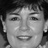

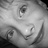

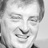

In [ ]:
# Happy Emotion class
random.seed(1065)
print("Randomly choosen 3 happy faces :")
print_image(choose_random_from_directory(train_happy_images_file_path))
print_image(choose_random_from_directory(train_happy_images_file_path))
print_image(choose_random_from_directory(train_happy_images_file_path))

Randomly choosen 3 sad faces :


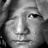

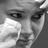

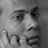

In [ ]:
# Sad Emotion class
random.seed(1065)
print("Randomly choosen 3 sad faces :")
print_image(choose_random_from_directory(train_sad_images_file_path))
print_image(choose_random_from_directory(train_sad_images_file_path))
print_image(choose_random_from_directory(train_sad_images_file_path))

Randomly choosen 3 neutral faces :


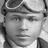

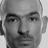

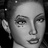

In [ ]:
# Neutral Emotion class
random.seed(1065)
print("Randomly choosen 3 neutral faces :")
print_image(choose_random_from_directory(train_neutral_images_file_path))
print_image(choose_random_from_directory(train_neutral_images_file_path))
print_image(choose_random_from_directory(train_neutral_images_file_path))

In [ ]:
# Training images distribution
num_happy_training_images =  len(os.listdir(train_happy_images_file_path))
num_sad_training_images = len(os.listdir(train_sad_images_file_path))
num_neutral_training_images  = len(os.listdir(train_neutral_images_file_path))
print("Number of training images depicting happy faces:", num_happy_training_images)
print("Number of training images depicting sad faces:", num_sad_training_images)
print("Number of training images depicting neutral faces:", num_neutral_training_images)

Number of training images depicting happy faces: 7214
Number of training images depicting sad faces: 4830
Number of training images depicting neutral faces: 4965


In [ ]:
# Testing iamges distribution
num_happy_testing_images =  len(os.listdir(test_happy_images_file_path))
num_sad_testing_images = len(os.listdir(test_sad_images_file_path))
num_neutral_testing_images  = len(os.listdir(test_neutral_images_file_path))
print("Number of testing images depicting happy faces:", num_happy_testing_images)
print("Number of testing images depicting sad faces:", num_sad_testing_images)
print("Number of testing images depicting neutral faces:", num_neutral_testing_images)

Number of testing images depicting happy faces: 1774
Number of testing images depicting sad faces: 1247
Number of testing images depicting neutral faces: 1233


In [ ]:
def plot_distribution(emotion_classes, emotion_class_frequency):
    plt.bar(emotion_classes, emotion_class_frequency, color = 'green', width = 0.2)
    plt.xlabel("Emotion class")
    plt.ylabel("Frequency")
    plt.title("Emotion class vs Frequency")
    plt.show()

In [ ]:
emotion_classes = ['Happy', 'Sad', 'Neutral']
training_emotion_class_frequency = [num_happy_training_images, num_sad_training_images, num_neutral_training_images]
testing_emotion_class_frequency = [num_happy_testing_images, num_sad_testing_images, num_neutral_testing_images]

------------------- Training Dataset -------------------


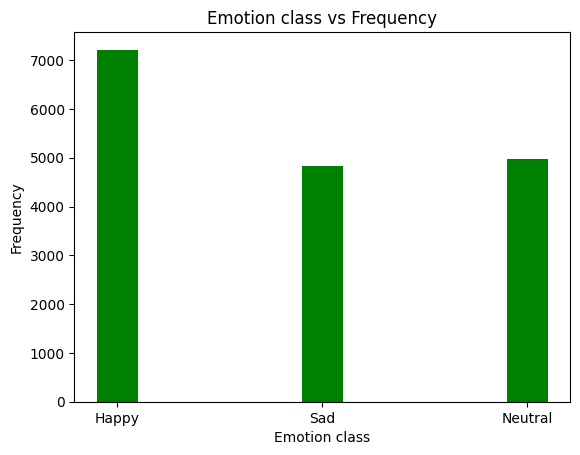

In [ ]:
print("------------------- Training Dataset -------------------")
plot_distribution(emotion_classes, training_emotion_class_frequency)

------------------- Testing Dataset -------------------


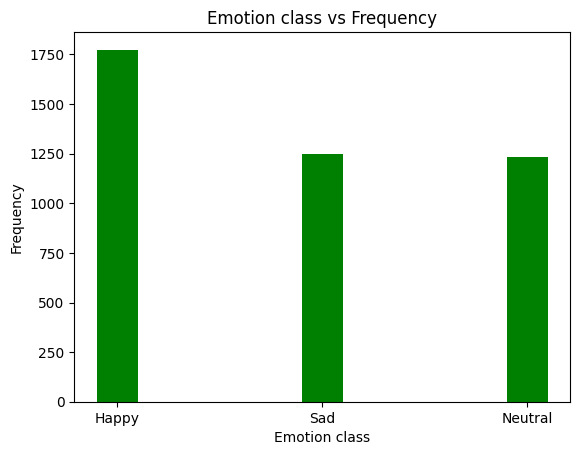

In [ ]:
print("------------------- Testing Dataset -------------------")
plot_distribution(emotion_classes, testing_emotion_class_frequency)

Comment: The distribution is non-uniform due to difference in frequency of classes.

Task 2.2: Plotting the feature map (using sobel kernal)

In [ ]:
# 2D convolution
def convolve2d(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    feature_map_height = image_height - kernel_height + 1
    feature_map_width = image_width - kernel_width + 1

    feature_map = np.zeros((feature_map_height, feature_map_width))

    for y in range(feature_map_height):
        for x in range(feature_map_width):
            feature_map[y, x] = np.sum(padded_image[y:y+kernel_height, x:x+kernel_width] * kernel)

    return feature_map

In [ ]:
# Sobel filter
def sobel_filter(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    gradient_x = convolve2d(image, sobel_x)
    gradient_y = convolve2d(image, sobel_y)

    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    return gradient_magnitude

In [ ]:
# Plotting feature map
def plot_feature_map(image_path):
    image = np.array(Image.open(image_path))
    feature_map = sobel_filter(image)
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(feature_map, cmap='gray')
    plt.title('Sobel Feature Map')
    plt.axis('off')

    plt.show()

Faeture Map of randomly choosen happy face :


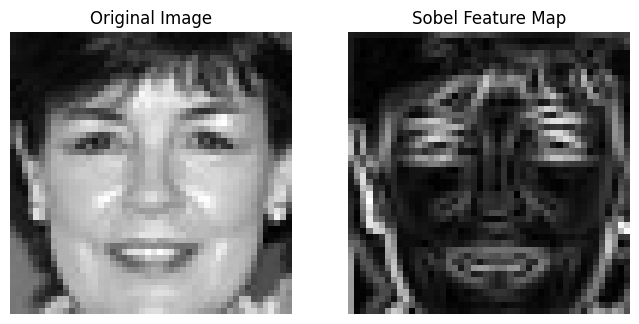




Feature map of randomly choosen sad face :


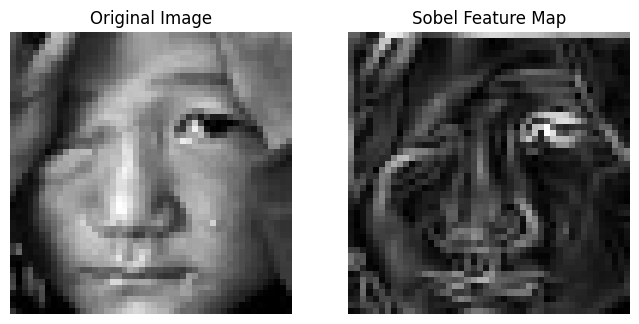




Feature map of randomly choosen neutral face :


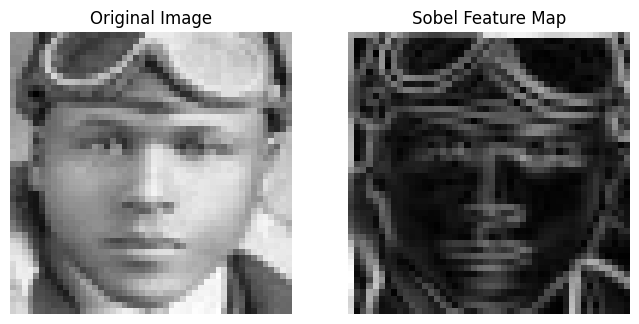

In [ ]:
print("Faeture Map of randomly choosen happy face :")
plot_feature_map(choose_random_from_directory(train_happy_images_file_path))

print("\n\n")
print("Feature map of randomly choosen sad face :")
plot_feature_map(choose_random_from_directory(train_sad_images_file_path))

print("\n\n")
print("Feature map of randomly choosen neutral face :")
plot_feature_map(choose_random_from_directory(train_neutral_images_file_path))

Task 2.3: Implementing sequential CNN model

In [ ]:
# Architecture of CNN model
def create_sequential_cnn_model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(128, (3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Conv2D(16, (3, 3), activation='relu', strides=2))
    model.add(Conv2D(10, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    return model

Task 2.4: Implementing sequential CNN model

In [ ]:
np.random.seed(1065)

batch_size  = 32
image_size = 48

training_data_gen  = ImageDataGenerator()
testing_data_gen = ImageDataGenerator()

# Training set
train_set = training_data_gen.flow_from_directory(common_file_path + "/train",
                                              target_size = (image_size, image_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


# Testing set
test_set = testing_data_gen.flow_from_directory(common_file_path + "/test",
                                              target_size = (image_size, image_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = False)

Found 17009 images belonging to 3 classes.
Found 4254 images belonging to 3 classes.


In [ ]:
# Model compilation and saving
def model_compiling_and_testing(model, early_stopping, learning_rate):
    optimizers = [SGD(learning_rate=learning_rate), RMSprop(learning_rate=learning_rate), Adam(learning_rate=learning_rate), Adagrad(learning_rate=learning_rate)]

    training_histories = []

    optimizer_names = ['SGD', 'RMSprop', 'Adam', 'Adagrad']
    for idx in range(4):
        optimizer = optimizers[idx]
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(train_set, epochs=15, batch_size=32, validation_data=test_set, callbacks=[early_stopping])
        training_histories.append(history)
        _, train_accuracy = model.evaluate(train_set, verbose=0)
        _, test_accuracy = model.evaluate(test_set, verbose=0)
        print(f"*** Optimizer: {optimizer_names[idx]} ***")
        print(f"Training Accuracy: {train_accuracy}, Testing Accuracy: {test_accuracy}")

        model.save(f"_{optimizer_names[idx]}_{learning_rate}")

    plt.figure(figsize=(10, 6))
    for i, history in enumerate(training_histories):
        plt.plot(history.history['loss'], label=str(optimizer_names[i]))
    plt.title(f'Training Loss for Different Optimizers (β = {learning_rate})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
input_shape = (48, 48, 1)
num_classes = 3

model = create_sequential_cnn_model(input_shape, num_classes)
early_stopping = EarlyStopping(min_delta=0.01, patience=2)

Epoch 1/15
532/532 [==============================] - 5016s 9s/step - loss: 5.4384 - accuracy: 0.4445 - val_loss: 3.4010 - val_accuracy: 0.5066
Epoch 2/15
532/532 [==============================] - 464s 872ms/step - loss: 2.4597 - accuracy: 0.5281 - val_loss: 1.8401 - val_accuracy: 0.5165
Epoch 3/15
532/532 [==============================] - 471s 885ms/step - loss: 1.4333 - accuracy: 0.5723 - val_loss: 1.1986 - val_accuracy: 0.5806
Epoch 4/15
532/532 [==============================] - 465s 873ms/step - loss: 1.0655 - accuracy: 0.5915 - val_loss: 0.9729 - val_accuracy: 0.6025
Epoch 5/15
532/532 [==============================] - 473s 890ms/step - loss: 0.9132 - accuracy: 0.6166 - val_loss: 0.9041 - val_accuracy: 0.6079
Epoch 6/15
532/532 [==============================] - 513s 965ms/step - loss: 0.8466 - accuracy: 0.6294 - val_loss: 0.8922 - val_accuracy: 0.6058
Epoch 7/15
532/532 [==============================] - 523s 982ms/step - loss: 0.8102 - accuracy: 0.6411 - val_loss: 0.7995 - v

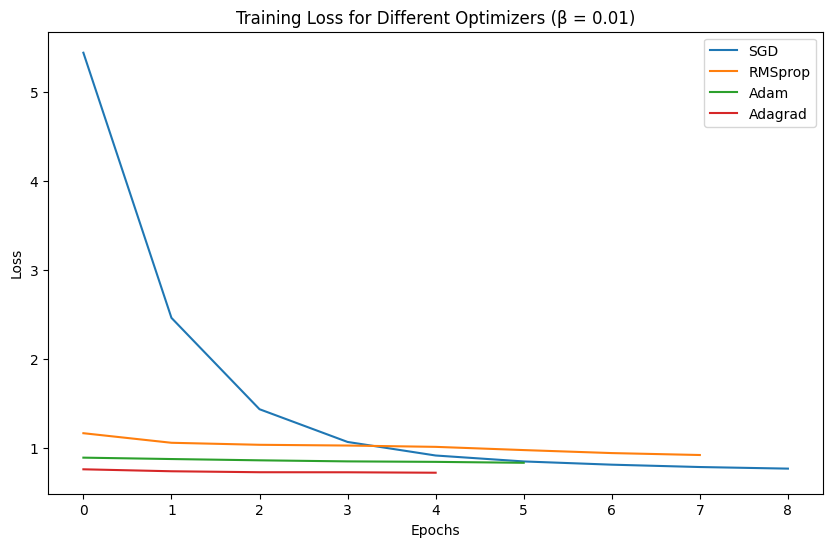

In [ ]:
learning_rate = 0.01
model_compiling_and_testing(model, early_stopping, learning_rate)

Observation: (β = 0.01)


| Optimizer | Training accuracy | Testing accuarcy | epochs |
|----------|----------|----------| ----------|    
| SGD   | 66.49  |  55.50 |    9    |
| RMDprop | 58.61 | 55.15 |    8 |
| Adam   | 62.57   | 64.20   |  5  |
| Adagrad | 66.98 | 67.63 |   5 |


* As the number of epochs increases, the training loss gradually decreases.
* The training accuracy initially rises with the number of epochs until reaching a certain threshold, after which it begins to decline.
* Adagrad demonstrated the highest testing accuracy (67.63%) compared to all other optimizers, suggesting its strong capability to generalize to unseen data.
* SGD exhibited the lowest testing accuracy (55.50%) among the optimizers, implying potential challenges in generalizing to the testing dataset, indicative of overfitting.
* SGD required the longest training time to converge.





Task 2.5: Activation maps

In [ ]:
# The following observations are for the model, using Adagrad optimizer, learning rate = 0.01, max_epochs = 15.
# Get the compiled and trained model.
def get_compiled_model(model, early_stopping, learning_rate, optimizer, optimizer_name, n_epochs):
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_set, epochs=n_epochs, batch_size=32, validation_data=test_set, callbacks=[early_stopping])
    model.save(f"_{optimizer_name}_{learning_rate}")
    return model

In [ ]:
input_shape = (48, 48, 1)
num_classes = 3
n_epochs = 15
optimizer_name = 'Adagrad'
learning_rate = 0.01
model = create_sequential_cnn_model(input_shape, num_classes)
early_stopping = EarlyStopping(min_delta=0.01, patience=2)
Adagrad(learning_rate=learning_rate)

model = get_compiled_model(model, early_stopping, learning_rate, Adagrad(learning_rate=learning_rate), optimizer_name, n_epochs)

Epoch 1/15
532/532 [==============================] - 3838s 7s/step - loss: 3.2956 - accuracy: 0.4743 - val_loss: 1.4398 - val_accuracy: 0.5317
Epoch 2/15
532/532 [==============================] - 64s 121ms/step - loss: 1.1280 - accuracy: 0.5663 - val_loss: 1.0947 - val_accuracy: 0.4734
Epoch 3/15
532/532 [==============================] - 65s 122ms/step - loss: 0.9282 - accuracy: 0.5990 - val_loss: 0.9388 - val_accuracy: 0.5835
Epoch 4/15
532/532 [==============================] - 73s 136ms/step - loss: 0.8685 - accuracy: 0.6145 - val_loss: 0.8578 - val_accuracy: 0.6194
Epoch 5/15
532/532 [==============================] - 63s 119ms/step - loss: 0.8278 - accuracy: 0.6301 - val_loss: 0.8637 - val_accuracy: 0.6126
Epoch 6/15
532/532 [==============================] - 65s 122ms/step - loss: 0.7939 - accuracy: 0.6504 - val_loss: 0.8378 - val_accuracy: 0.6204
Epoch 7/15
532/532 [==============================] - 65s 123ms/step - loss: 0.7700 - accuracy: 0.6678 - val_loss: 0.8454 - val_acc

In [ ]:
# Layers in the model
layer_names = [layer.name for layer in model.layers]
print(layer_names)

'''
   Choosen layers are 'conv2d_13' and 'conv2d_15'.
'''

['conv2d_12', 'conv2d_13', 'batch_normalization_6', 'max_pooling2d_6', 'conv2d_14', 'conv2d_15', 'max_pooling2d_7', 'batch_normalization_7', 'flatten_3', 'dense_6', 'dropout_3', 'dense_7']


In [ ]:
# Taking 10 (4 + 4 + 4)random images from each emotion class.
images, labels = next(train_set)

happy_images = []
sad_images = []
neutral_images = []

for idx in range(len(labels)):
    if np.argmax(labels[idx]) == 0:
        happy_images.append(images[idx])
    elif np.argmax(labels[idx]) == 1:
        neutral_images.append(images[idx])
    else:
        sad_images.append(images[idx])

In [ ]:
# Ceil function.
def ceil_(x):
    integer_part = int(x)
    return integer_part + 1 if x - integer_part > 0 else integer_part

In [ ]:
# Plotting the activation maps.
def plot_activation_maps(activation_maps):
    layer_names = ['conv2d_13', 'conv2d_15']
    for j, activation_map in enumerate(activation_maps):
        num_features = activation_map.shape[-1]
        num_rows = ceil_(num_features / 4)
        plt.figure(figsize=(16, 4 * num_rows))
        for i in range(num_features):
            plt.subplot(num_rows, 4, i + 1)
            single_activation_map = activation_map[0, :, :, i]
            plt.imshow(single_activation_map, cmap='viridis')
            plt.title(f"Feature Map {i + 1}")
            plt.axis('off')
        plt.suptitle(f"Activation Maps for Layer {layer_names[j]}")
        plt.tight_layout()
        plt.show()

In [ ]:
# Generate activation maps.
def generate_activation_maps(model, img):
    x = np.expand_dims(img, axis=0)
    activations = []
    for layer_name in ['conv2d_13', 'conv2d_15']:
        intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
        intermediate_output = intermediate_layer_model.predict(x)
        activations.append(intermediate_output)
    return activations

In [ ]:
# Plotting the original image.
def plot_image(image):
    plt.subplot(2, 4, 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

1/1 [==============================] - 0s 104ms/step


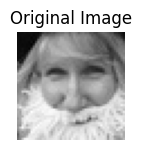

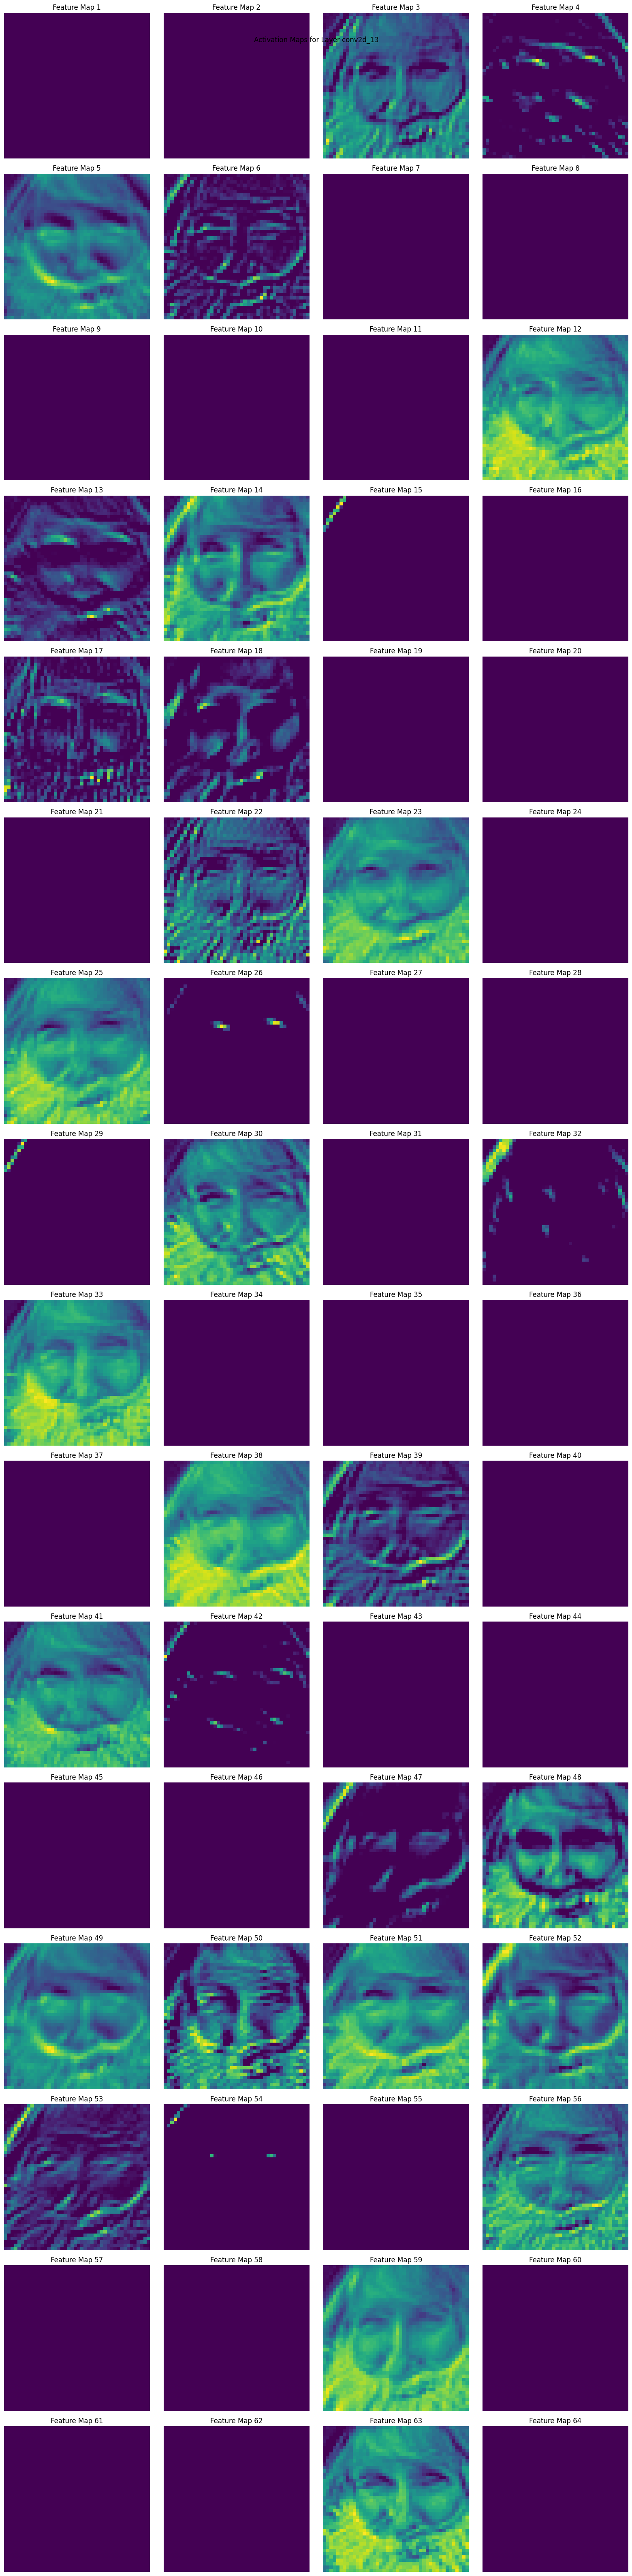

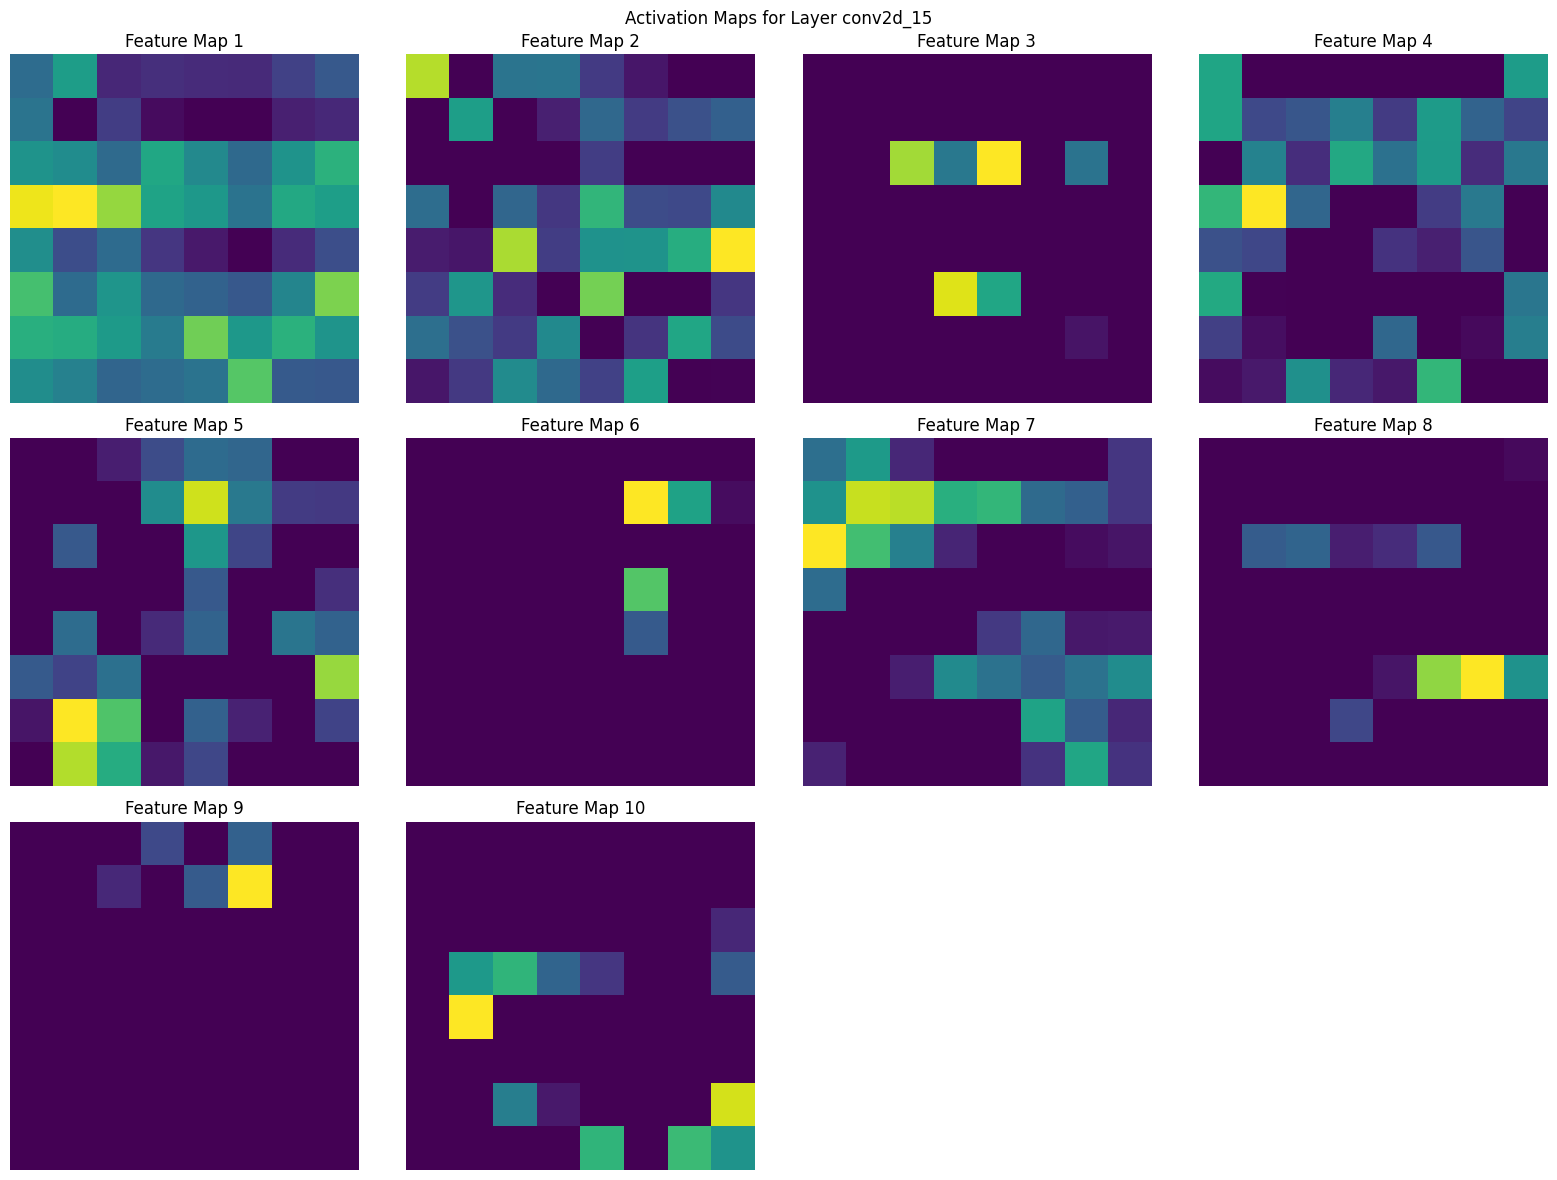

1/1 [==============================] - 0s 63ms/step


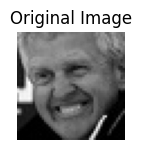

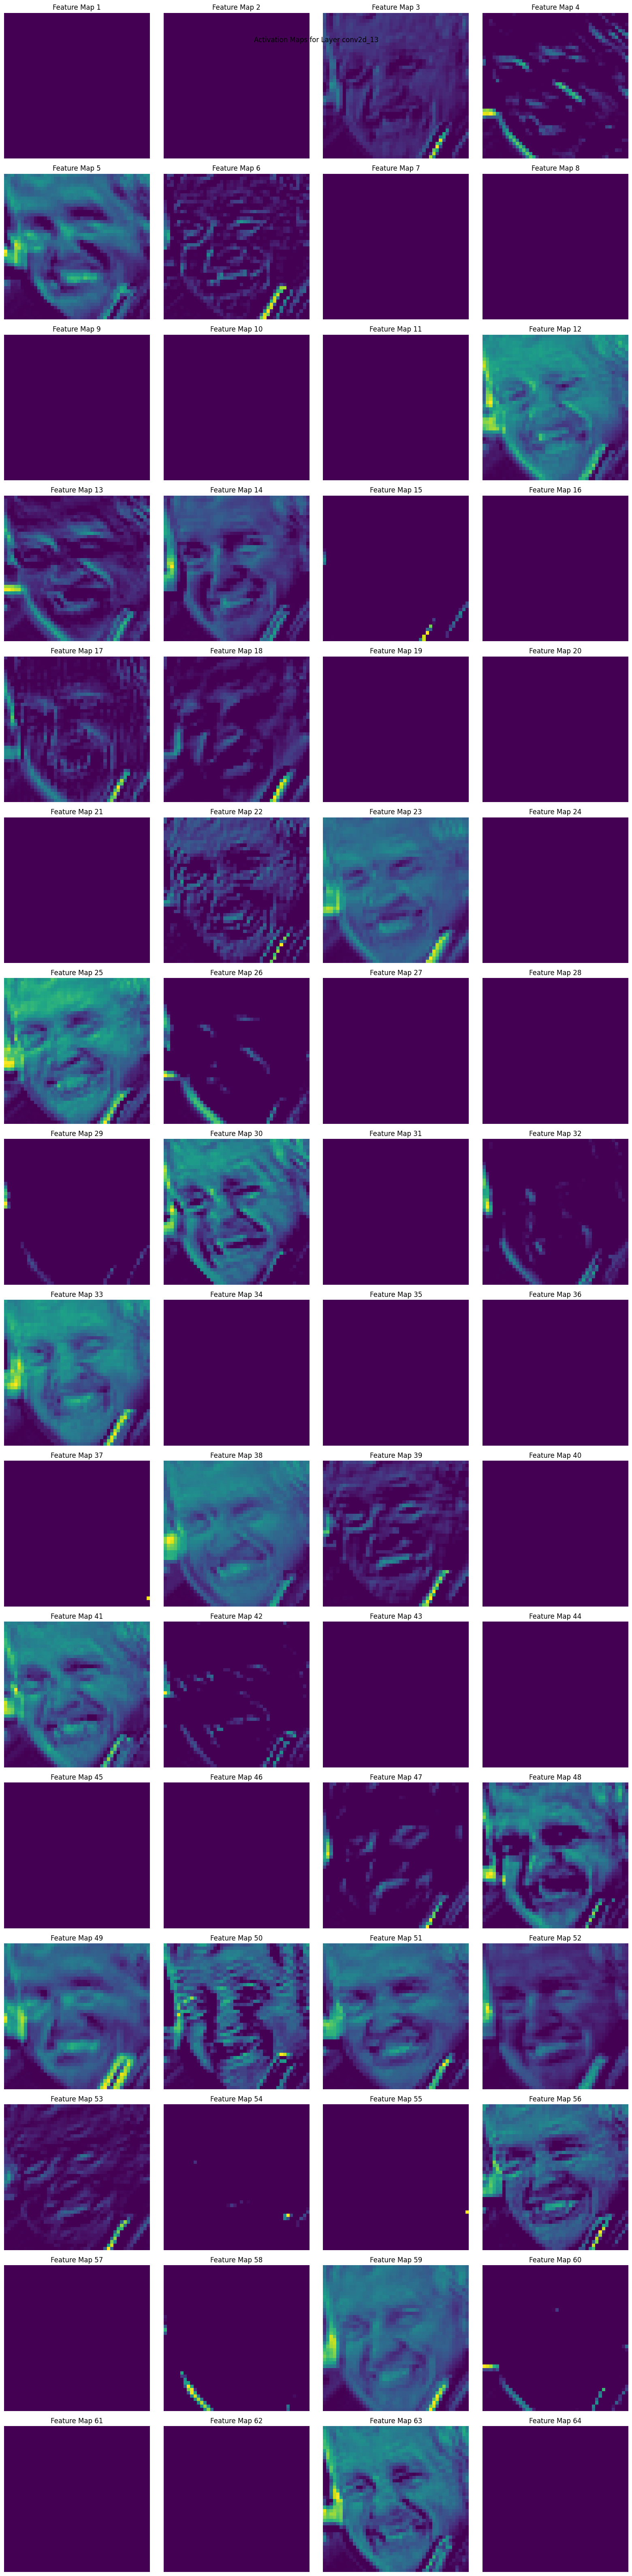

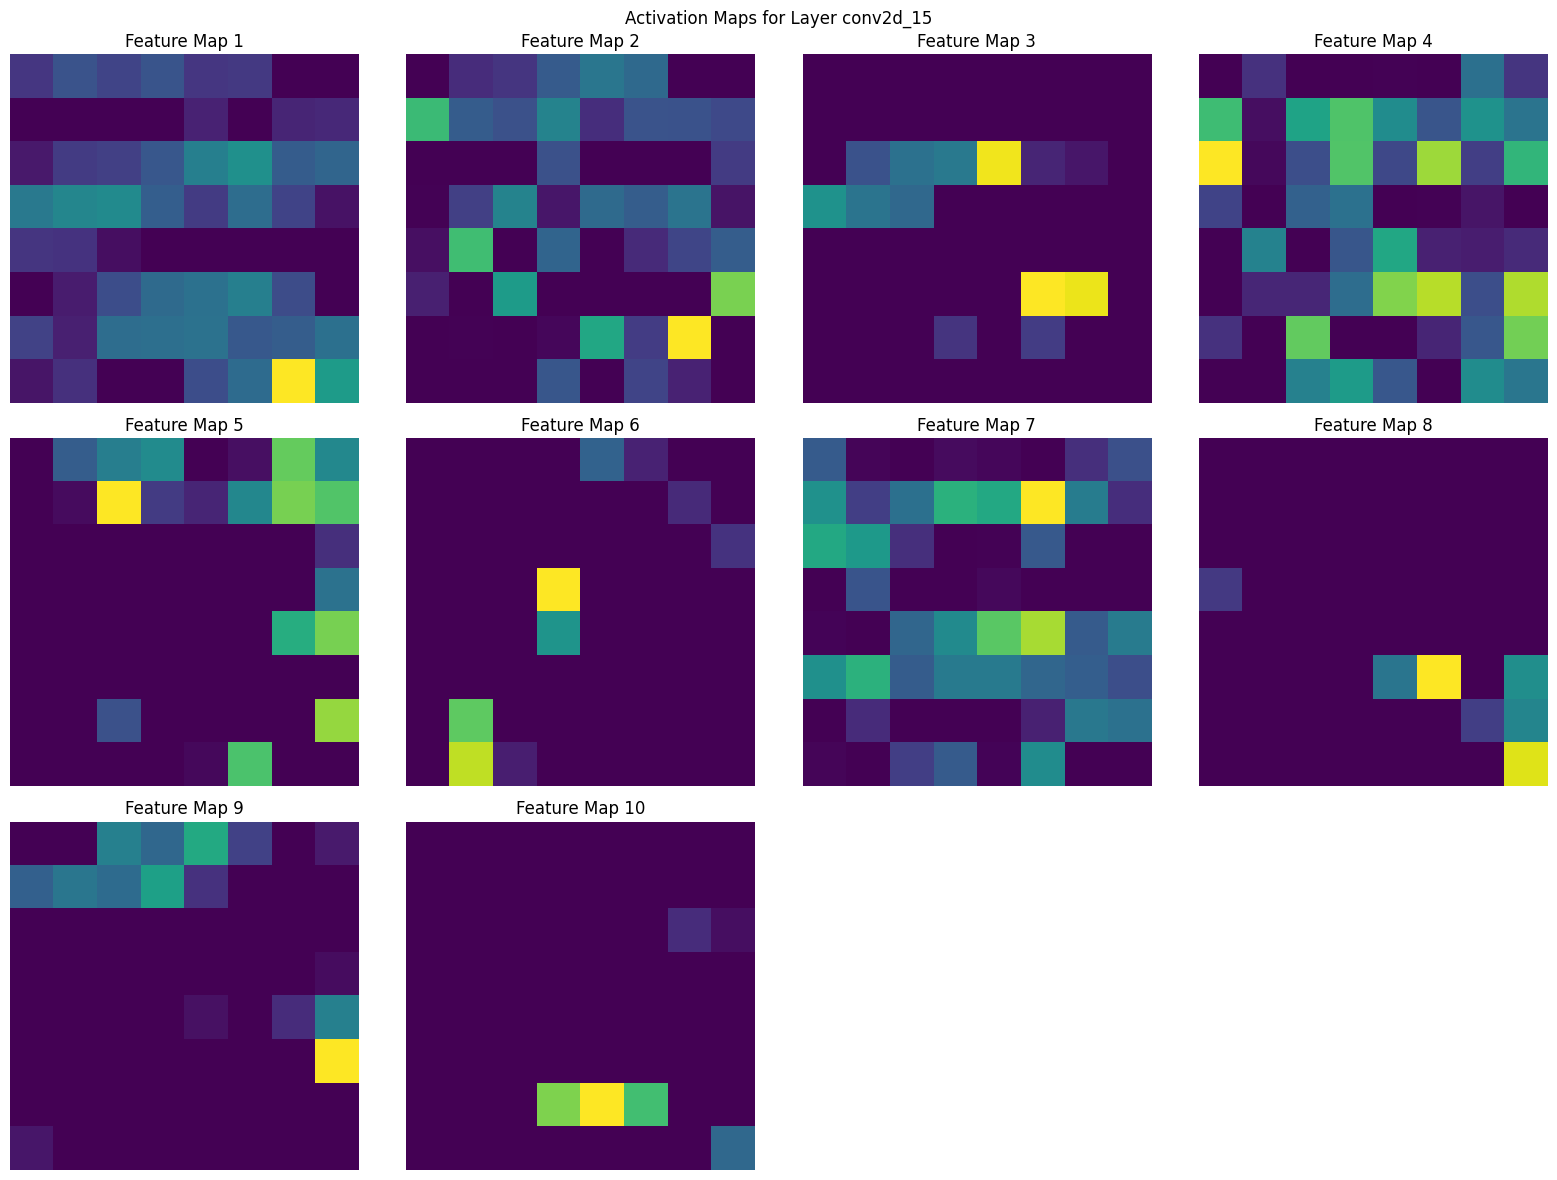

1/1 [==============================] - 0s 113ms/step


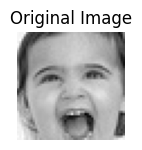

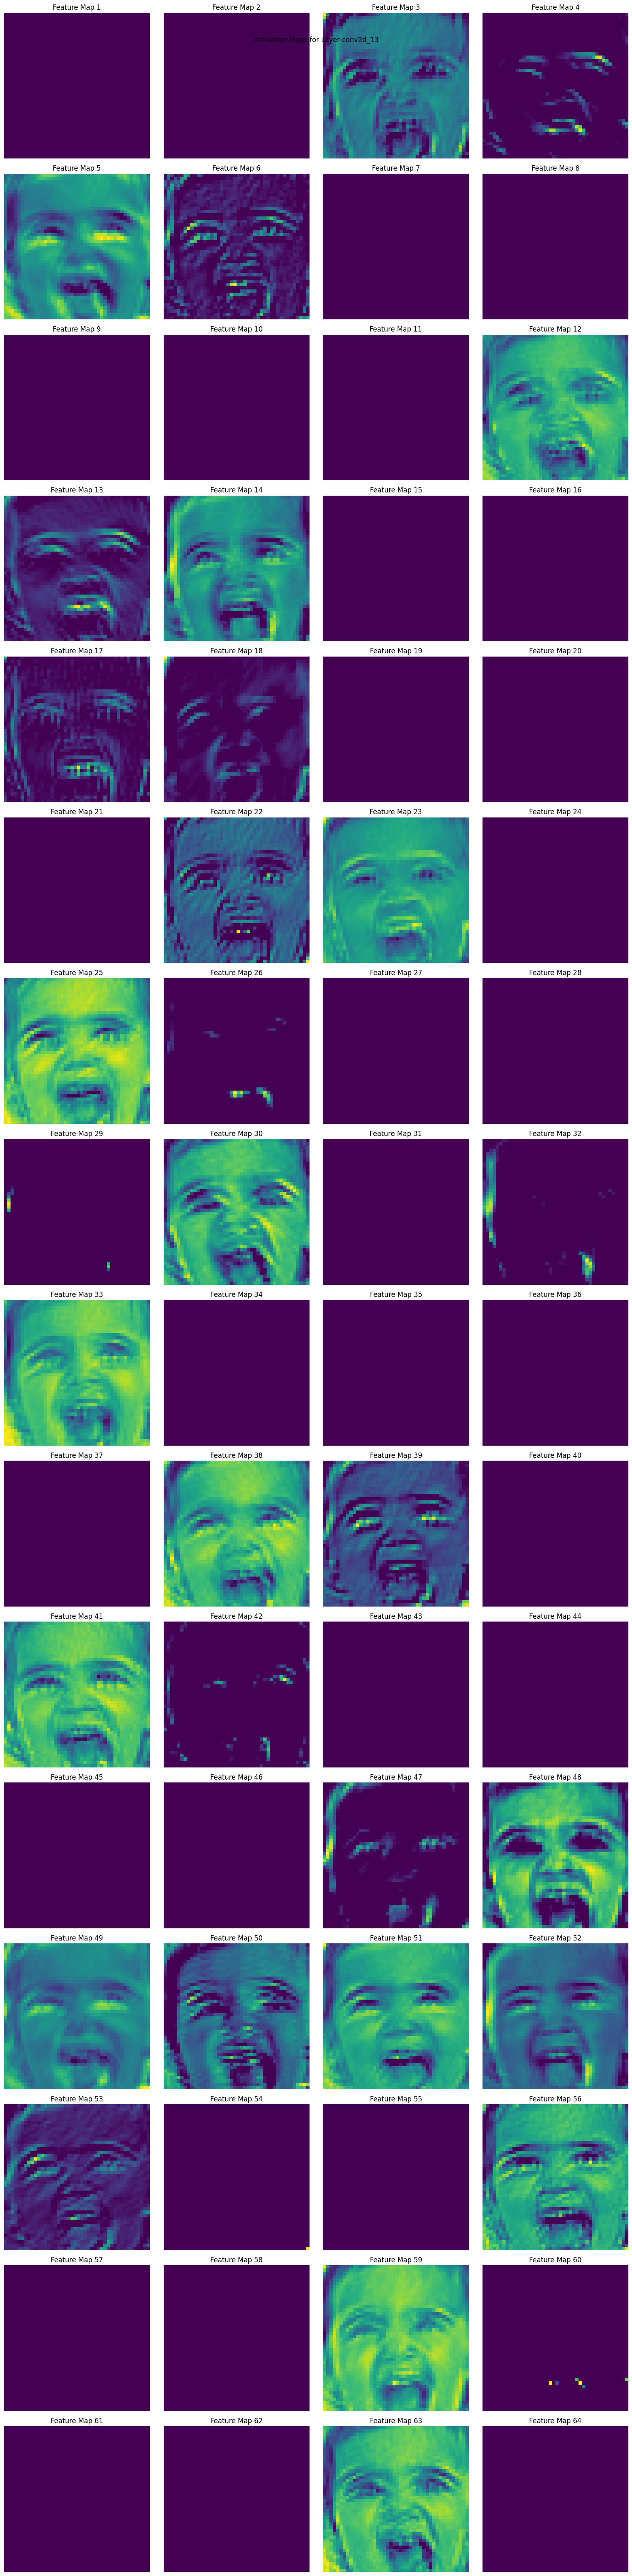

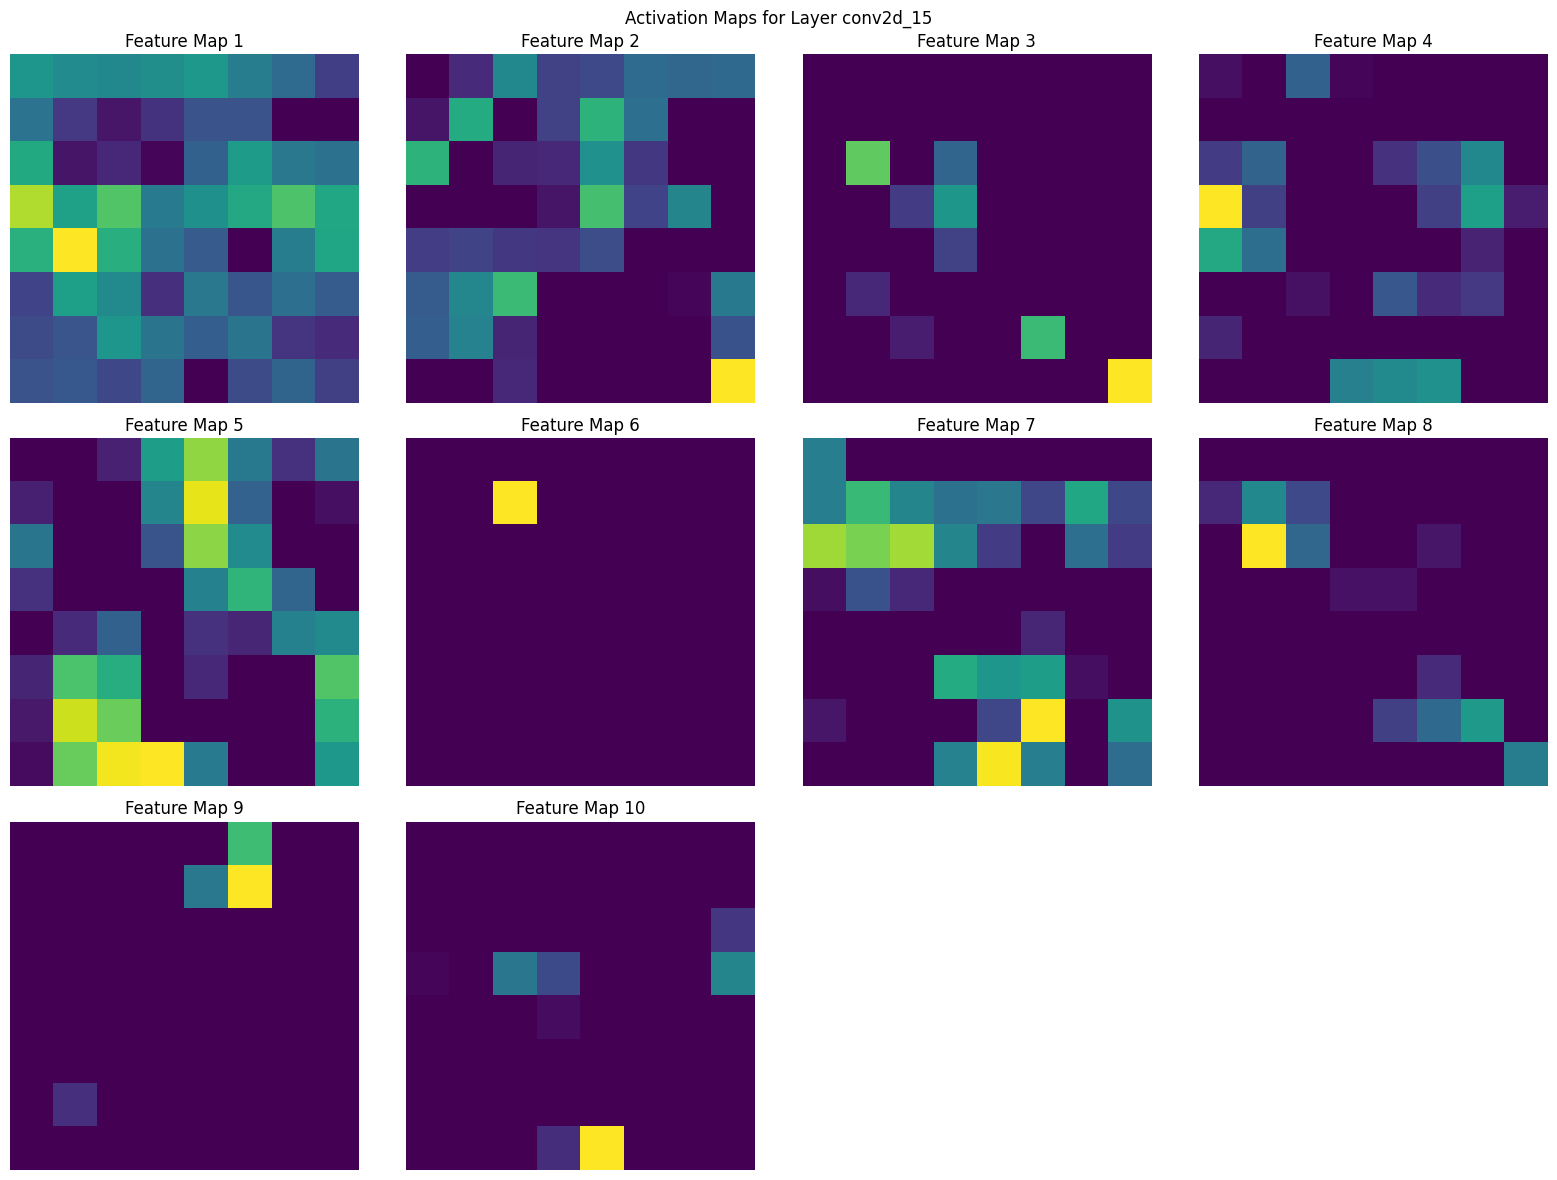

1/1 [==============================] - 0s 67ms/step


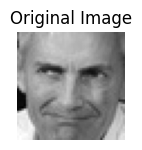

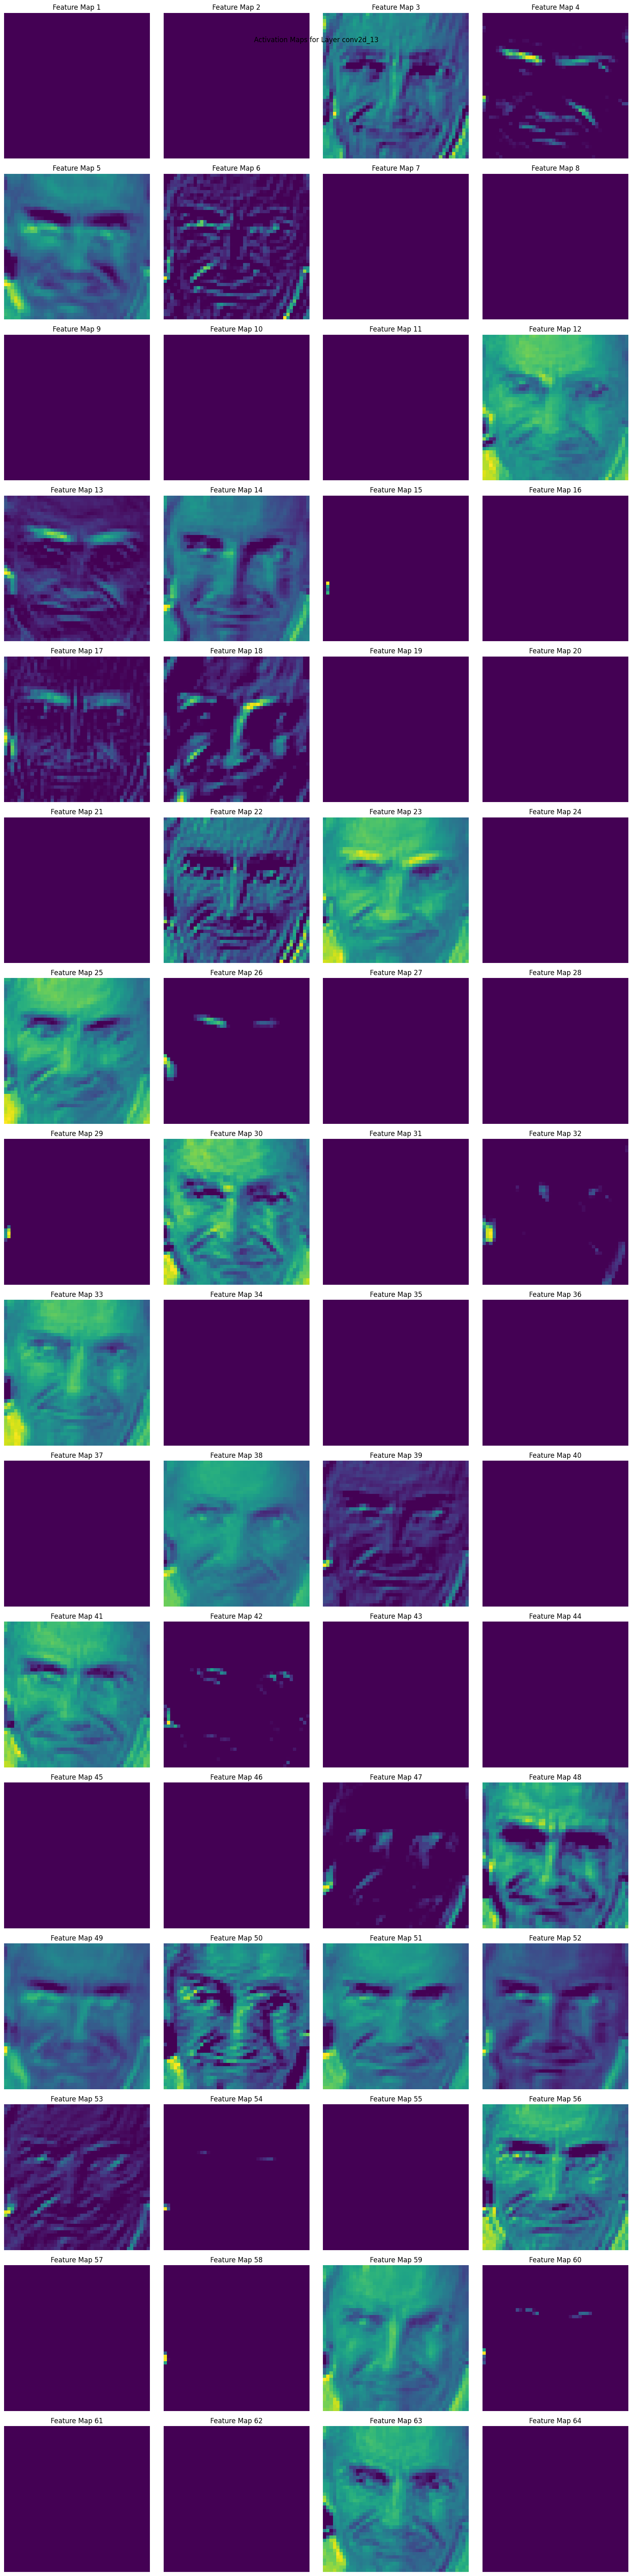

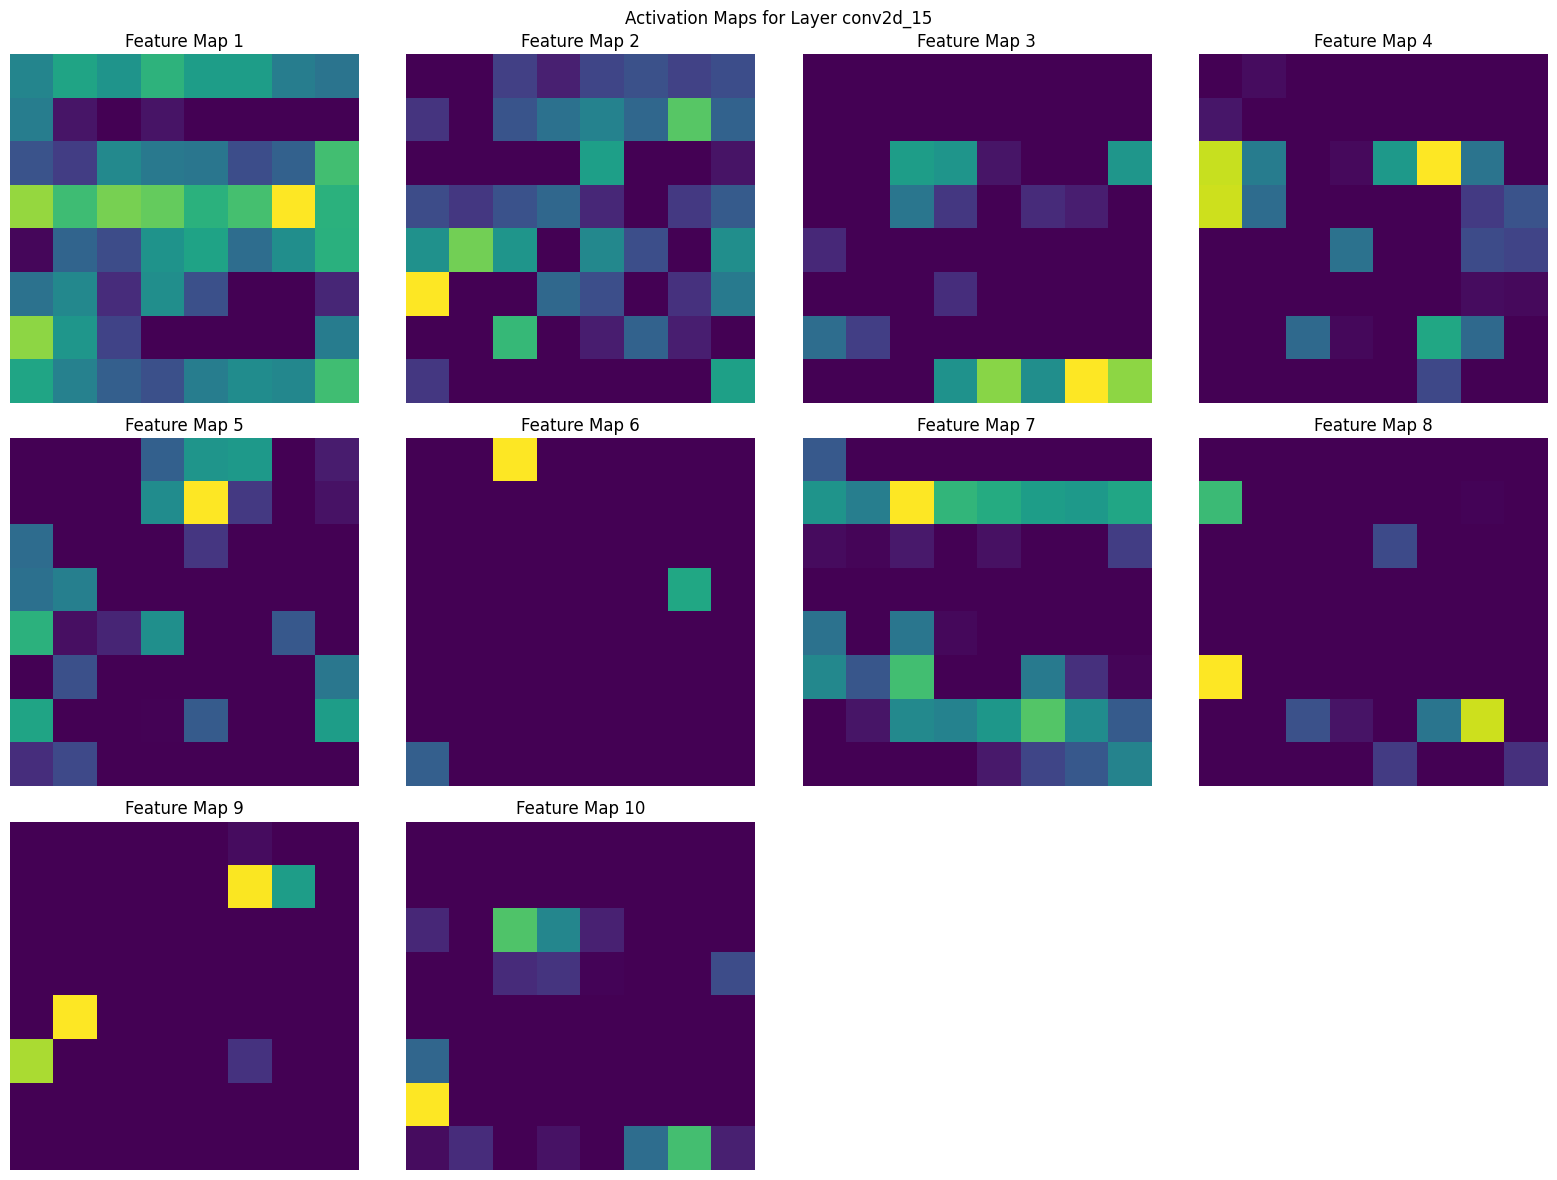

In [ ]:
# Activation maps for happy images.
for idx, image in enumerate(happy_images[:4]):
    plot_image(image)
    activation_maps = generate_activation_maps(model, image)
    plot_activation_maps(activation_maps)

1/1 [==============================] - 0s 108ms/step


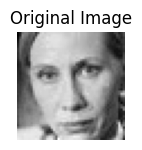

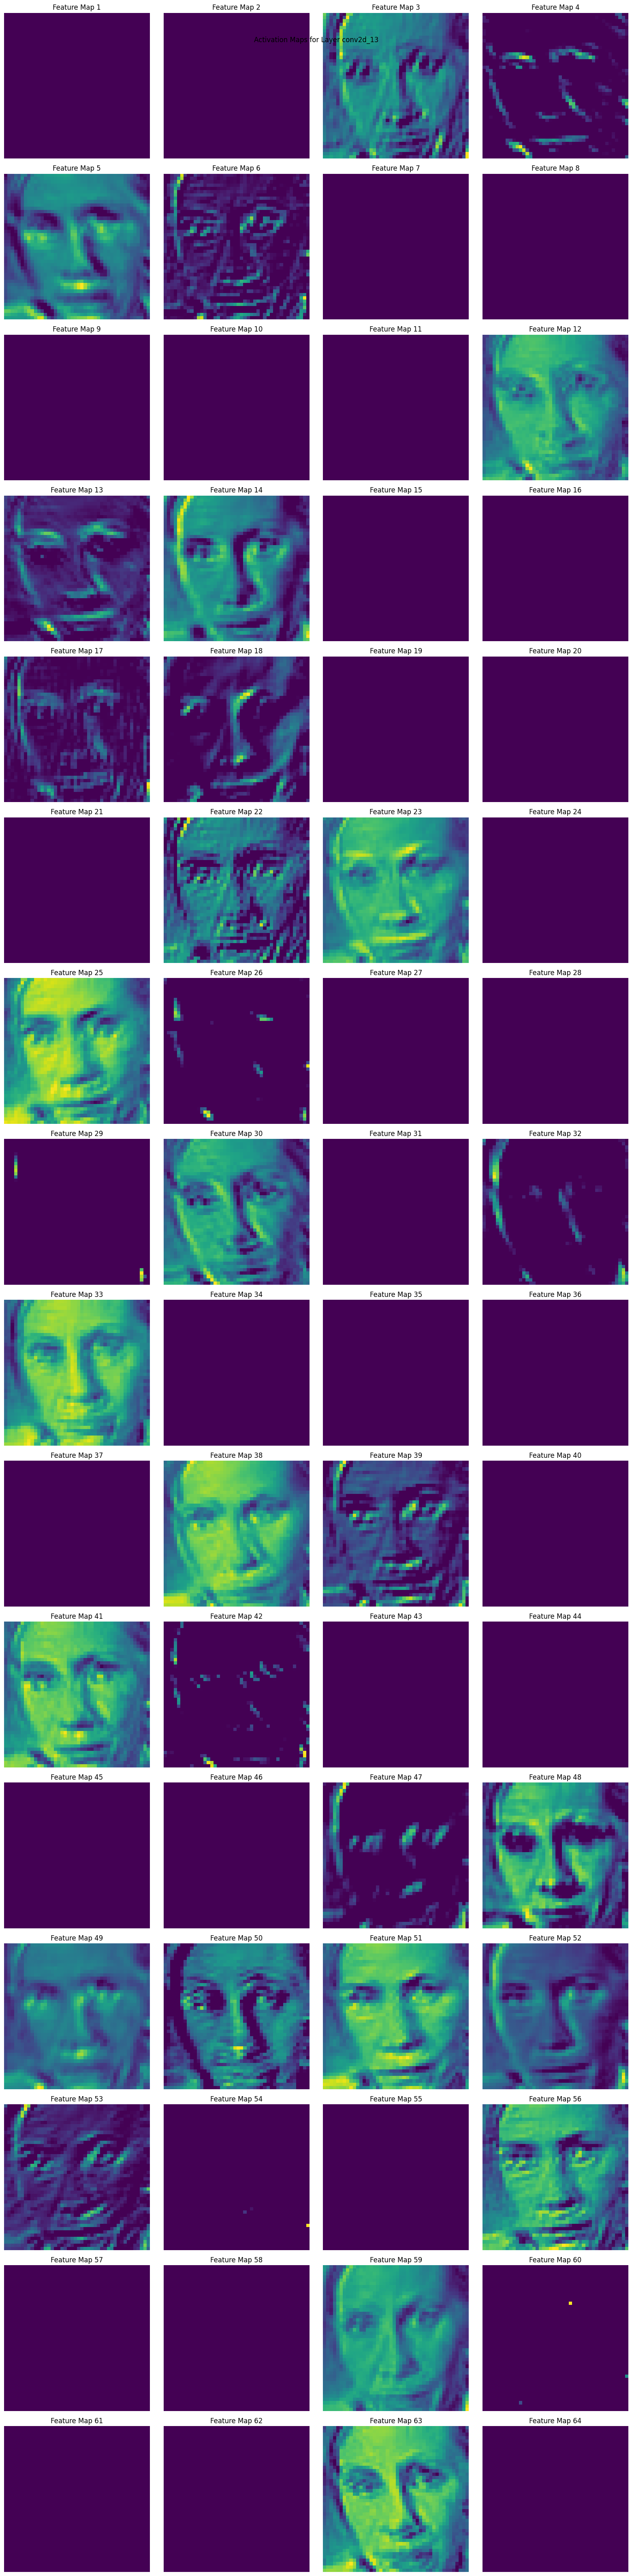

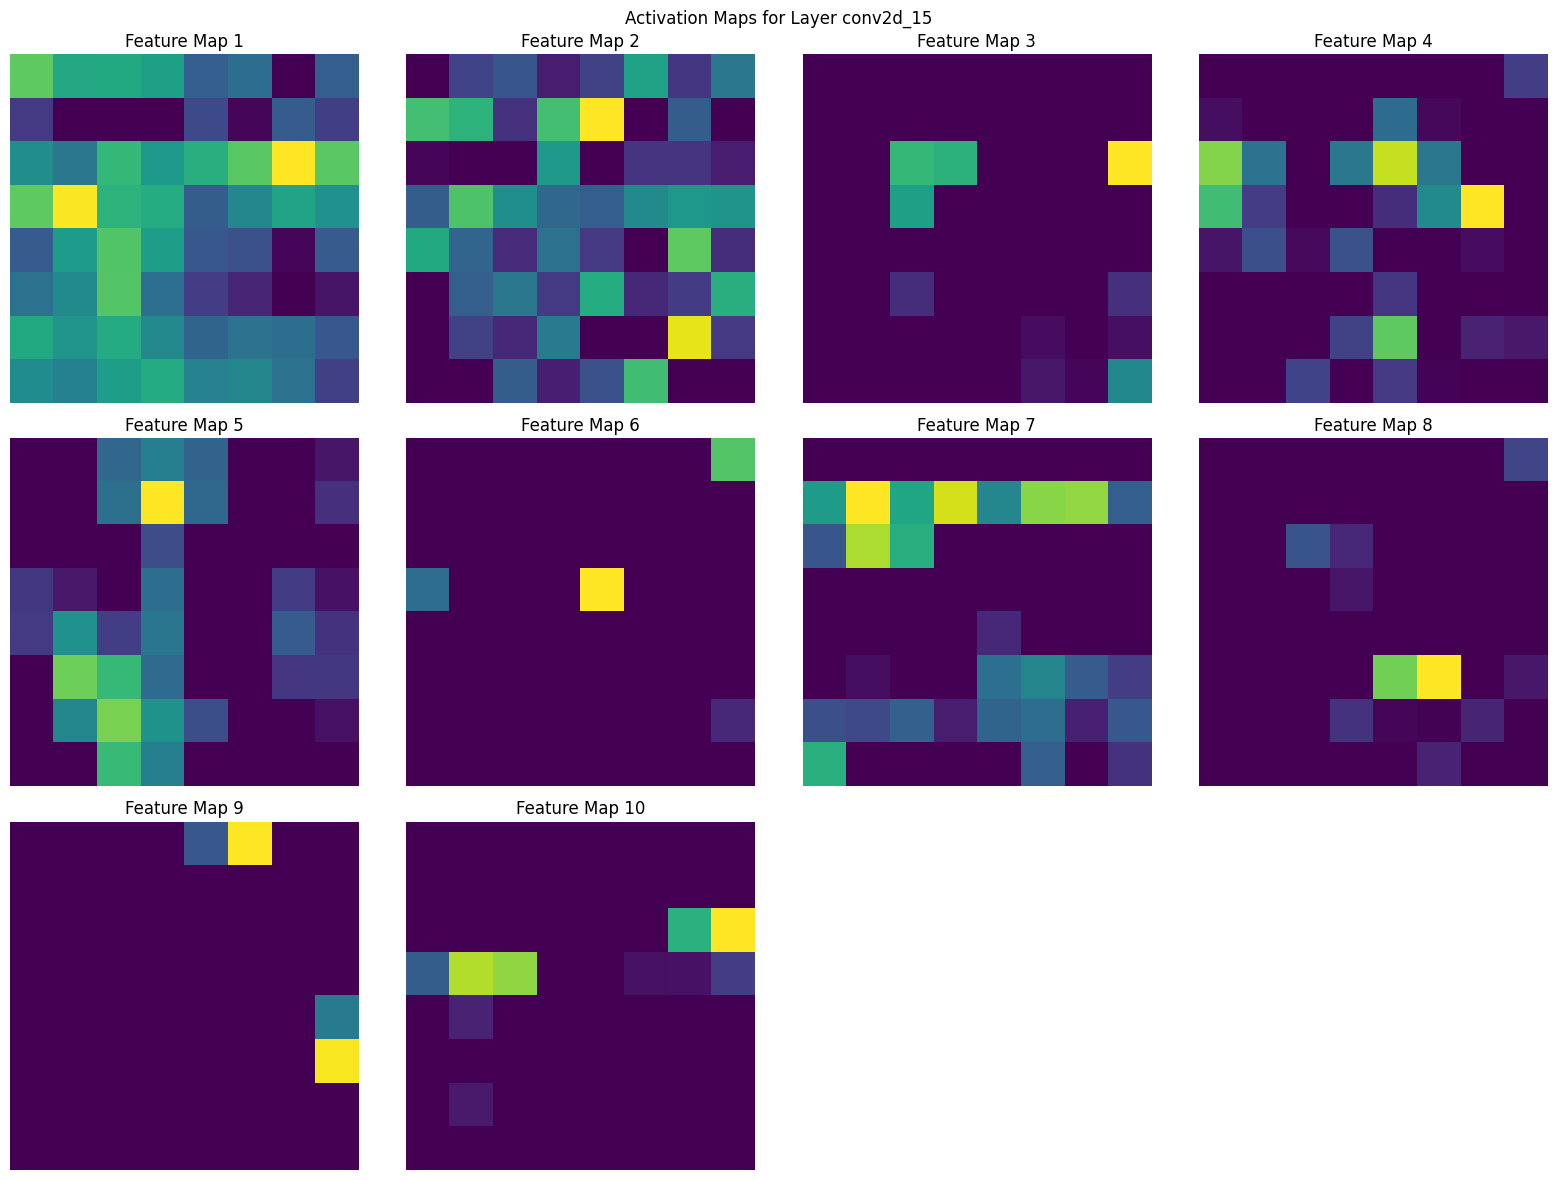

1/1 [==============================] - 0s 65ms/step


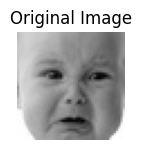

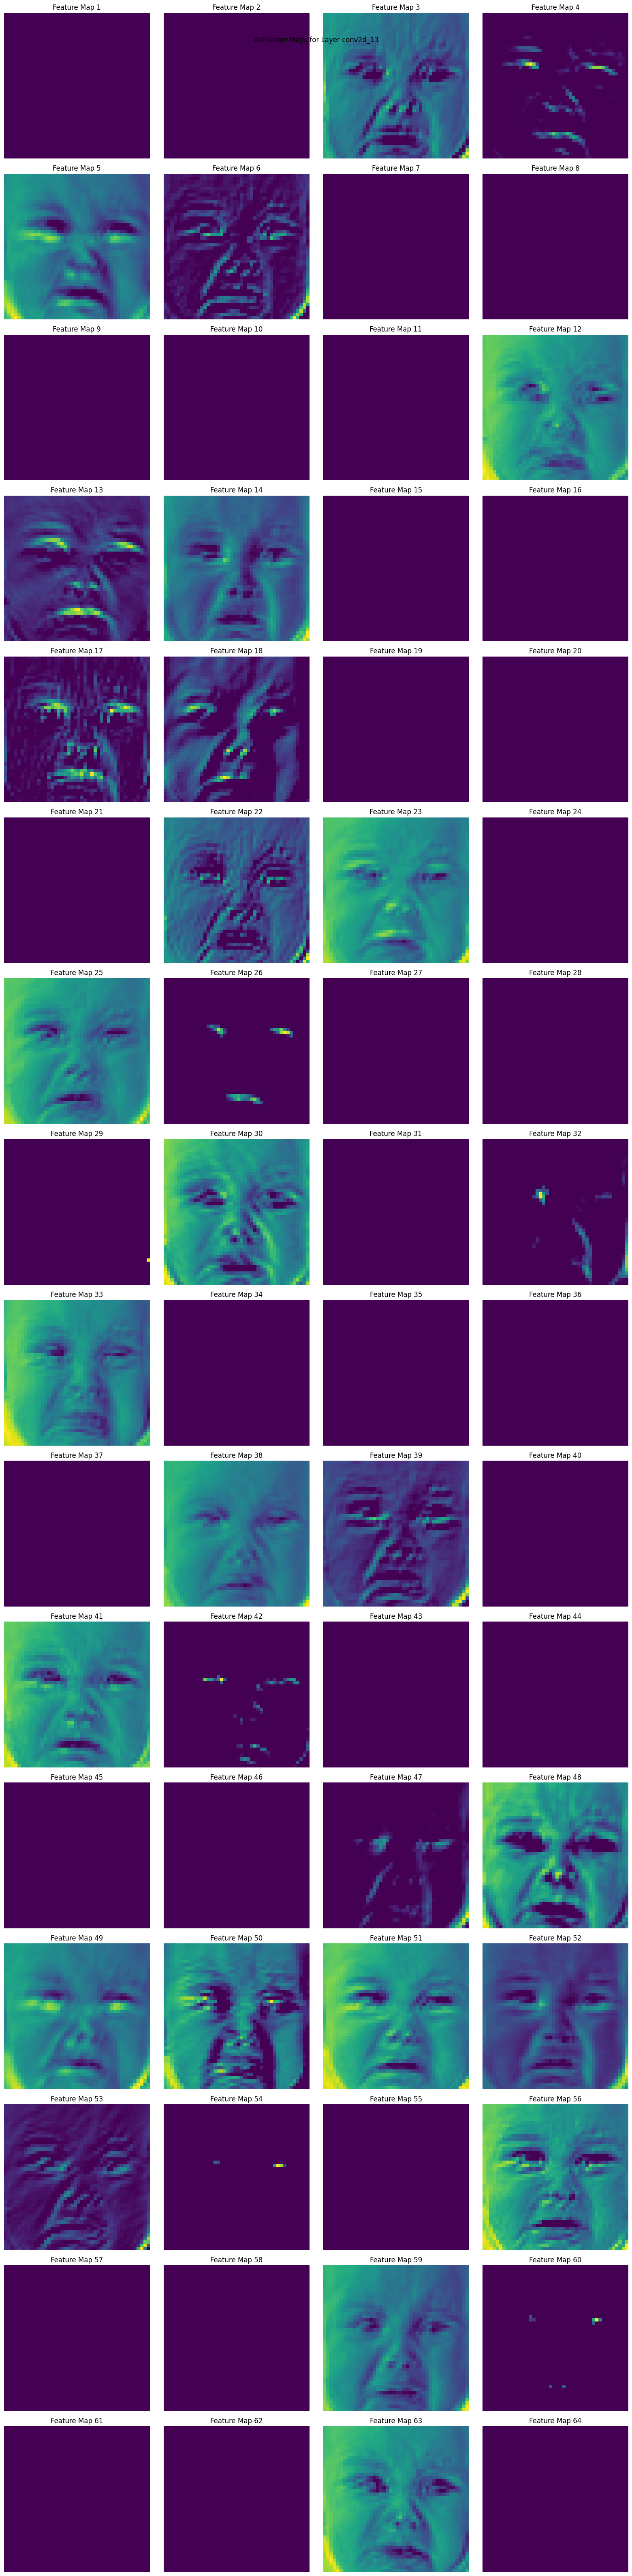

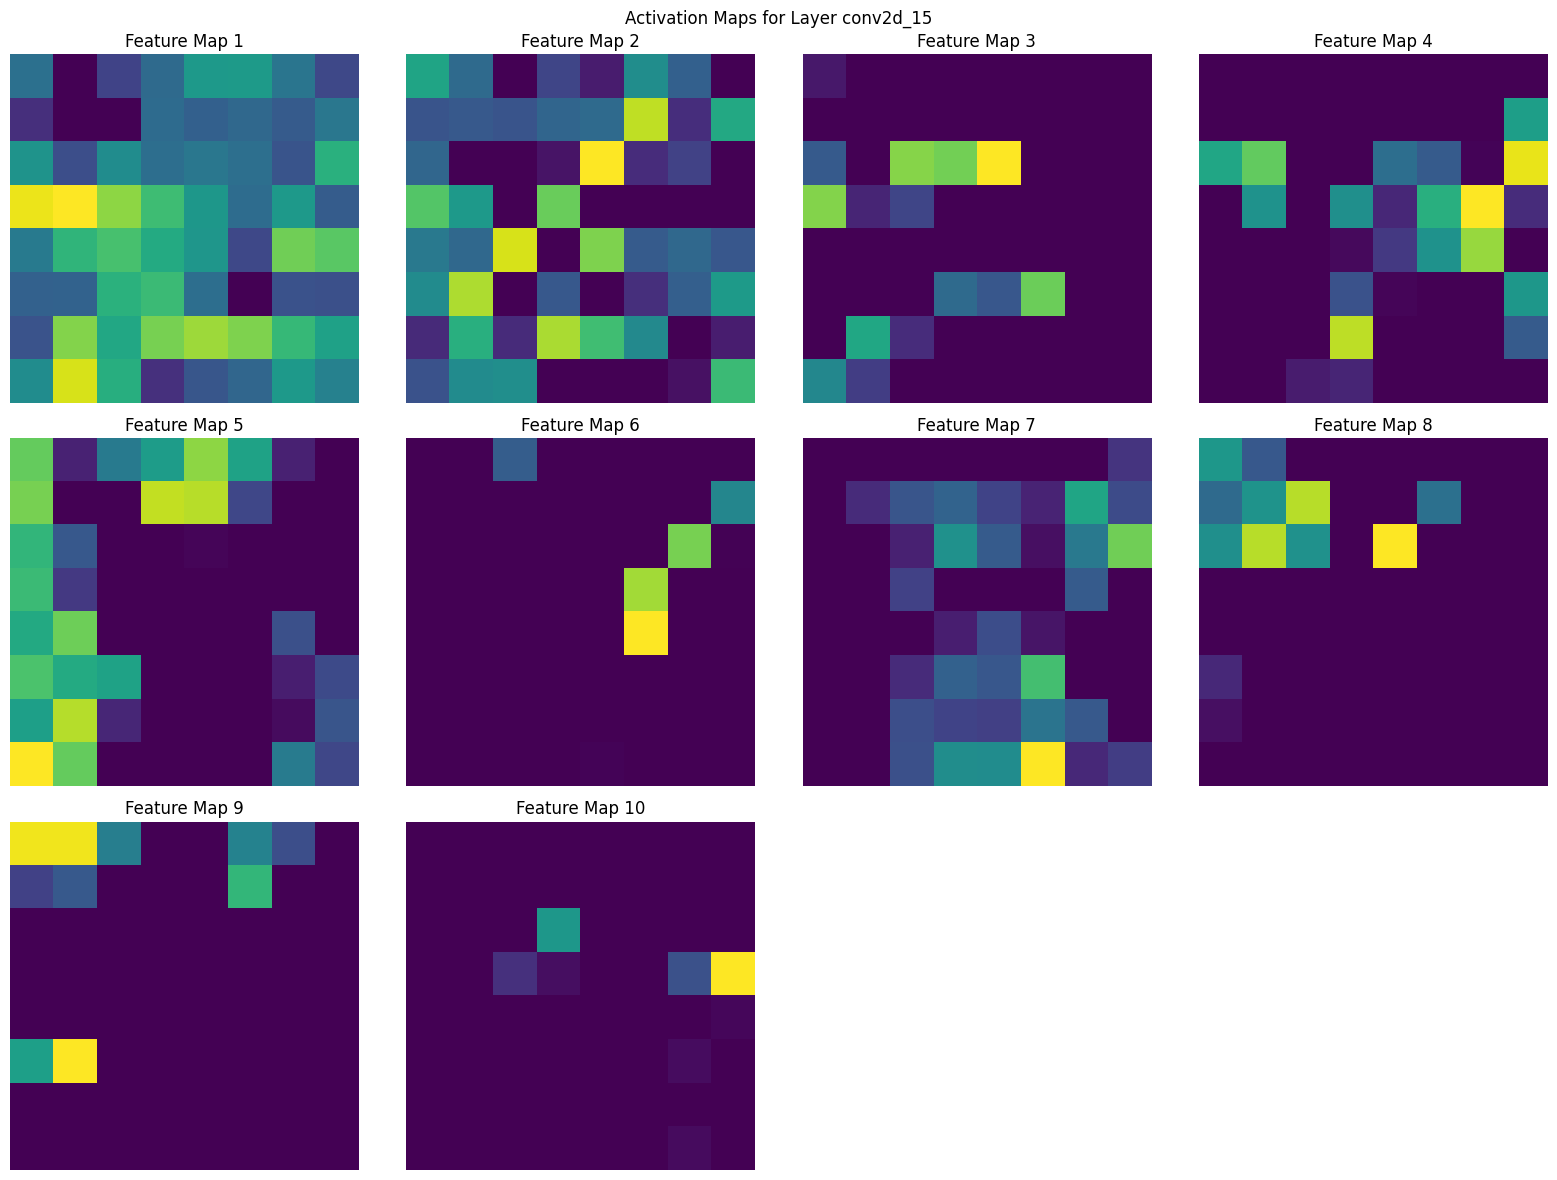

1/1 [==============================] - 0s 64ms/step


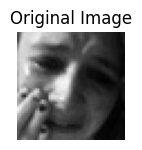

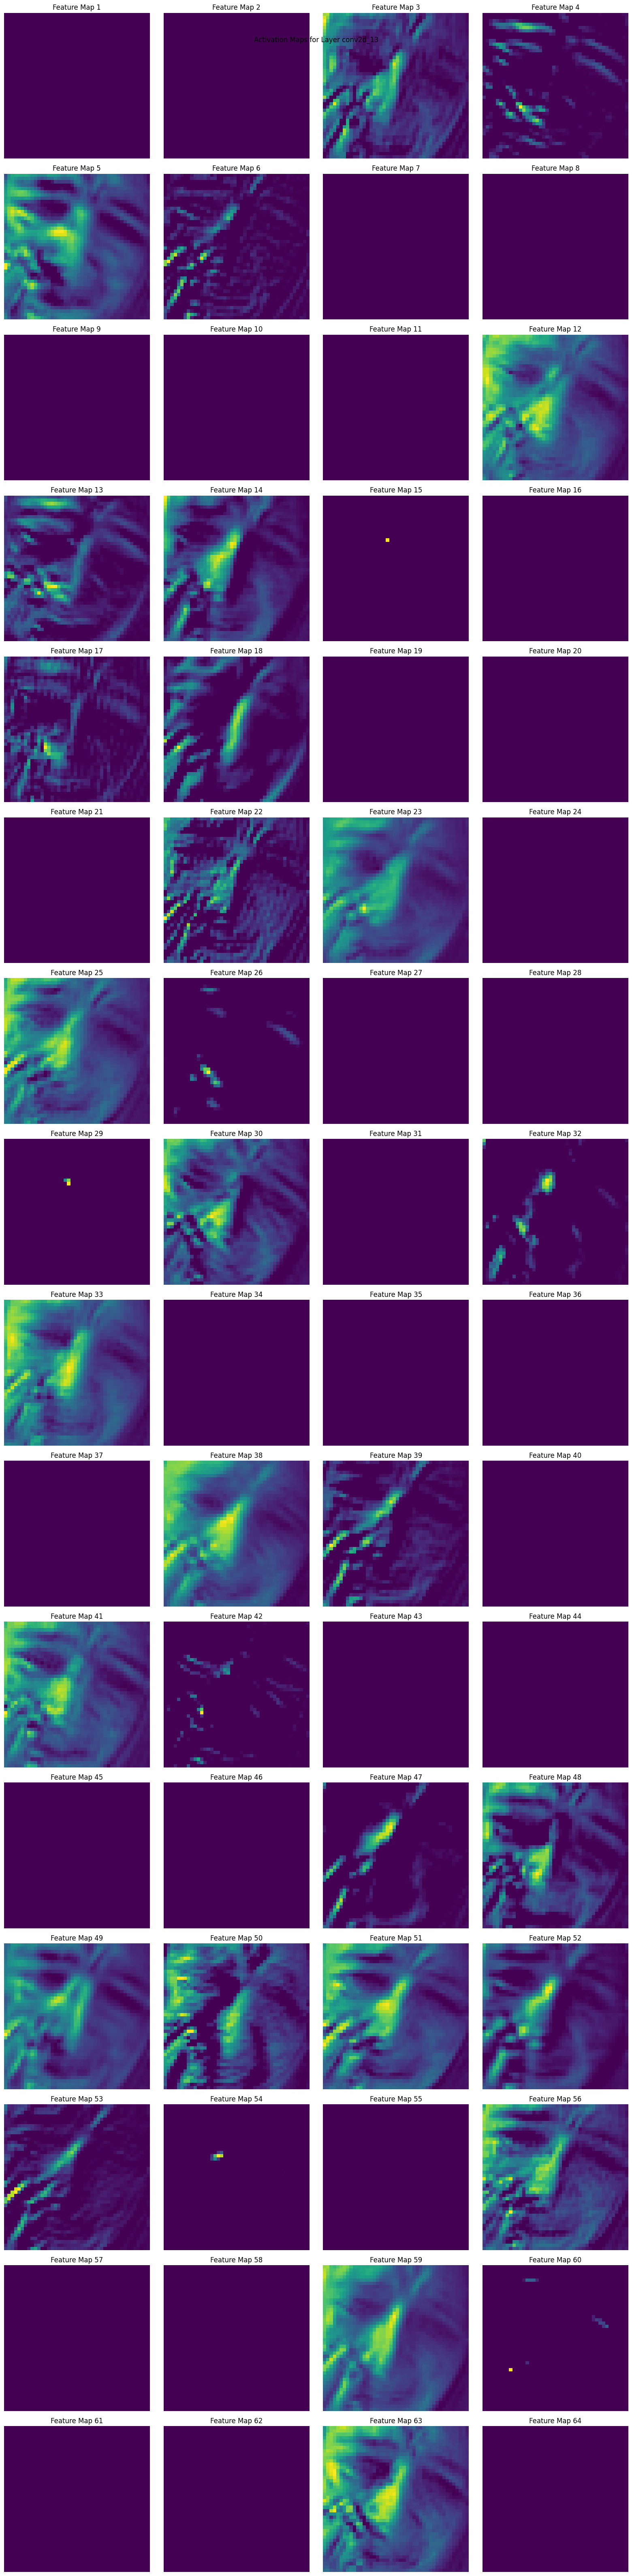

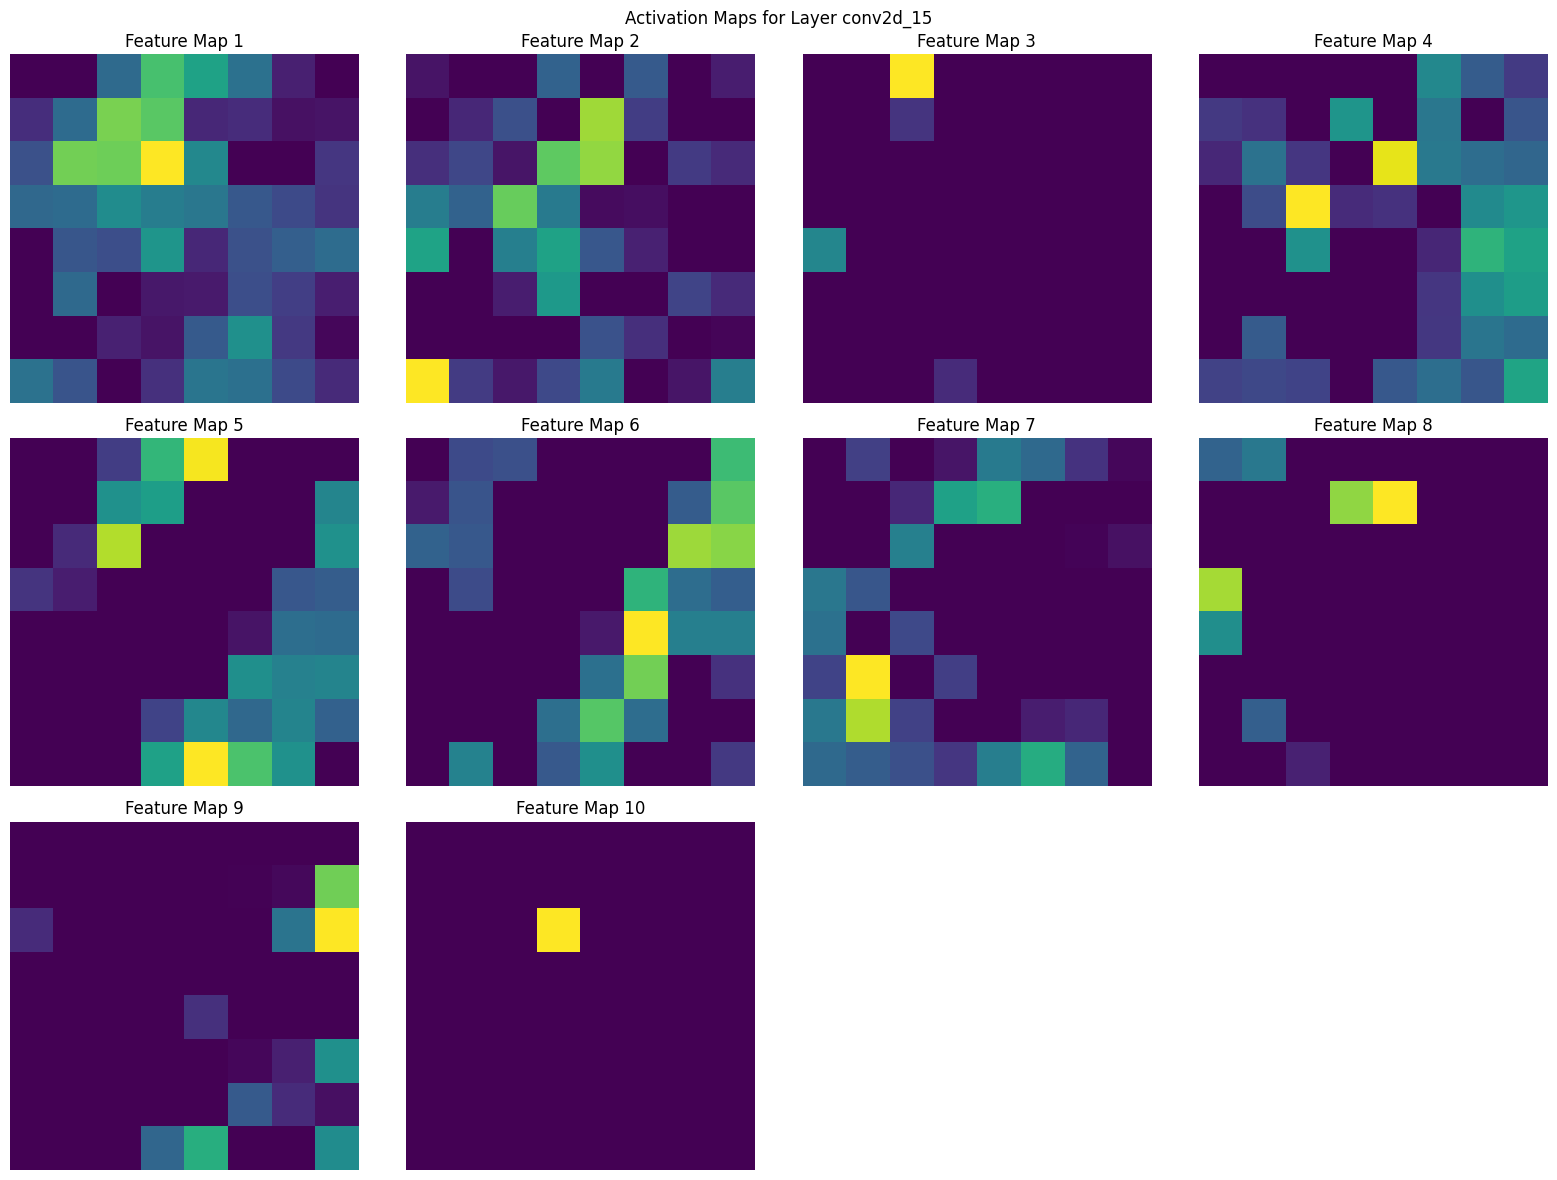

1/1 [==============================] - 0s 74ms/step


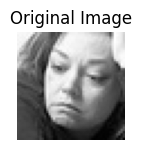

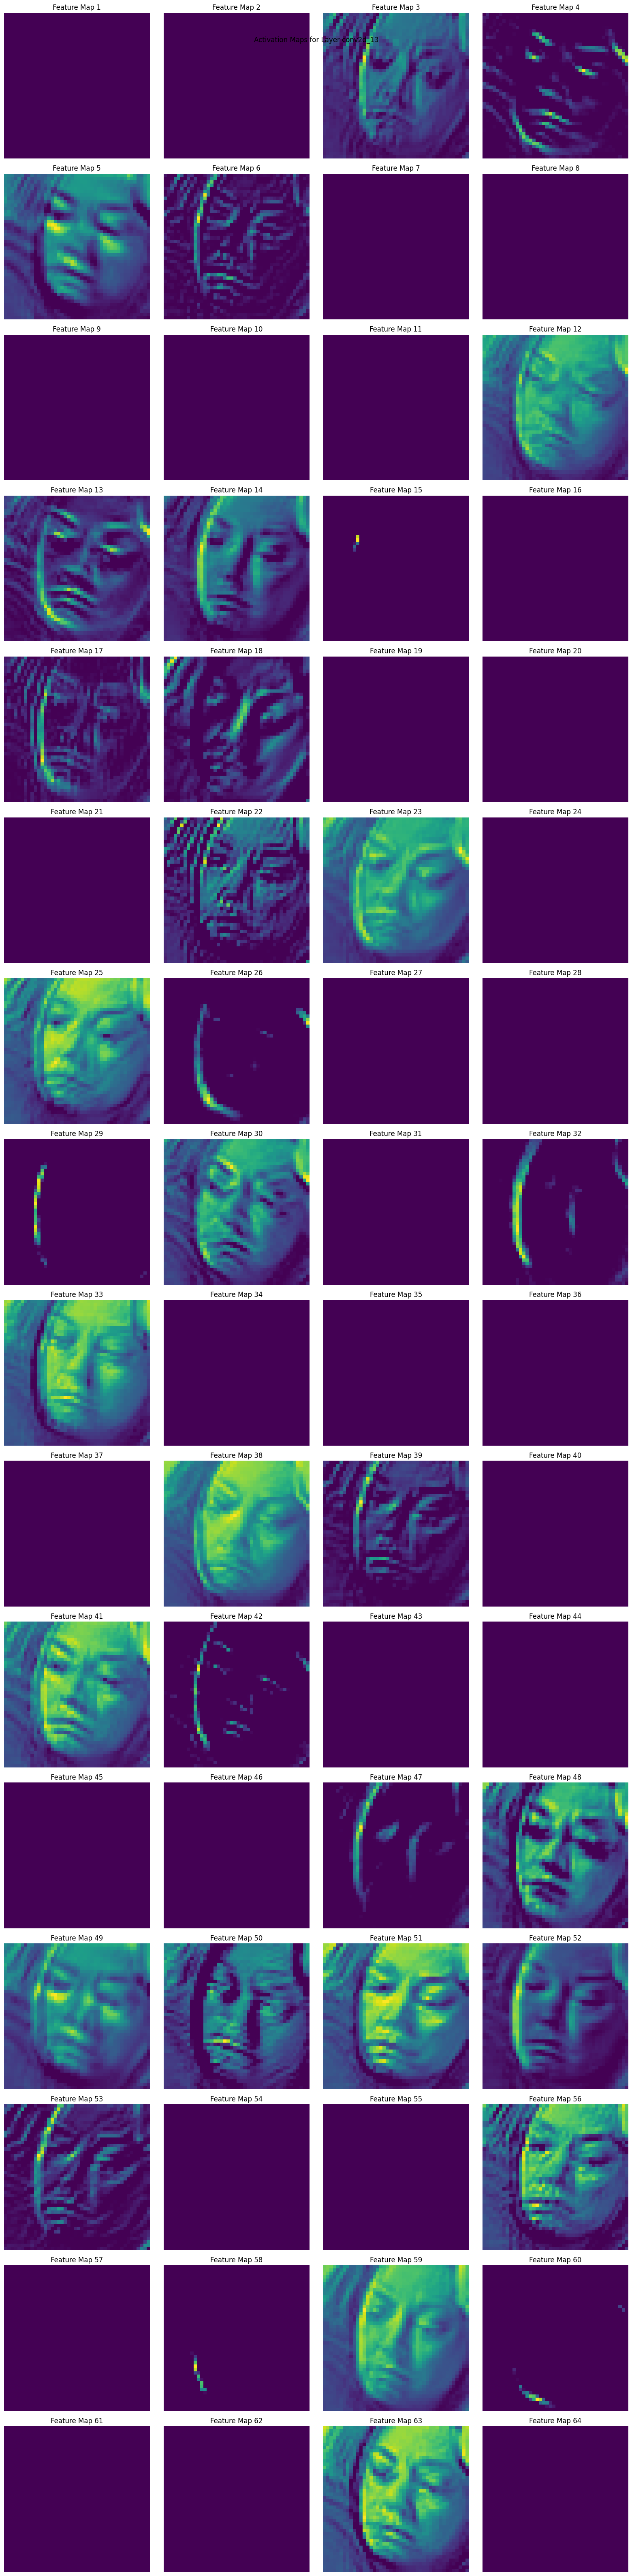

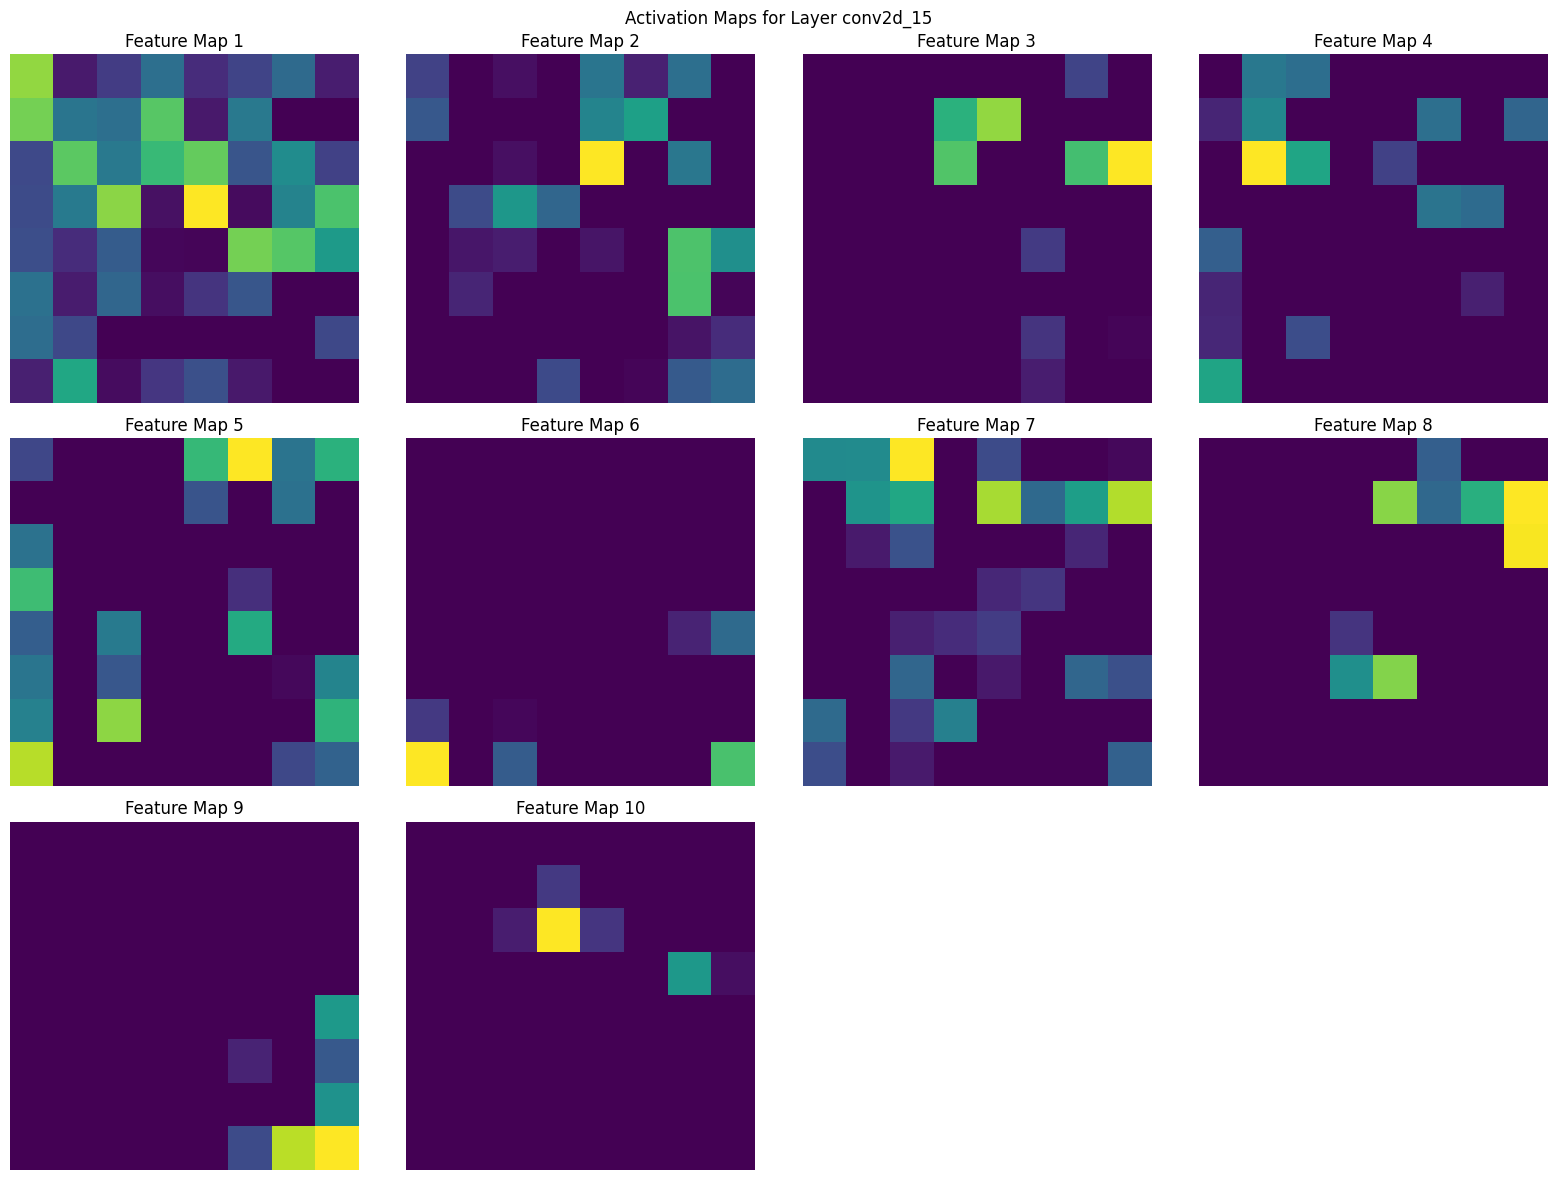

In [ ]:
# Activation map for sad images.
for idx, image in enumerate(sad_images[:4]):
    plot_image(image)
    activation_maps = generate_activation_maps(model, image)
    plot_activation_maps(activation_maps)

1/1 [==============================] - 0s 66ms/step


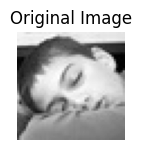

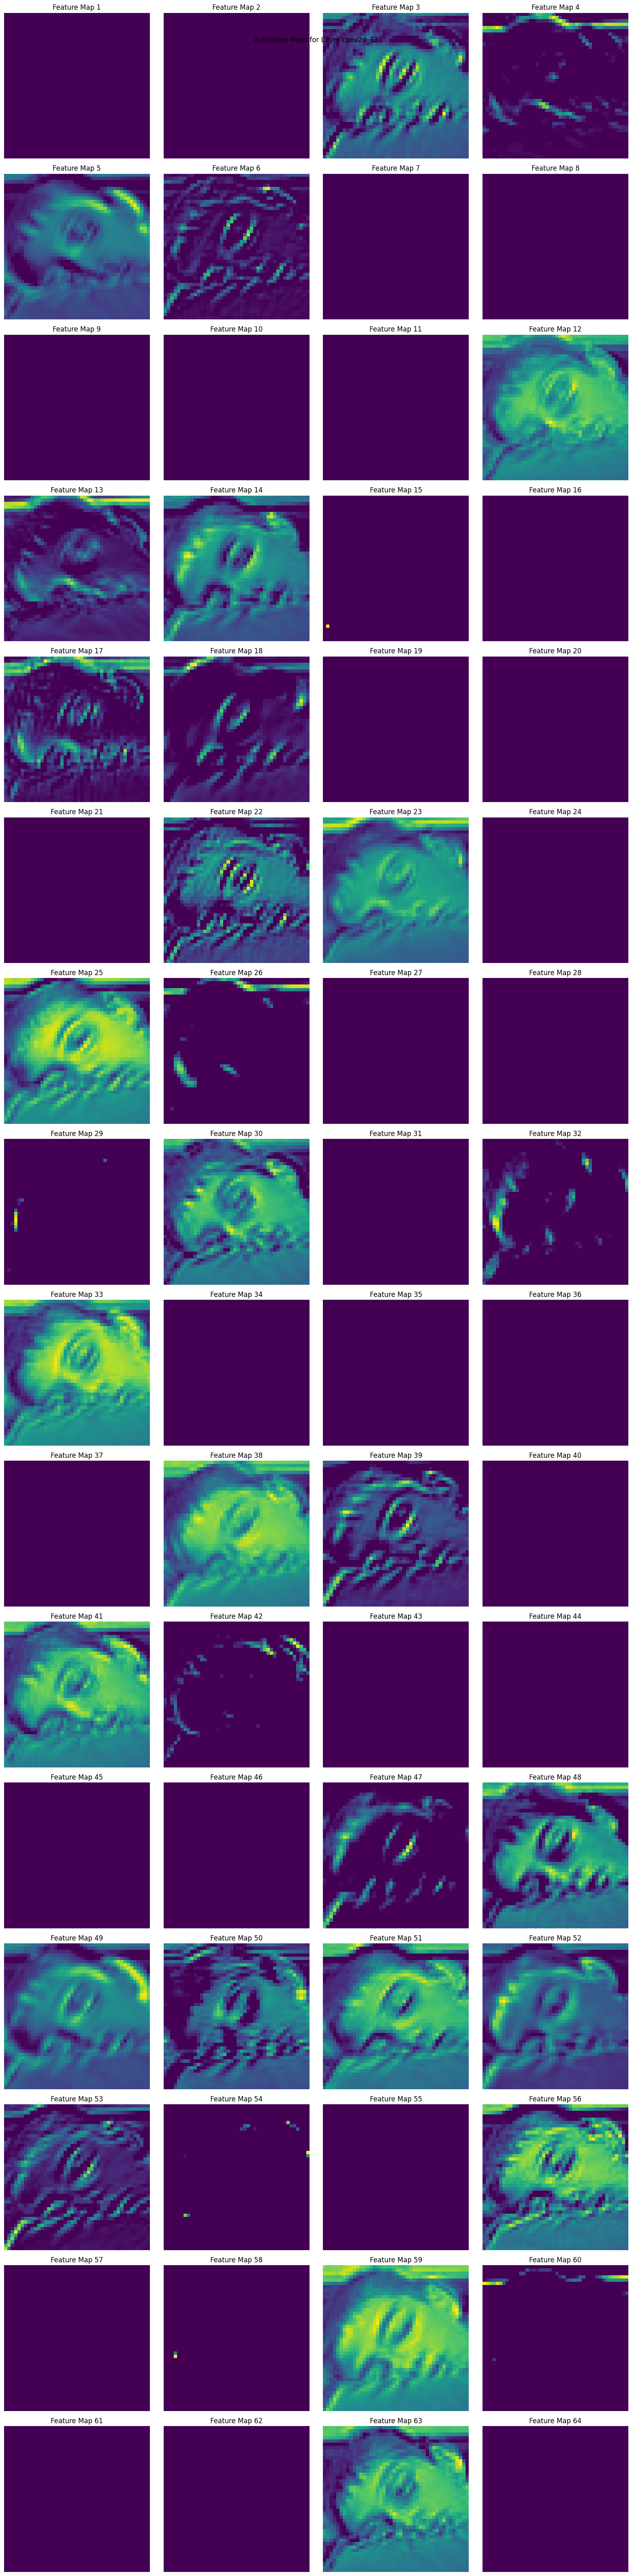

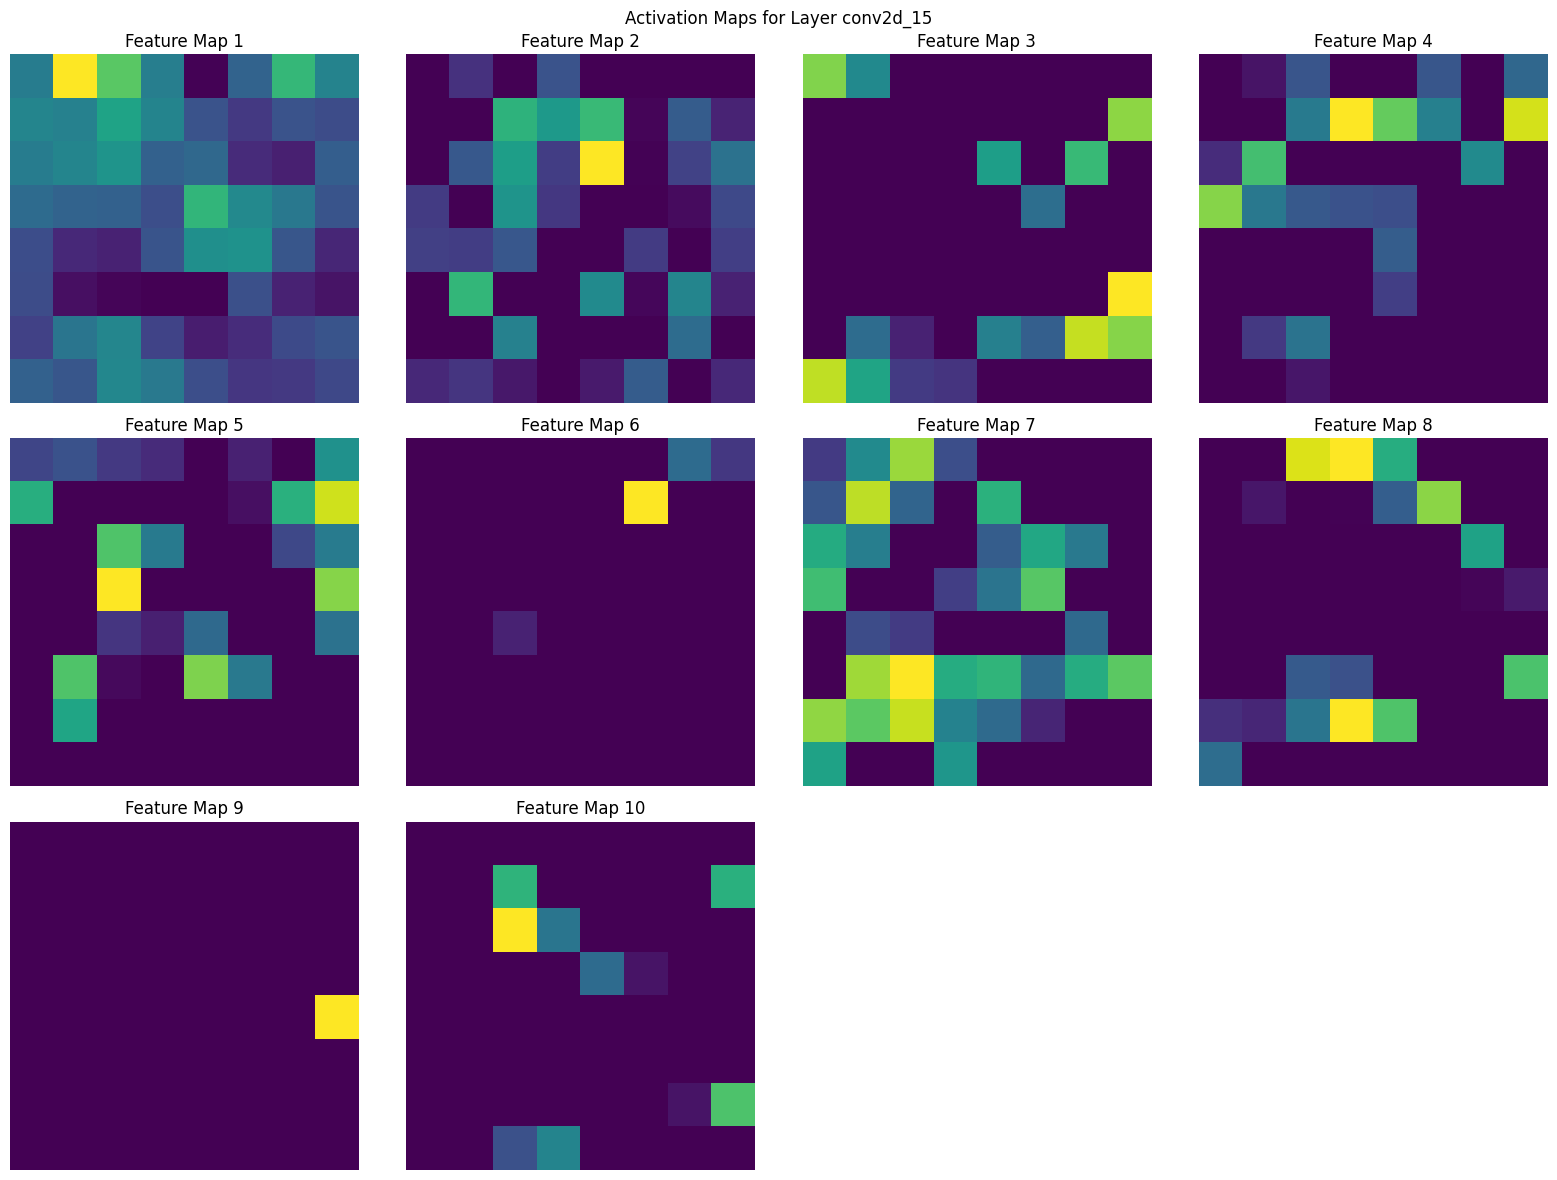

1/1 [==============================] - 0s 63ms/step


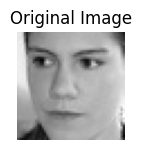

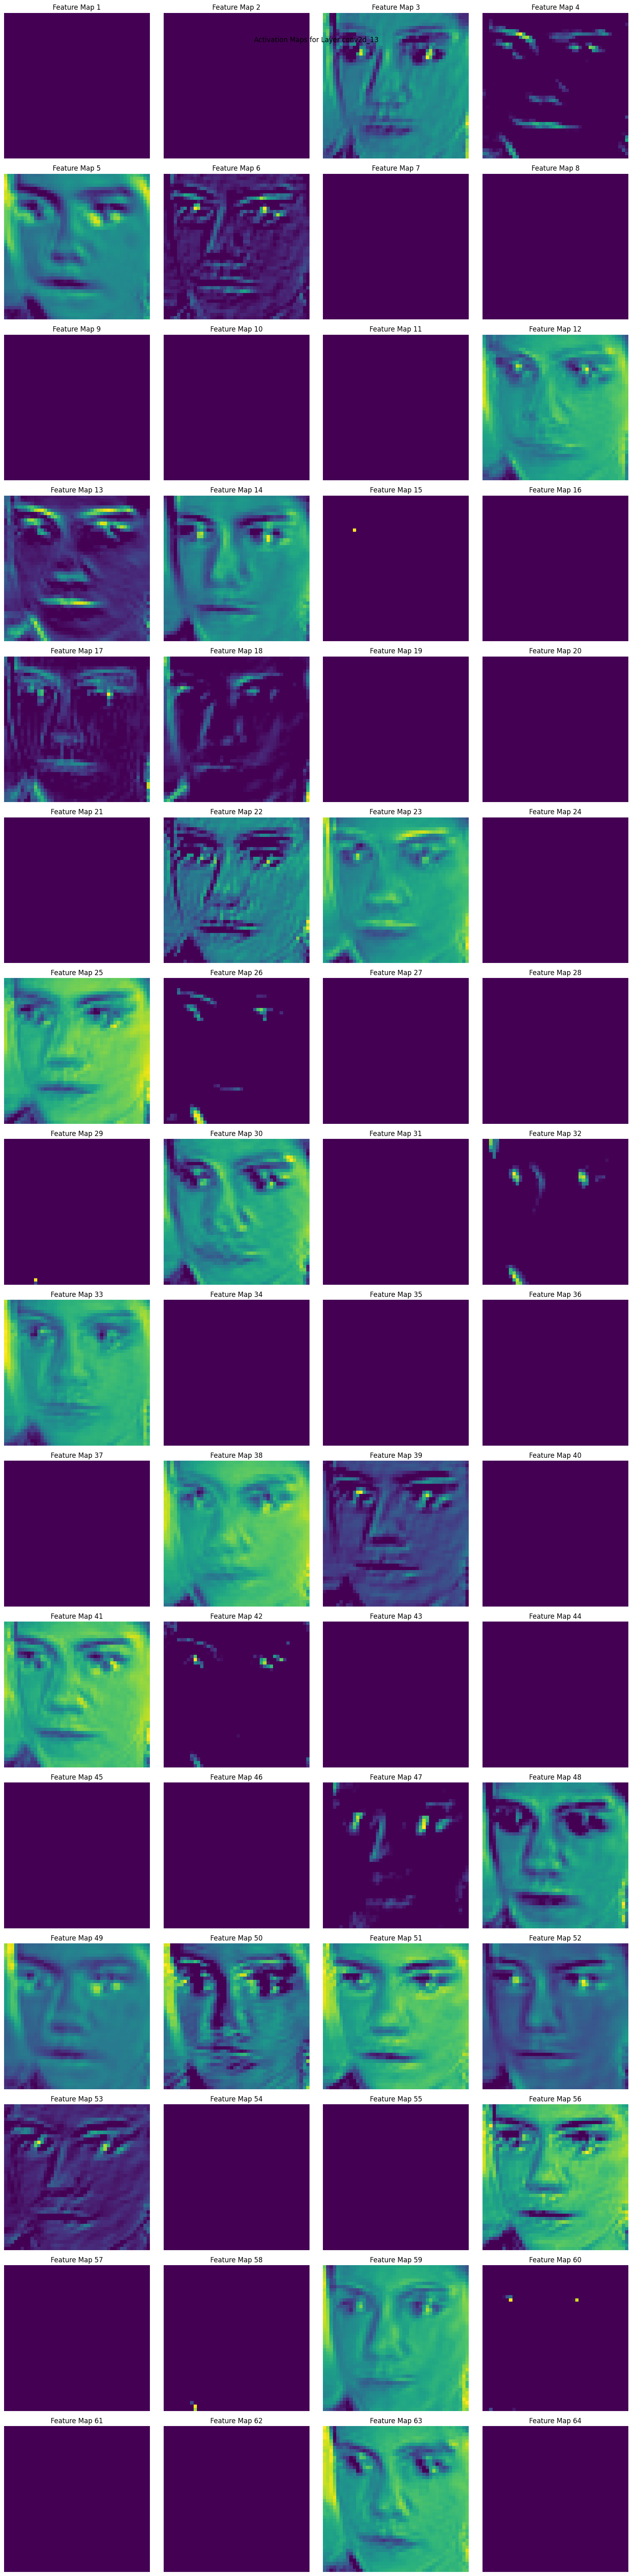

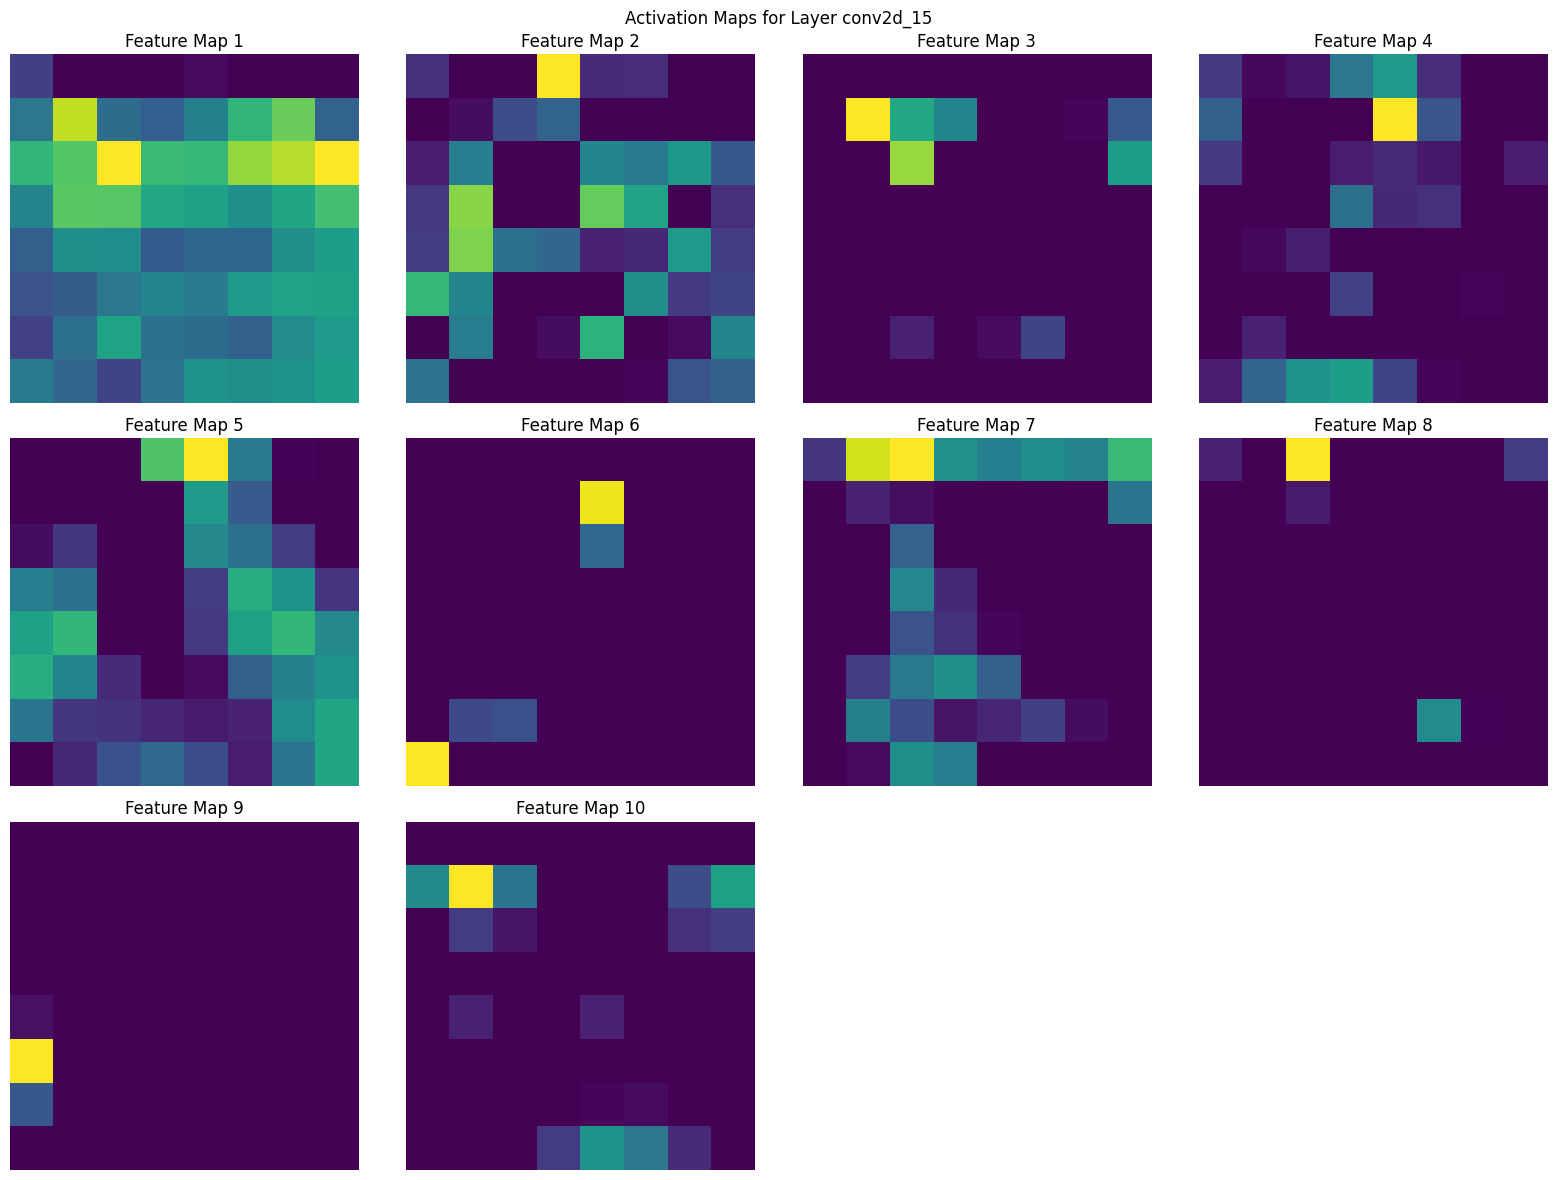

1/1 [==============================] - 0s 72ms/step


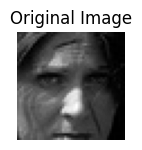

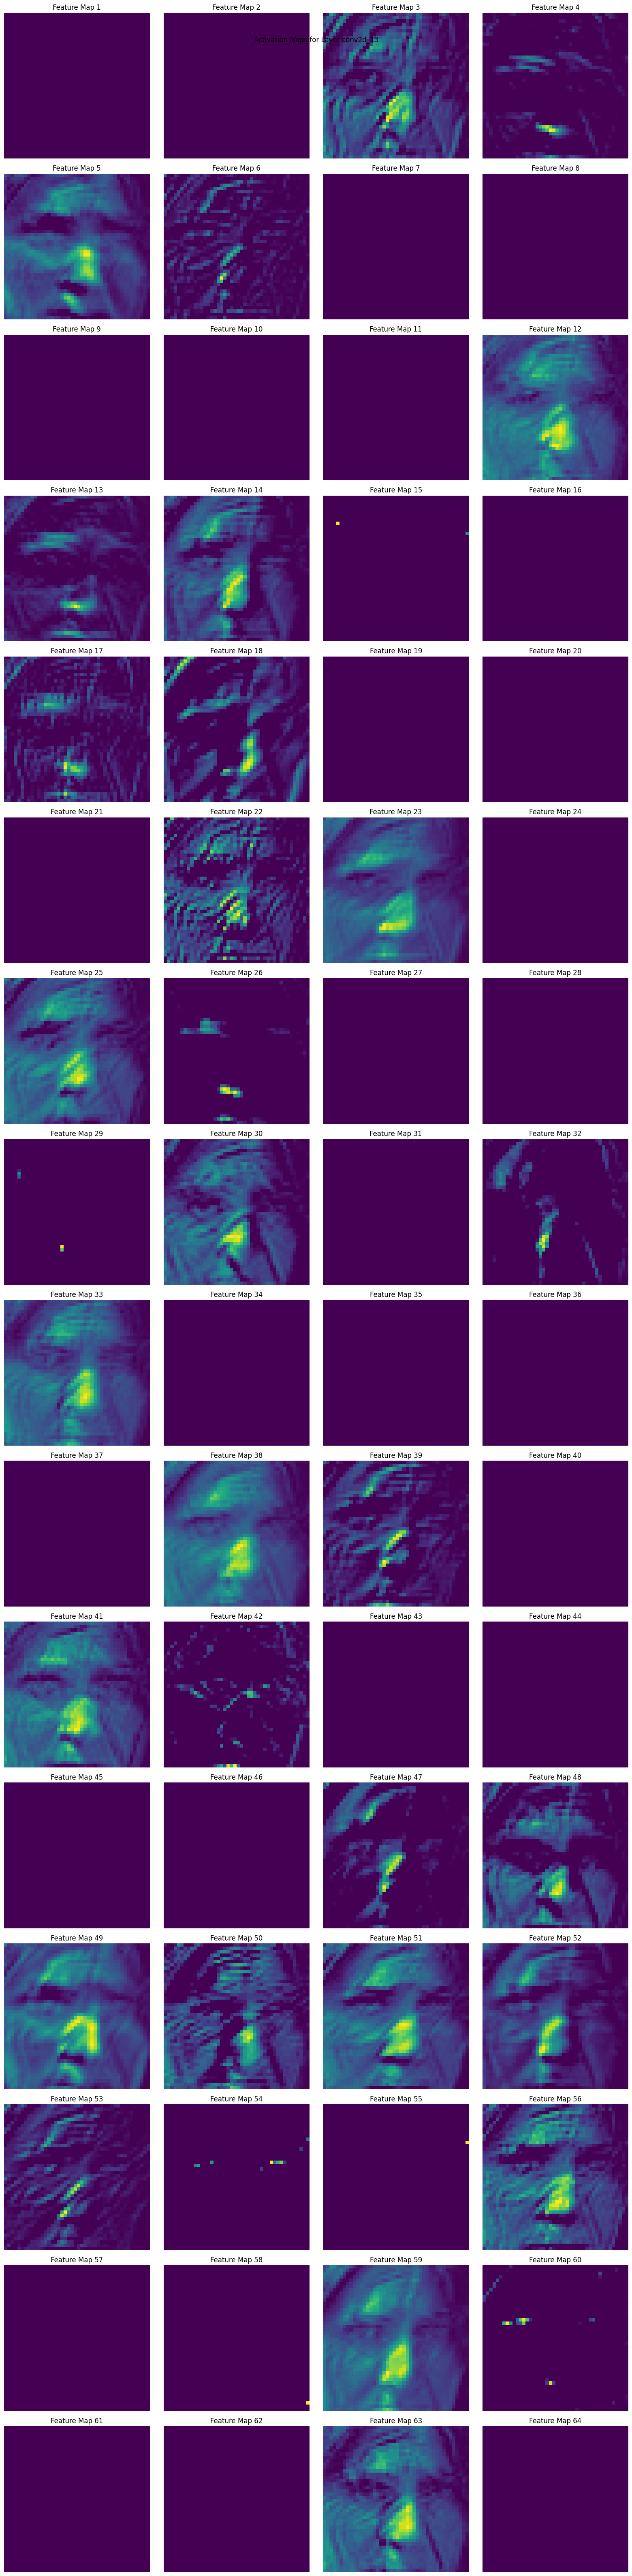

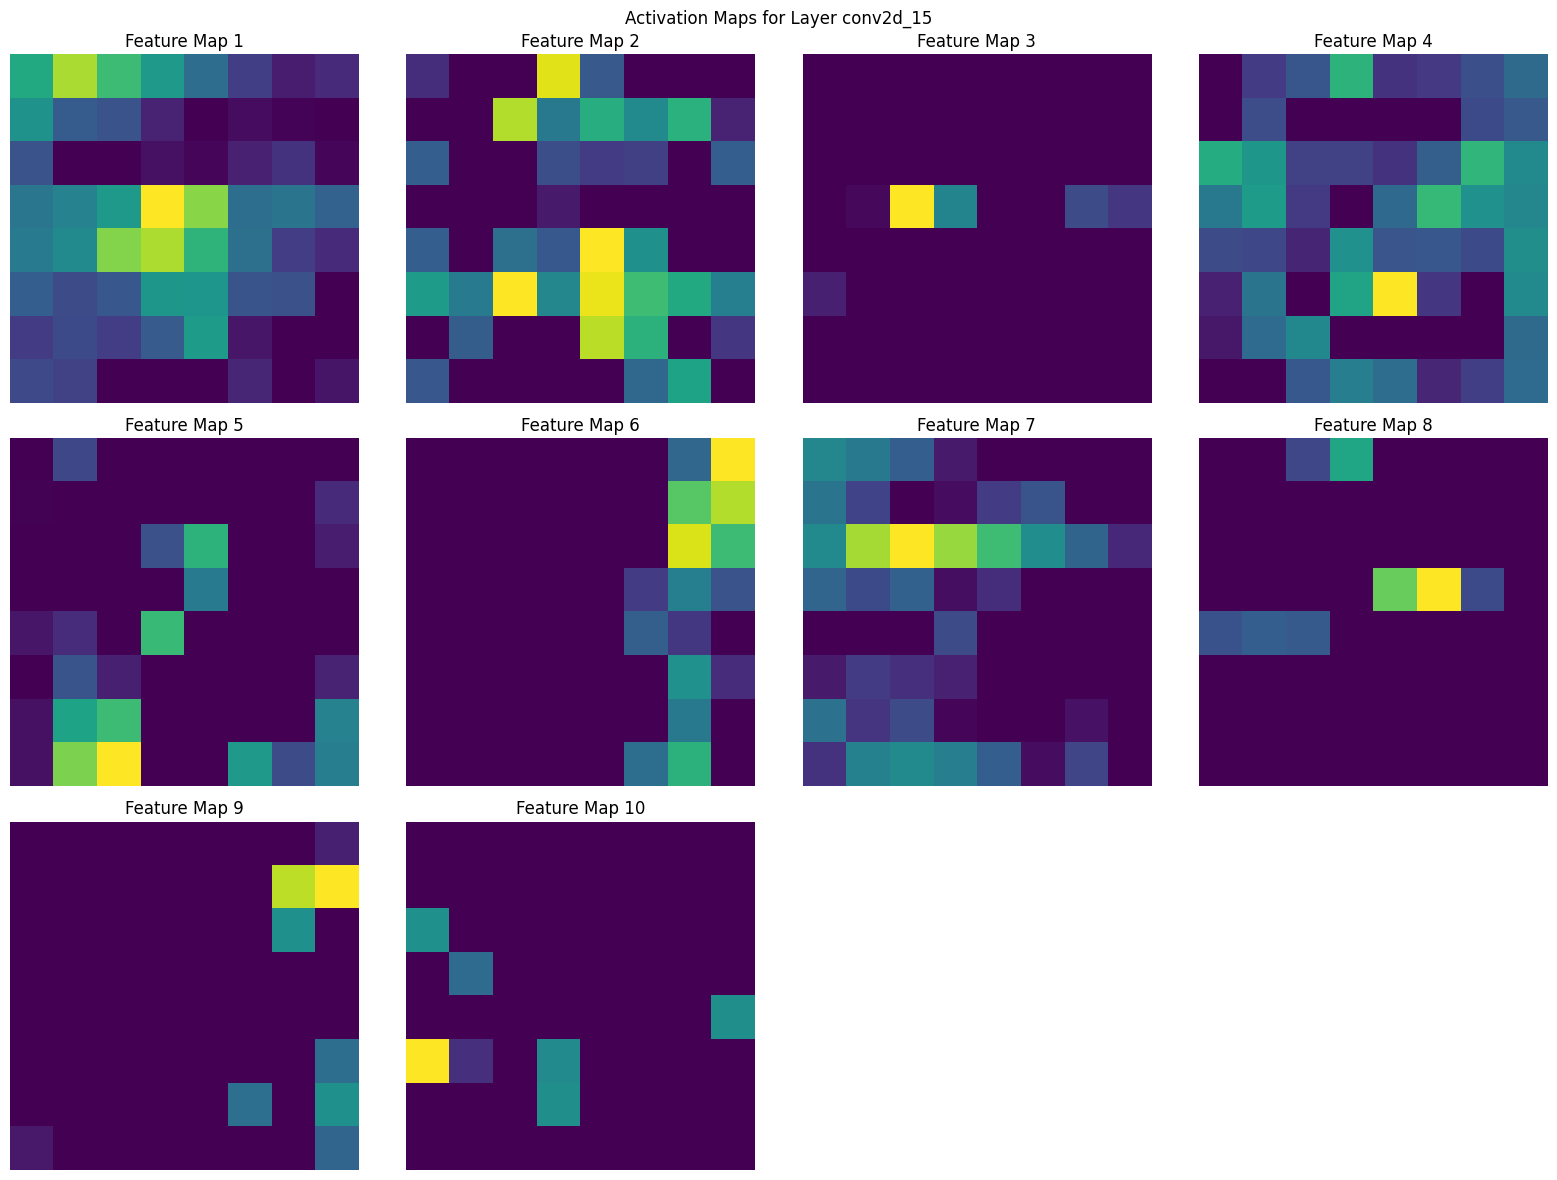

1/1 [==============================] - 0s 110ms/step


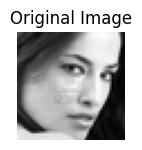

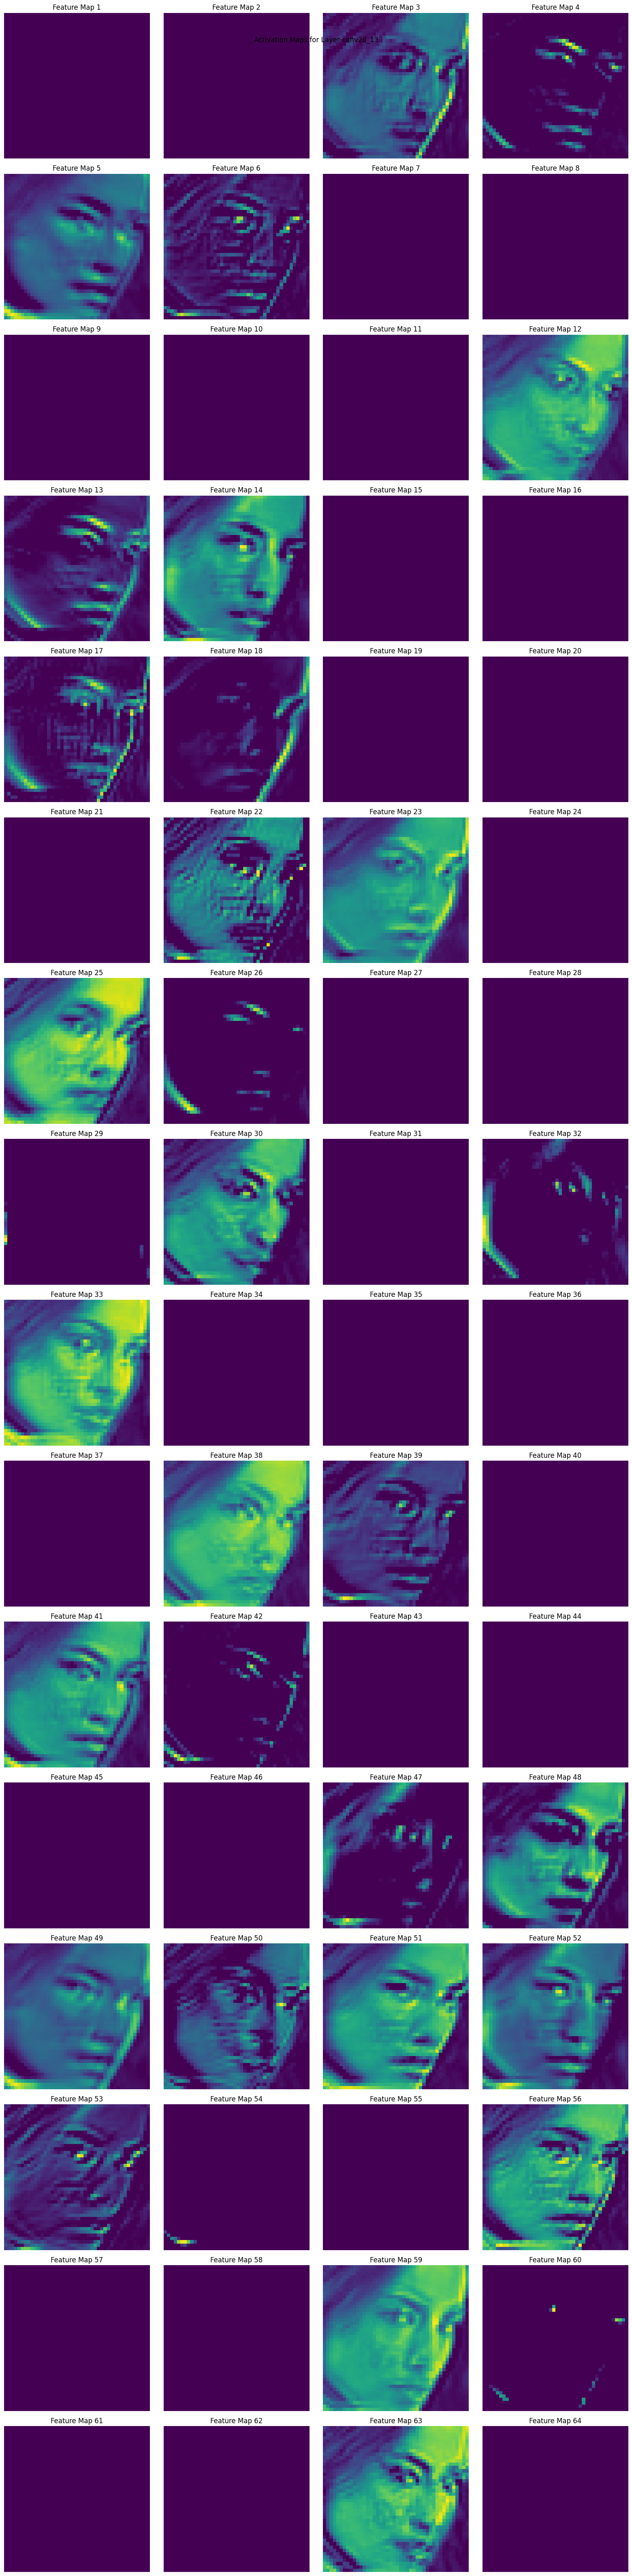

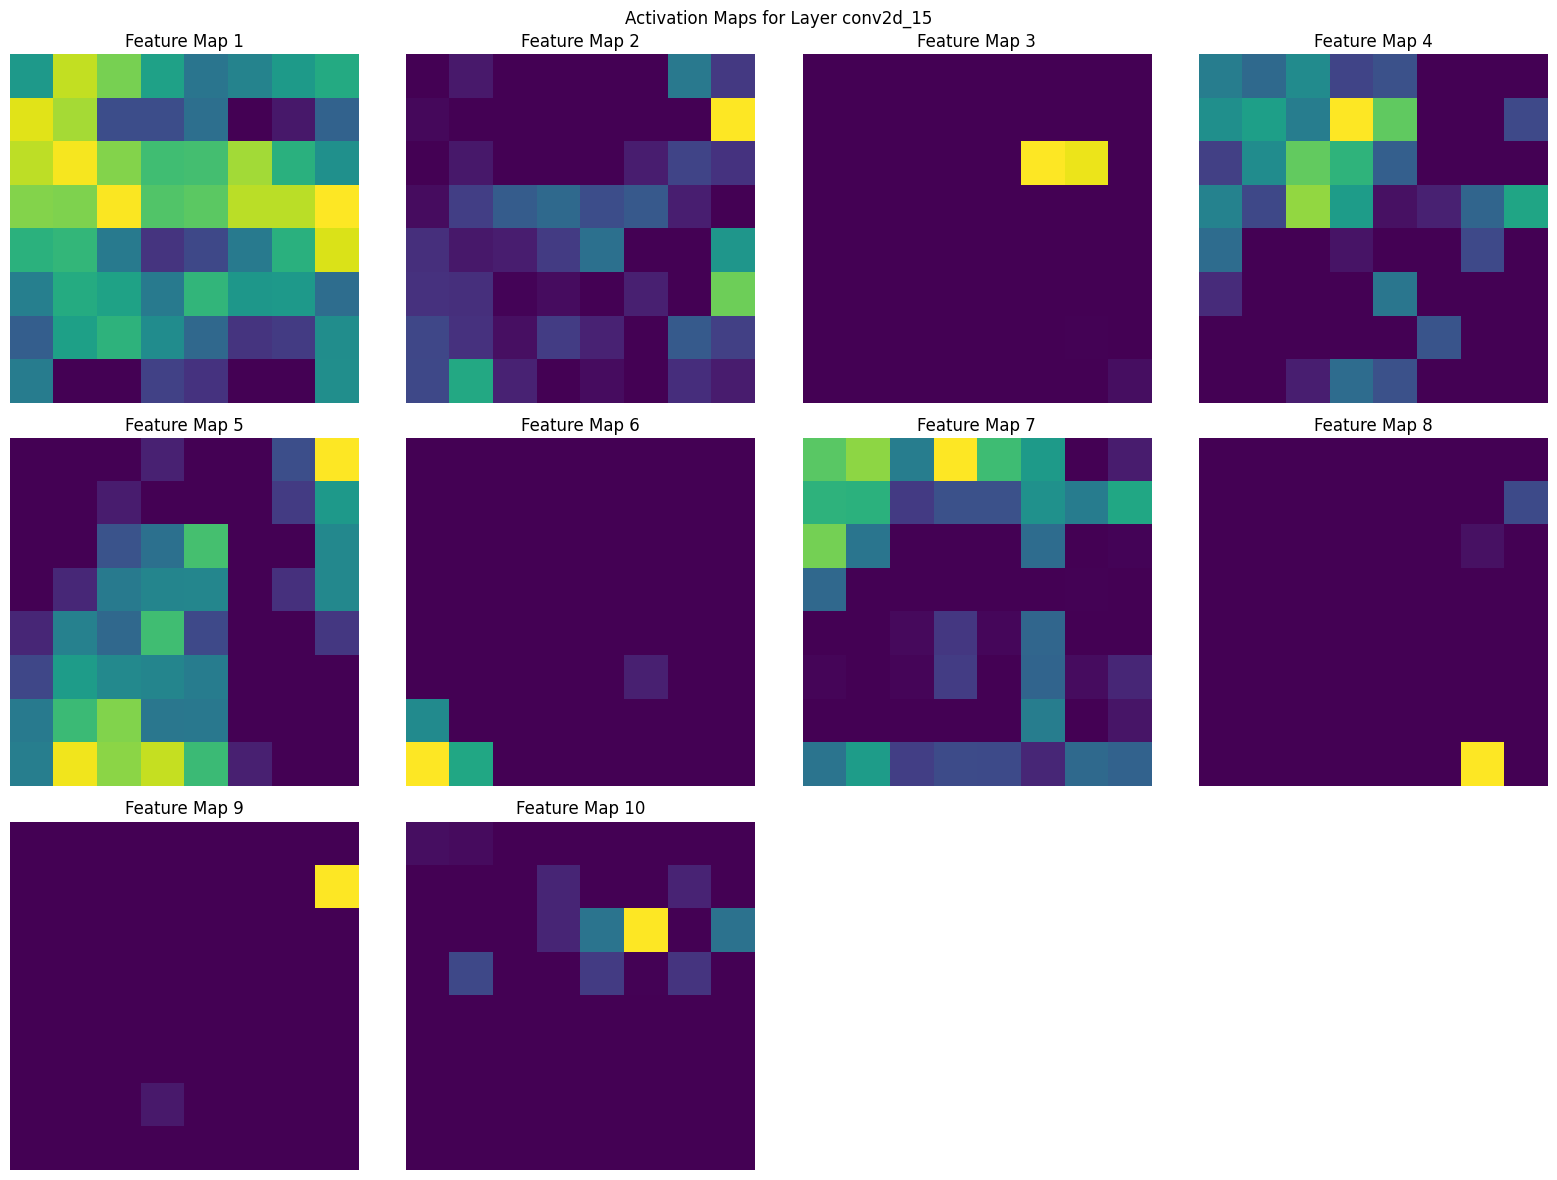

In [ ]:
# Activation maps for neutral images.
for idx, image in enumerate(neutral_images[:4]):
    plot_image(image)
    activation_maps = generate_activation_maps(model, image)
    plot_activation_maps(activation_maps)


Obervations:
- Convolution block selected are conv2d_13', 'conv2d_15' which contains 64 and 16 neurons respectively.
- Activation maps for intermediate convolutional blocks, allows to gain valuable insights into how the model processes and interprets emotional cues in images.

- Activations are stronger around key facial features such as eyes, mouth, or eyebrows.

1. Happy class:
* Strong activations in regions associated with smiles, such as the corners of the mouth and the area around the eyes.
* Significant activations around features like raised cheeks or squinted eyes.
* Activation highlight  emotional cues, such as bright and open facial expressions.

2. Sad Class:
* Activations in regions associated with downturned mouths or teary eyes.
* Activation around features like compressed mouth.
* Activation highlight negative emotional cues, expressions of sadness or distress

3. Neutral Class:
* Activation maps for neutral faces may exhibit more uniform activations across the image compared to happy or sad faces.
* Activation around fratures like eyes, nose, and mouth, without strong emotional cues.
* Activations that represent no or minimal variation in intensity across different regions of the face


---



Section 3:    Clustering  **(Total points = 15)**
New Section
---
**Description of Dataset:**

*   The dataset includes details about everything people bought from a UK-based online store over the span of eight months including productID, product descriptions and Country.
*  Objective is to explore clustering approaches.


Before implementing the clustering codes, you should perform data analysis part by performing following operations:

1.   Visualize the top countries by total sales.
2.   Visualize the product categories.
2.   Check the column data types and missing values and handle it
1.   Check the unique values in each column


**Note: you are not allowed to use sklearn’s direct functions (or any in-built functions) for clustering. Write the code at your own.**


Consider the following two features [Product_Count, 'Product_UnitPrice'] for the following tasks–
1. **K-Means Clustering:** Implement the K-Means clustering algorithm on the online retail data. Determine the optimal number of clusters using appropriate methods. Interpret and discuss the results obtained from K-Means clustering. **(5 points)**

2. **K-Medoids Clustering:** Apply the K-Medoids clustering algorithm to the same online retail data. Explain the differences between K-Means and K-Medoids algorithm results. Evaluate the effectiveness of K-Medoids in clustering the online retail data. **(5 points)**

3. **DBSCAN Clustering:** Implement the DBSCAN clustering algorithm on the online retail dataset. Discuss the parameters used for DBSCAN and their impact on the results. Compare and contrast DBSCAN with K-Means and K-Medoids in the context of online retail data. **(5 points)**

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [144]:
file_path = '/content/drive/My Drive/ML_Lab3_Dataset/Ecommerce.csv'
df = pd.read_csv(file_path)

3.0.1: Top countries by sales

In [145]:
def plot_countries_by_total_sales(df):
    df['TotalSales'] = df['Product_UnitPrice'] * df['Product_Count']
    country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
    print(country_sales)
    plt.figure(figsize=(12, 6))
    country_sales.plot(kind='bar')
    plt.title('Total Sales by Country')
    plt.xlabel('Country')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Country
India                   8187806.364
United Kingdom           284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

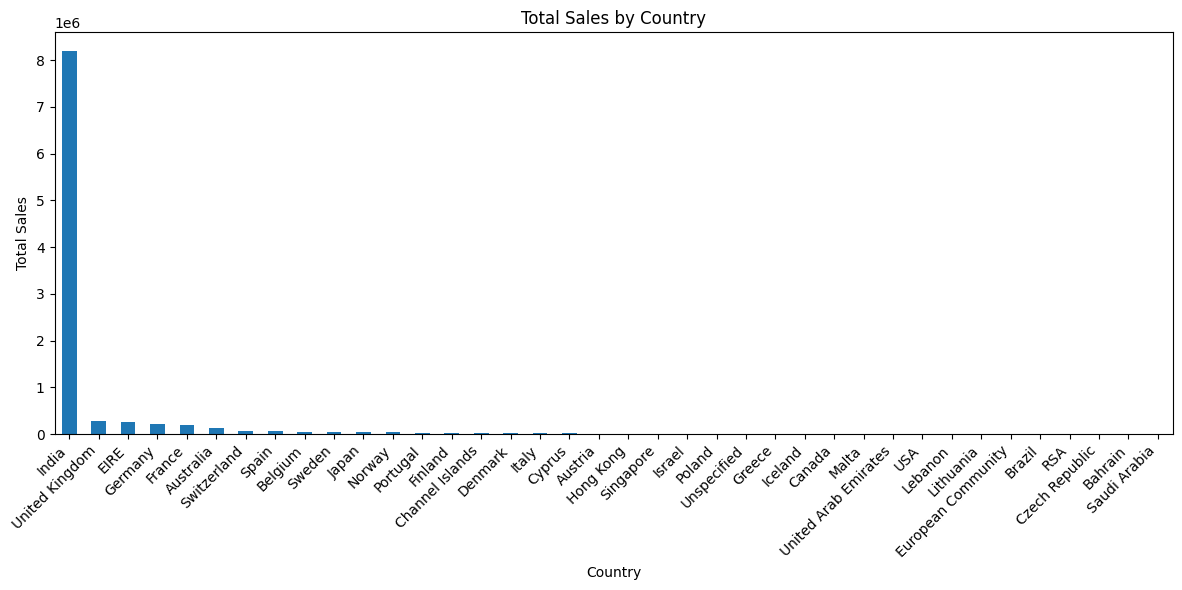

In [146]:
plot_countries_by_total_sales(df)

3.0.2: Visualize product categories

In [147]:
def plot_product_category(df):
    df['Category'] = df['Product_Details']
    category_counts = df['Category'].value_counts()
    plt.figure(figsize=(12, 6))
    category_counts.plot(kind='bar')
    plt.title('Product Categories')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
'''
    Executing this function allows one to acquire the order frequency for each product.
    Given the considerable number of rows and relatively fewer unique values, plotting may result in cluttered visuals with limited informative value.
'''
plot_product_category(df)

3.0.3: Visualize product categories

In [149]:
print("Data types of the column : ")
print(df.dtypes)

print("\n\nPrint number of missing values in a column :")
print(df.isnull().sum())

'''
   Since only "Product_Details" and "Customer ID" columns have missing values, it's not a concern for our subsequent analysis since we're not utilizing them.
   For "Product_Details," we can populate the missing entries with 'Unknown,' and for "Customer ID," we can substitute the missing values with -1.
'''

Data types of the column : 
ProductID             object
StockCode             object
Product_Details       object
Product_Count          int64
Product_UnitPrice    float64
Cus_ID               float64
Country               object
TotalSales           float64
Category              object
dtype: object


Print number of missing values in a column :
ProductID                 0
StockCode                 0
Product_Details        1454
Product_Count             0
Product_UnitPrice         0
Cus_ID               135080
Country                   0
TotalSales                0
Category               1454
dtype: int64


'\n   Since only "Product_Details" and "Customer ID" columns have missing values, it\'s not a concern for our subsequent analysis since we\'re not utilizing them.\n   For "Product_Details," we can populate the missing entries with \'Unknown,\' and for "Customer ID," we can substitute the missing values with -1.\n'

4.0.4: Unique Values

In [150]:
'''
    The unique values weren't displayed because there were too many of them.
'''

for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

ProductID: 25900
StockCode: 4070
Product_Details: 4223
Product_Count: 722
Product_UnitPrice: 1630
Cus_ID: 4372
Country: 38
TotalSales: 6204
Category: 4223


In [151]:
# Considering the following two features ['Product_Count', 'Product_UnitPrice'] for the following tasks
columns = ['Product_Count', 'Product_UnitPrice']
df = df[columns]

3.1 K-Means Clustering

In [152]:
# K Means
def k_means(X, n_clusters = 3, max_iters = 100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for _ in range(max_iters):

        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

In [153]:
# Function to compute inertia
def compute_inertia(X, centroids, labels):
    inertia = 0

    for i in range(len(X)):
        centroid_index = labels[i]
        dist = np.linalg.norm(X[i] - centroids[centroid_index])**2
        inertia += dist

    return inertia

In [154]:
# Elbow method
def elbow_method(X, max_clusters):
    wcss = [0] * max_clusters

    for seed in range(20):
      np.random.seed(seed)
      for k in range(1, max_clusters + 1):
          centroids, labels = k_means(X, k)
          wcss[k-1]+=compute_inertia(X, centroids, labels)

    for i in range(len(wcss)):
       wcss[i] /= 20

    return wcss

In [155]:
# Plot wcss against k
def plot_wcss_against_k(wcss, k):
    plt.plot(k, wcss, marker='o', linestyle='-')
    plt.title('K vs wcss')
    plt.xlabel('K')
    plt.ylabel('wcss')
    plt.grid(True)
    plt.show()

In [156]:
# Sample size
sample_size = 5000
sampled_df = df.sample(n=10000, random_state=42)
X = sampled_df.to_numpy()

In [157]:
max_clusters = 10
wcss = elbow_method(X, max_clusters)

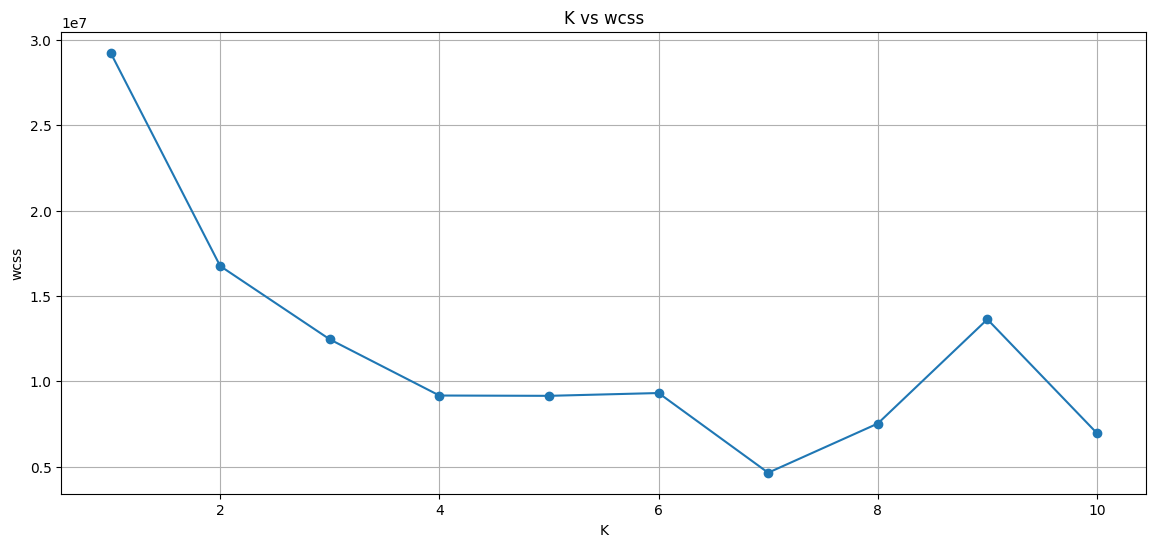

In [158]:
k = range(1, len(wcss) + 1)
plot_wcss_against_k(wcss, k)

In [159]:
def plot_kmeans(X, labels, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=500, alpha=0.5)
    plt.xlabel('Product_Count')
    plt.ylabel('Product_UnitPrice')
    plt.title('K-means Clustering')
    plt.show()

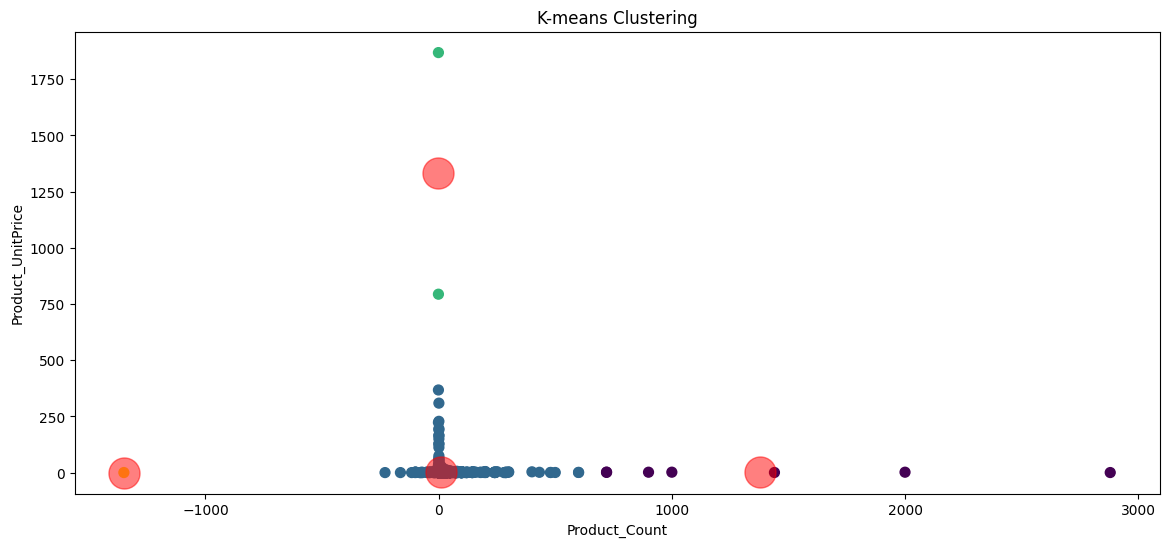

In [160]:
k = 4
centroids, labels = k_means(X, k)
plot_kmeans(X, labels, centroids)

Observations:


* To accommodate system memory and complexity constraints, a random sample of 5000 rows was taken.
* The Elbow method was employed to determine the optimal value of K.
* The optimal K value identified was 4.
* In the visualization, regions marked in red represent the centroids.
* The performance of K-means was suboptimal due to the presence of outliers.
* The majority of points were labeled blue, indicating that this clustering method may not be particularly effective in this context.

3.2 K- Medoids Clustering

In [161]:
# Euclidean Distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [162]:
# Function to assign clusters
def assign_clusters(X, medoids):
    clusters = {}
    for i, x in enumerate(X):
        distances = [euclidean_distance(x, medoid) for medoid in medoids]
        cluster_idx = np.argmin(distances)
        if cluster_idx not in clusters:
            clusters[cluster_idx] = []
        clusters[cluster_idx].append(i)
    return clusters

In [163]:
# K medoids
def k_medoids(X, k, max_iterations=100):
    medoids_idx = np.random.choice(len(X), k, replace=False)
    medoids = X[medoids_idx]

    for _ in range(max_iterations):
        clusters = assign_clusters(X, medoids)

        new_medoids = np.copy(medoids)
        for cluster_idx, cluster_points in clusters.items():
            cluster_distances = [np.sum([euclidean_distance(X[i], X[j]) for j in cluster_points]) for i in cluster_points]
            best_medoid_idx = cluster_points[np.argmin(cluster_distances)]
            new_medoids[cluster_idx] = X[best_medoid_idx]

        if np.array_equal(medoids, new_medoids):
            break

        medoids = new_medoids

    return medoids, clusters

In [164]:
# Seeding
np.random.seed(0)

# Sampling
sample_size = 5000
sampled_df = df.sample(n=sample_size, random_state=42)
X = sampled_df.to_numpy()

# Calling k medoids
k = 4
medoids, clusters= k_medoids(X, k)

# labelling
labels = np.zeros(len(X), dtype=int)
for i, cluster_points in clusters.items():
    labels[cluster_points] = i

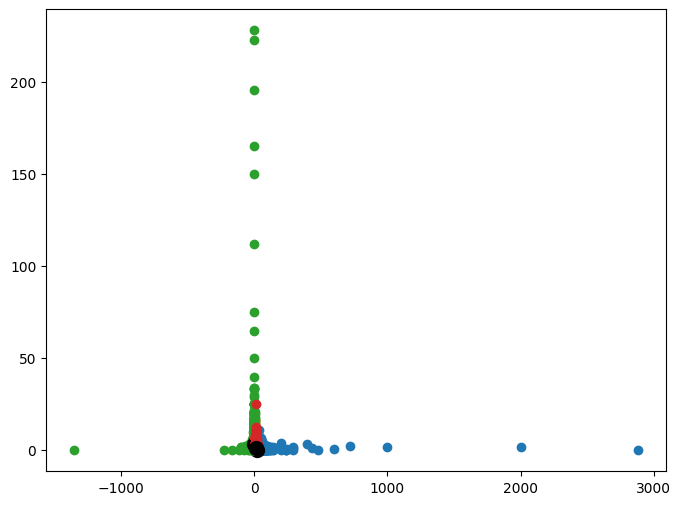

In [165]:
# Plotting
plt.figure(figsize=(8, 6))
for i, cluster_points in clusters.items():
    cluster_points = X[cluster_points]
    medoid = medoids[i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
    plt.scatter(medoid[0], medoid[1], marker='o', color='black', s=100, label=f'Medoid {i+1}')

Observations: (k=4)

* In K-means, the cluster center is represented by the mean (centroid) of all the points in the cluster. But in K-medoids, the cluster center is represented by the actual data point from the cluster that minimizes the sum of distances to all other points in the cluster.
* K-means is sensitive to outliers because it calculates the mean of all points in the cluster, which can be heavily influenced by outliers. This is evident from the plots. K-medoids, being based on medians, is more robust to outliers.
* The computation cost of k-medoids is higher than K-means.
* In the online retail data K-medoids performs better than K-means.

3.3 DBSCAN Clustering

In [166]:
# Euclidean Distance.
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Function to find neighbours
def find_neighbors(X, point_idx, eps):
    neighbors = []
    for i, x in enumerate(X):
        if euclidean_distance(X[point_idx], x) <= eps:
            neighbors.append(i)
    return neighbors

# DBSCAN function.
def dbscan(X, eps, min_samples):
    labels = np.zeros(len(X), dtype=int)
    cluster_label = 0

    for i, x in enumerate(X):
        if labels[i] != 0:
            continue

        neighbors = find_neighbors(X, i, eps)

        if len(neighbors) < min_samples:
            labels[i] = -1
        else:
            cluster_label += 1
            expand_cluster(X, labels, i, neighbors, cluster_label, eps, min_samples)

    return labels

# Expand Cluster.
def expand_cluster(X, labels, point_idx, neighbors, cluster_label, eps, min_samples):
    labels[point_idx] = cluster_label
    j = 0
    while j < len(neighbors):
        neighbor_idx = neighbors[j]
        if labels[neighbor_idx] == -1:
            labels[neighbor_idx] = cluster_label
        elif labels[neighbor_idx] == 0:
            labels[neighbor_idx] = cluster_label
            new_neighbors = find_neighbors(X, neighbor_idx, eps)
            if len(new_neighbors) >= min_samples:
                neighbors.extend(new_neighbors)
        j += 1

In [167]:
# Clustering on sample size of 5000.
sample_size = 5000
sampled_df = df.sample(n=sample_size, random_state=42)
X = sampled_df.to_numpy()

In [168]:
labels = dbscan(X, eps=2, min_samples=5)

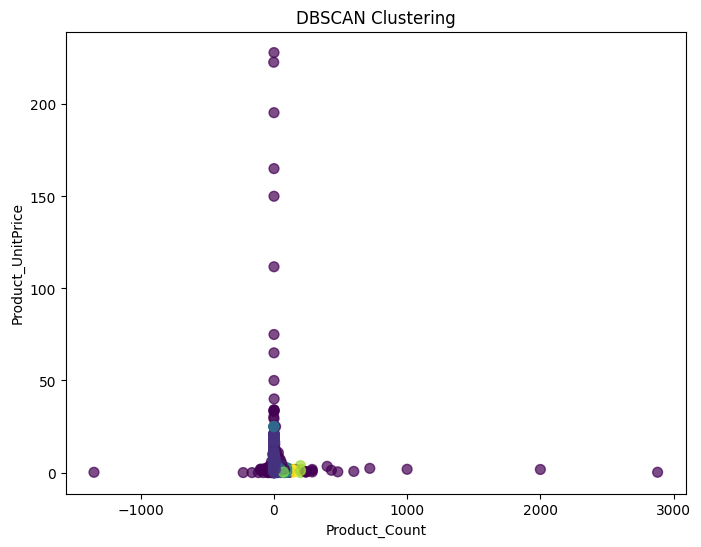

In [169]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Product_Count')
plt.ylabel('Product_UnitPrice')
plt.show()

Parameters used:
* epsilon = 2, it defines the radius within which the algorithm searches for neighboring points around each point.
* Larger epsilon values lead to more points being considered as neighbors, potentially resulting in larger clusters, while smaller epsilon values result in more compact clusters.
* Minimum Samples = 5, specifies the minimum number of points that must be within the epsilon radius of a point for it to be considered a core point.
Observations:
* Larger values of min_samples require denser regions to form a cluster, resulting in smaller and more compact clusters, while smaller values may include more points in clusters, potentially merging distinct clusters together.

Comparision:
 * DBSCAN performed well in the presence of outliers due to its ability to identify dense regions.
 * Here, K-means struggled due to its sensitivity to outliers.
 * K-medoids gave intermediate performance being more robust to outliers than K-means but less effective than DBSCAN.
 * DBSCAN assigned the same color to all the outliers, resulting in improved clustering.








